<h1>Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 6) 

In [2]:
cd

/Users/gautham


In [3]:
cd \Downloads

/Users/gautham/Downloads


Using Netflix Colors

In [4]:
netflix_palette = ['#b20710','#221f1f', '#e50914','#f5f5f1']

# Set Seaborn style and palette
sns.set(style="whitegrid", palette=netflix_palette)
plt.style.use("seaborn-whitegrid")

/tmp/ipykernel_65803/2359422378.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


Importing the dataset

In [5]:
df = pd.read_csv('netflix.csv')

<h1>Exploratory Analysis

In [6]:
df1= df.copy()

In [7]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df.shape

(8807, 12)

<h2> Fixing the Dataset

In [10]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [11]:
df.dropna(subset=['date_added'],inplace=True)

In [12]:
df.shape

(8797, 12)

In [13]:
df['duration'].isna().sum()

3

In [14]:
df.dropna(subset=['duration'],inplace=True)

In [15]:
df.shape

(8794, 12)

In [16]:
df[['length','min_or_season']] = df['duration'].str.split(' ',expand=True)

In [17]:
df['length'] = df['length'].astype(int)

In [18]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021  TV-MA   1 Season   
4 2021-09-24          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  length min_or_season  
0  As her father nears the end of his life, filmm...      90           min  
1  After crossing paths at a party, a Cape Town t...       2       Seasons  
2  To protect his family from a powerful drug lor...       1        Season  
3  Feuds, flirtations and toilet talk go down amo...       1        Season  
4  In a city of coaching centers known to train I...       2       Seasons

In [19]:
df.describe()

release_year       length
count   8794.000000  8794.000000
mean    2014.183534    69.920173
std        8.823527    50.797005
min     1925.000000     1.000000
25%     2013.000000     2.000000
50%     2017.000000    88.000000
75%     2019.000000   106.000000
max     2021.000000   312.000000

In [20]:
df.isna().sum()

show_id             0
type                0
title               0
director         2624
cast              825
country           830
date_added          0
release_year        0
rating              4
duration            0
listed_in           0
description         0
length              0
min_or_season       0
dtype: int64

<h2> Replacing null string values with 'Unknown'

In [21]:
df['cast'].fillna(value='Unknown',inplace=True)

In [22]:
df['director'].fillna(value='Unknown',inplace=True)

In [23]:
df['country'].fillna(value='Unknown',inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8794 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        8794 non-null   object        
 1   type           8794 non-null   object        
 2   title          8794 non-null   object        
 3   director       8794 non-null   object        
 4   cast           8794 non-null   object        
 5   country        8794 non-null   object        
 6   date_added     8794 non-null   datetime64[ns]
 7   release_year   8794 non-null   int64         
 8   rating         8790 non-null   object        
 9   duration       8794 non-null   object        
 10  listed_in      8794 non-null   object        
 11  description    8794 non-null   object        
 12  length         8794 non-null   int64         
 13  min_or_season  8794 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 1.0+ MB


In [25]:
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           4
duration         0
listed_in        0
description      0
length           0
min_or_season    0
dtype: int64

Adding Values for nulls in rating column by searching the values in internet

In [26]:
df[df['rating'].isna()]

show_id     type                                              title  \
5989   s5990    Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   
6827   s6828  TV Show                  Gargantia on the Verdurous Planet   
7312   s7313  TV Show                                       Little Lunch   
7537   s7538    Movie                               My Honor Was Loyalty   

             director                                               cast  \
5989          Unknown                        Oprah Winfrey, Ava DuVernay   
6827          Unknown  Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...   
7312          Unknown  Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...   
7537  Alessandro Pepe  Leone Frisa, Paolo Vaccarino, Francesco Miglio...   

        country date_added  release_year rating  duration  \
5989    Unknown 2017-01-26          2017    NaN    37 min   
6827      Japan 2016-12-01          2013    NaN  1 Season   
7312  Australia 2018-02-01          2015    NaN  1 Season   
7537      Italy 2017-03-01          2015    NaN   115 min   

                                 listed_in  \
5989                                Movies   
6827  Anime Series, International TV Shows   
7312                 Kids' TV, TV Comedies   
7537                                Dramas   

                                            description  length min_or_season  
5989  Oprah Winfrey sits down with director Ava DuVe...      37           min  
6827  After falling through a wormhole, a space-dwel...       1        Season  
7312  Adopting a child's perspective, this show take...       1        Season  
7537  Amid the chaos and horror of World War II, a c...     115           min

In [27]:
df[df['show_id']=='s7313']

show_id     type         title director  \
7312   s7313  TV Show  Little Lunch  Unknown   

                                                   cast    country date_added  \
7312  Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...  Australia 2018-02-01   

      release_year rating  duration              listed_in  \
7312          2015    NaN  1 Season  Kids' TV, TV Comedies   

                                            description  length min_or_season  
7312  Adopting a child's perspective, this show take...       1        Season

In [28]:
df.loc[df['show_id']=='s7313','rating']='TV-MA'
df.loc[df['show_id']=='s7538','rating']='PG-13'
df.loc[df['show_id']=='s6828','rating']='TV-14'
df.loc[df['show_id']=='s5990','rating']='PG'

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8794 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   show_id        8794 non-null   object        
 1   type           8794 non-null   object        
 2   title          8794 non-null   object        
 3   director       8794 non-null   object        
 4   cast           8794 non-null   object        
 5   country        8794 non-null   object        
 6   date_added     8794 non-null   datetime64[ns]
 7   release_year   8794 non-null   int64         
 8   rating         8794 non-null   object        
 9   duration       8794 non-null   object        
 10  listed_in      8794 non-null   object        
 11  description    8794 non-null   object        
 12  length         8794 non-null   int64         
 13  min_or_season  8794 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(11)
memory usage: 1.0+ MB


In [30]:
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
length           0
min_or_season    0
dtype: int64

<h2>Splitting Date addded into 3 columns of month, month name and year

In [31]:
df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year
df['week_added']= df['date_added'].dt.week
df['difference']=  df['year_added']-df['release_year']
df.head()

/tmp/ipykernel_65803/2786558966.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week_added']= df['date_added'].dt.week


show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021  TV-MA   1 Season   
4 2021-09-24          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  length min_or_season  \
0  As her father nears the end of his life, filmm...      90           min   
1  After crossing paths at a party, a Cape Town t...       2       Seasons   
2  To protect his family from a powerful drug lor...       1        Season   
3  Feuds, flirtations and toilet talk go down amo...       1        Season   
4  In a city of coaching centers known to train I...       2       Seasons   

   month_added month_name_added  year_added  week_added  difference  
0            9        September        2021          38           1  
1            9        September        2021          38           0  
2            9        September        2021          38           0  
3            9        September        2021          38           0  
4            9        September        2021          38           0

<Figure size 1200x600 with 0 Axes>

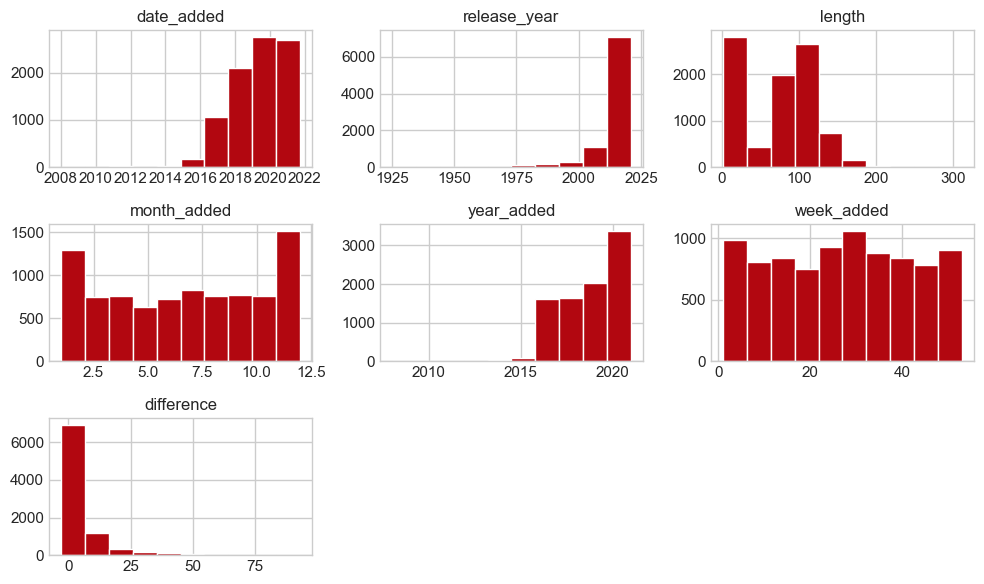

In [32]:
plt.figure(figsize=(12, 6))
df.hist()
plt.tight_layout()
plt.show()

<h2> Overall Content Analysis

In [33]:
content_by_month = df.groupby(['month_name_added','month_added']).agg({'type': 'count'}).rename(columns = {'type': 'content'}).sort_values(by='month_added')
content_by_month

content
month_name_added month_added         
January          1                738
February         2                563
March            3                742
April            4                763
May              5                632
June             6                728
July             7                827
August           8                754
September        9                769
October          10               760
November         11               705
December         12               813

<Axes: xlabel='month_name_added,month_added'>

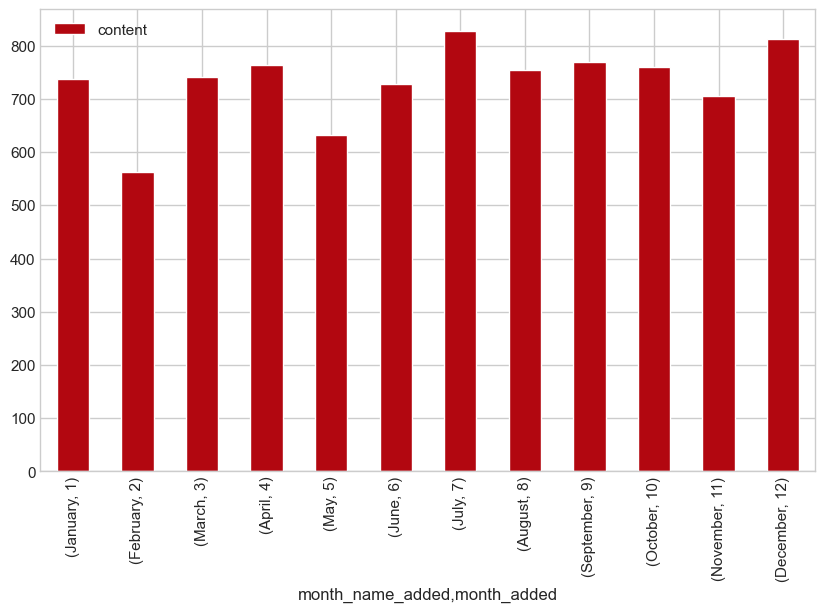

In [34]:
content_by_month.plot(kind='bar')

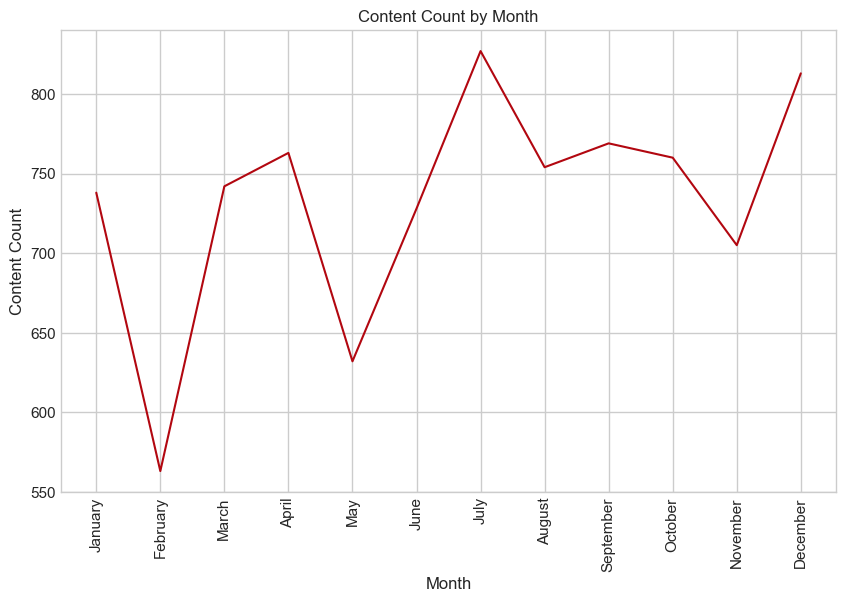

In [35]:
sns.lineplot(data=content_by_month, x='month_name_added', y ='content')
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Content Count')
plt.title('Content Count by Month')
plt.show()

In [36]:
df.shape

(8794, 19)

In [37]:
df.describe()

release_year       length  month_added   year_added   week_added  \
count   8794.000000  8794.000000  8794.000000  8794.000000  8794.000000   
mean    2014.183534    69.920173     6.654878  2018.872754    26.704799   
std        8.823527    50.797005     3.436903     1.573789    15.039028   
min     1925.000000     1.000000     1.000000  2008.000000     1.000000   
25%     2013.000000     2.000000     4.000000  2018.000000    14.000000   
50%     2017.000000    88.000000     7.000000  2019.000000    27.000000   
75%     2019.000000   106.000000    10.000000  2020.000000    40.000000   
max     2021.000000   312.000000    12.000000  2021.000000    53.000000   

        difference  
count  8794.000000  
mean      4.689220  
std       8.788256  
min      -3.000000  
25%       0.000000  
50%       1.000000  
75%       5.000000  
max      93.000000

In [38]:
df['type'].value_counts()

Movie      6128
TV Show    2666
Name: type, dtype: int64

<Axes: xlabel='release_year'>

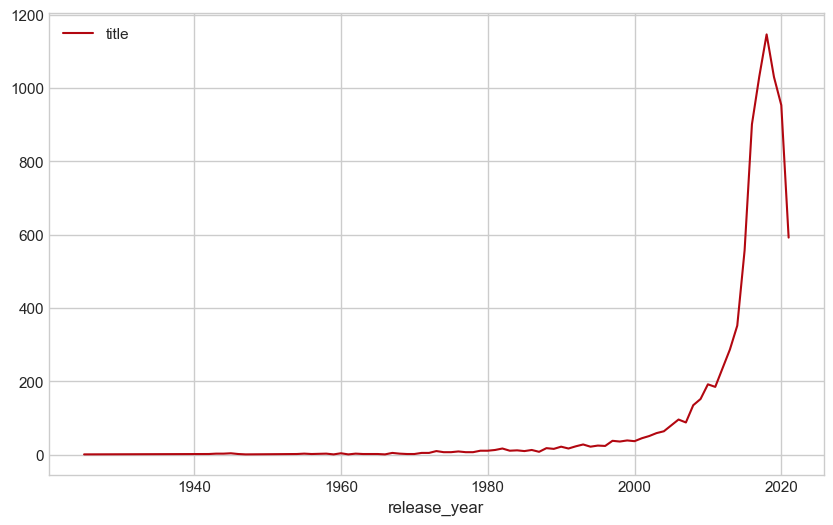

In [39]:
df.groupby('release_year')['title'].count().plot(legend='type')

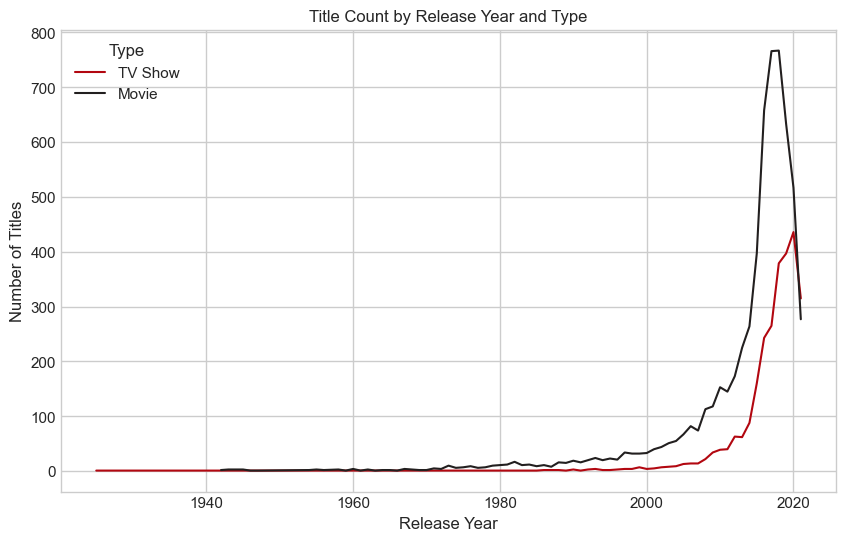

In [40]:
grouped = df.groupby(['release_year', 'type'])['title'].count().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='release_year', y='title', hue='type')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Title Count by Release Year and Type')
plt.legend(title='Type')
plt.show()

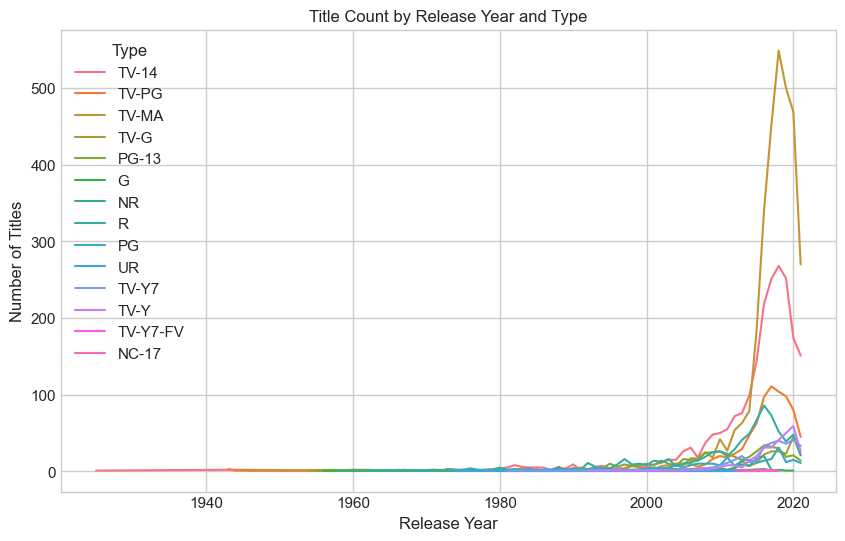

In [41]:
grouped = df.groupby(['release_year', 'rating'])['title'].count().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='release_year', y='title', hue='rating')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Title Count by Release Year and Type')
plt.legend(title='Type')
plt.show()

In [42]:
df['rating'].value_counts()

TV-MA       3206
TV-14       2158
TV-PG        861
R            799
PG-13        491
TV-Y7        333
TV-Y         306
PG           288
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

<Axes: >

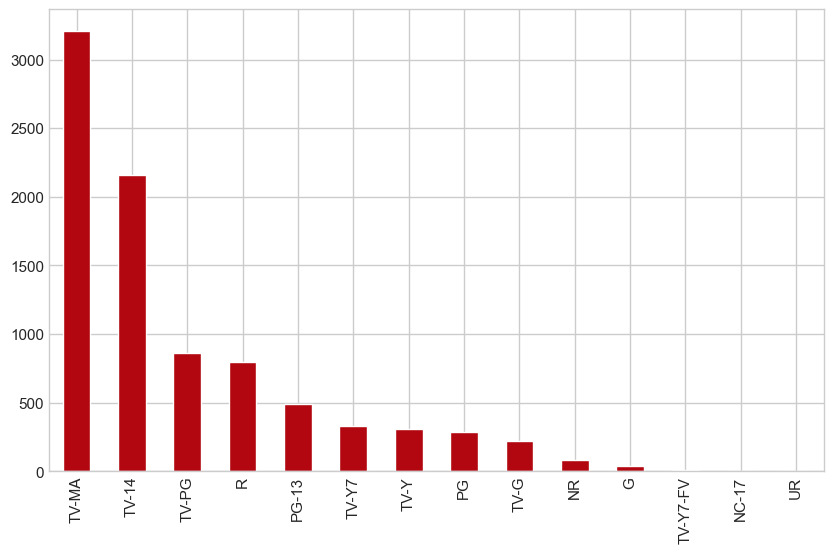

In [43]:
df['rating'].value_counts().plot(kind='bar')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8794 entries, 0 to 8806
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8794 non-null   object        
 1   type              8794 non-null   object        
 2   title             8794 non-null   object        
 3   director          8794 non-null   object        
 4   cast              8794 non-null   object        
 5   country           8794 non-null   object        
 6   date_added        8794 non-null   datetime64[ns]
 7   release_year      8794 non-null   int64         
 8   rating            8794 non-null   object        
 9   duration          8794 non-null   object        
 10  listed_in         8794 non-null   object        
 11  description       8794 non-null   object        
 12  length            8794 non-null   int64         
 13  min_or_season     8794 non-null   object        
 14  month_added       8794 n

In [45]:
df.groupby(['type','rating'])['length'].mean()

type     rating  
Movie    G            90.268293
         NC-17       125.000000
         NR           94.533333
         PG           98.069444
         PG-13       108.344196
         R           106.720201
         TV-14       110.290820
         TV-G         79.666667
         TV-MA        95.889913
         TV-PG        94.851852
         TV-Y         48.114504
         TV-Y7        66.287770
         TV-Y7-FV     68.400000
         UR          106.333333
TV Show  NR            1.500000
         R             1.000000
         TV-14         1.807114
         TV-G          1.851064
         TV-MA         1.682692
         TV-PG         1.629283
         TV-Y          1.851429
         TV-Y7         2.020619
         TV-Y7-FV      2.000000
Name: length, dtype: float64

In [46]:
df.isna().sum()

show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
length              0
min_or_season       0
month_added         0
month_name_added    0
year_added          0
week_added          0
difference          0
dtype: int64

In [47]:
df.corr()

/tmp/ipykernel_65803/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


release_year    length  month_added  year_added  week_added  \
release_year      1.000000 -0.249925    -0.039122    0.111548    0.001273   
length           -0.249925  1.000000    -0.017311    0.029345   -0.059063   
month_added      -0.039122 -0.017311     1.000000   -0.160388    0.866035   
year_added        0.111548  0.029345    -0.160388    1.000000   -0.155637   
week_added        0.001273 -0.059063     0.866035   -0.155637    1.000000   
difference       -0.984038  0.256183     0.010557    0.067083   -0.029149   

              difference  
release_year   -0.984038  
length          0.256183  
month_added     0.010557  
year_added      0.067083  
week_added     -0.029149  
difference      1.000000

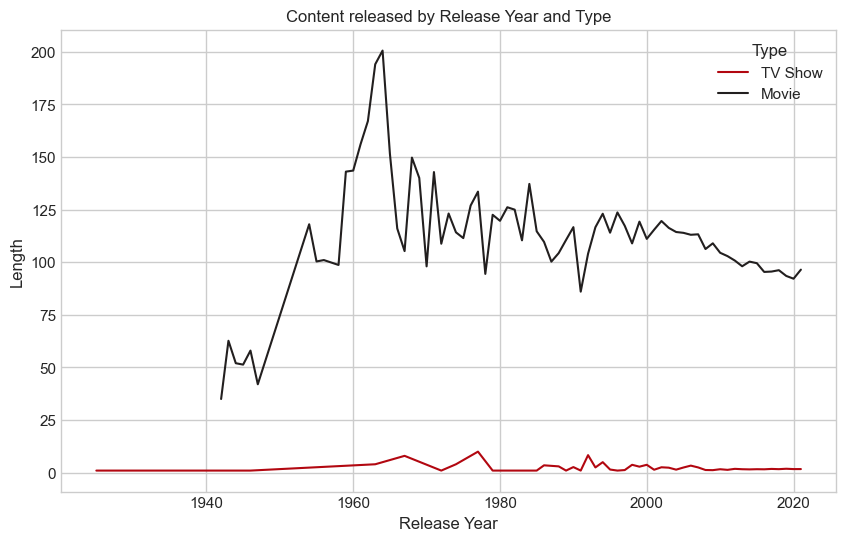

In [48]:
grouped = df.groupby(['release_year', 'type'])['length'].mean().reset_index()

plt.figure(figsize=(10, 6)) 
sns.lineplot(data=grouped, x='release_year', y='length', hue='type')
plt.xlabel('Release Year')
plt.ylabel('Length')
plt.title('Content released by Release Year and Type')
plt.legend(title='Type')
plt.show()

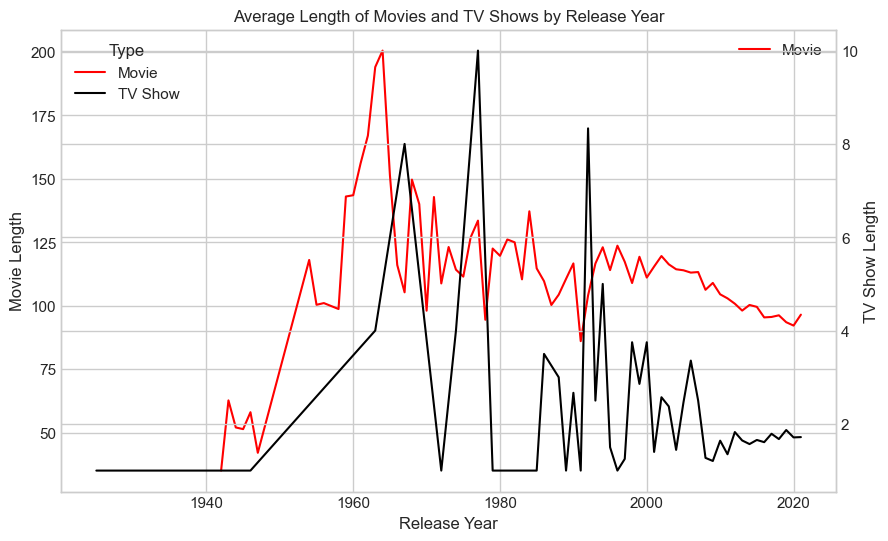

In [49]:
grouped = df.groupby(['release_year', 'type'])['length'].mean().reset_index()

movie_data = grouped[grouped['type'] == 'Movie']
tv_show_data = grouped[grouped['type'] == 'TV Show']

plt.figure(figsize=(10, 6))
ax1 = sns.lineplot(data=movie_data, x='release_year', y='length', color='red', label='Movie')

# Create the second y-axis
ax2 = ax1.twinx()
sns.lineplot(data=tv_show_data, x='release_year', y='length', color='black', ax=ax2, label='TV Show')

# Set labels and title
ax1.set_xlabel('Release Year')
ax1.set_ylabel('Movie Length')
ax2.set_ylabel('TV Show Length')
plt.title('Average Length of Movies and TV Shows by Release Year')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', title='Type')

plt.show()


<Axes: xlabel='type', ylabel='count'>

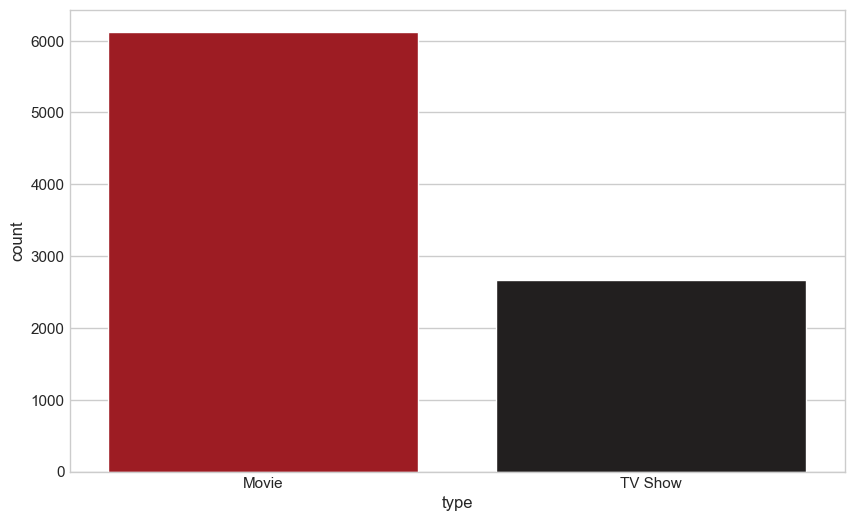

In [50]:
sns.countplot(data=df,x='type')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'PG-13'),
  Text(1, 0, 'TV-MA'),
  Text(2, 0, 'PG'),
  Text(3, 0, 'TV-14'),
  Text(4, 0, 'TV-PG'),
  Text(5, 0, 'TV-Y'),
  Text(6, 0, 'TV-Y7'),
  Text(7, 0, 'R'),
  Text(8, 0, 'TV-G'),
  Text(9, 0, 'G'),
  Text(10, 0, 'NC-17'),
  Text(11, 0, 'NR'),
  Text(12, 0, 'TV-Y7-FV'),
  Text(13, 0, 'UR')])

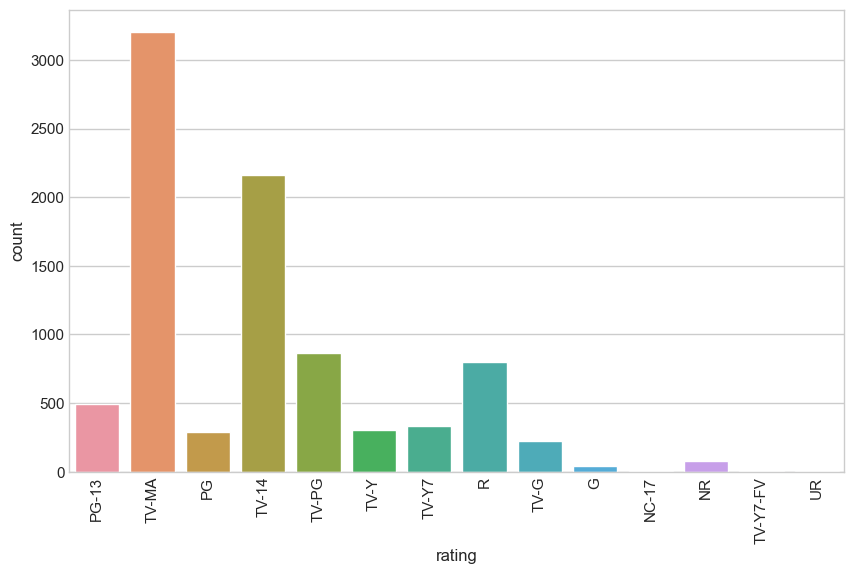

In [51]:
sns.countplot(data=df,x='rating')
plt.xticks(rotation=90)

In [52]:
df.describe()

release_year       length  month_added   year_added   week_added  \
count   8794.000000  8794.000000  8794.000000  8794.000000  8794.000000   
mean    2014.183534    69.920173     6.654878  2018.872754    26.704799   
std        8.823527    50.797005     3.436903     1.573789    15.039028   
min     1925.000000     1.000000     1.000000  2008.000000     1.000000   
25%     2013.000000     2.000000     4.000000  2018.000000    14.000000   
50%     2017.000000    88.000000     7.000000  2019.000000    27.000000   
75%     2019.000000   106.000000    10.000000  2020.000000    40.000000   
max     2021.000000   312.000000    12.000000  2021.000000    53.000000   

        difference  
count  8794.000000  
mean      4.689220  
std       8.788256  
min      -3.000000  
25%       0.000000  
50%       1.000000  
75%       5.000000  
max      93.000000

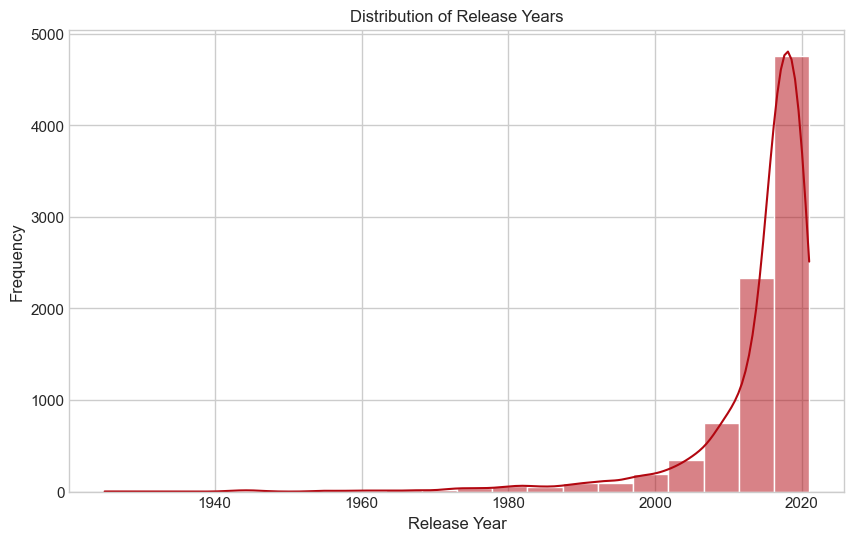

In [53]:
# Visualize the distribution of release years using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='release_year', bins=20, kde=True)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

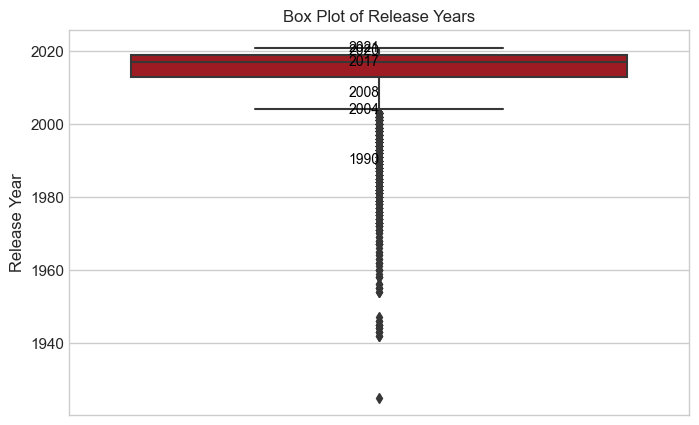

In [54]:
plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=df, y='release_year')
plt.title('Box Plot of Release Years')
plt.ylabel('Release Year')

# Annotate the box plot with the value labels
for line in ax.lines:
    y = line.get_ydata().mean()
    ax.text(0, y, f"{y:.0f}", color='black', ha='right', va='center', fontsize=10)

plt.show()

In [55]:
average_duration = df.groupby('type')['length'].mean()
average_duration

type
Movie      99.577187
TV Show     1.751313
Name: length, dtype: float64

In [56]:
df['country'].value_counts().head(5)

United States     2809
India              972
Unknown            830
United Kingdom     418
Japan              244
Name: country, dtype: int64

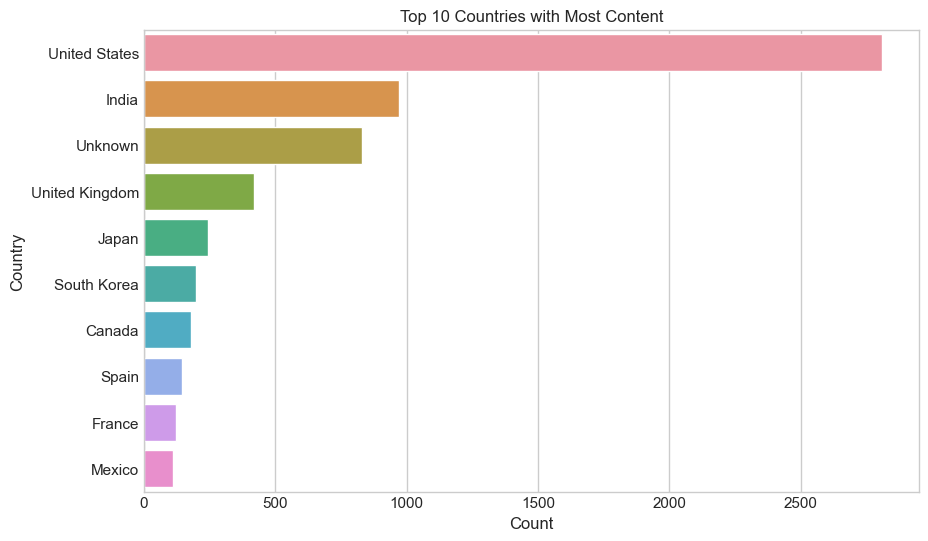

In [57]:
top_cnt = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cnt, y=top_cnt.index)
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

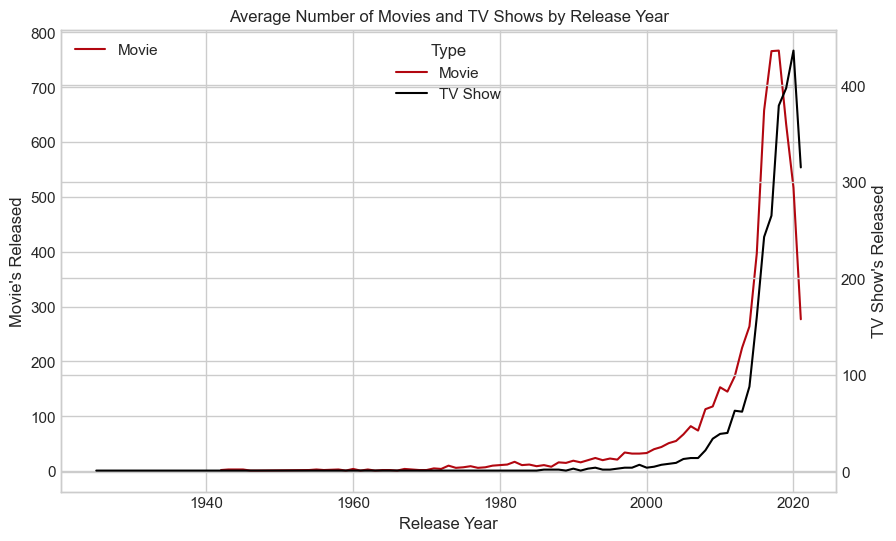

In [58]:
# Group by 'release_year' and 'type', and calculate the mean of 'length'
grouped = df.groupby(['release_year', 'type'])['show_id'].count().reset_index()

# Separate the data for movie and TV show
movie_data = grouped[grouped['type'] == 'Movie']
tv_show_data = grouped[grouped['type'] == 'TV Show']

# Create a figure and the first y-axis
plt.figure(figsize=(10, 6))
ax1 = sns.lineplot(data=movie_data, x='release_year', y='show_id', label='Movie')

# Create the second y-axis
ax2 = ax1.twinx()
sns.lineplot(data=tv_show_data, x='release_year', y='show_id', color='black',ax=ax2, label='TV Show')

# Set labels and title
ax1.set_xlabel('Release Year')
ax1.set_ylabel("Movie's Released")
ax2.set_ylabel("TV Show's Released")
plt.title('Average Number of Movies and TV Shows by Release Year')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper center', title='Type')

plt.show()


/Users/gautham/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


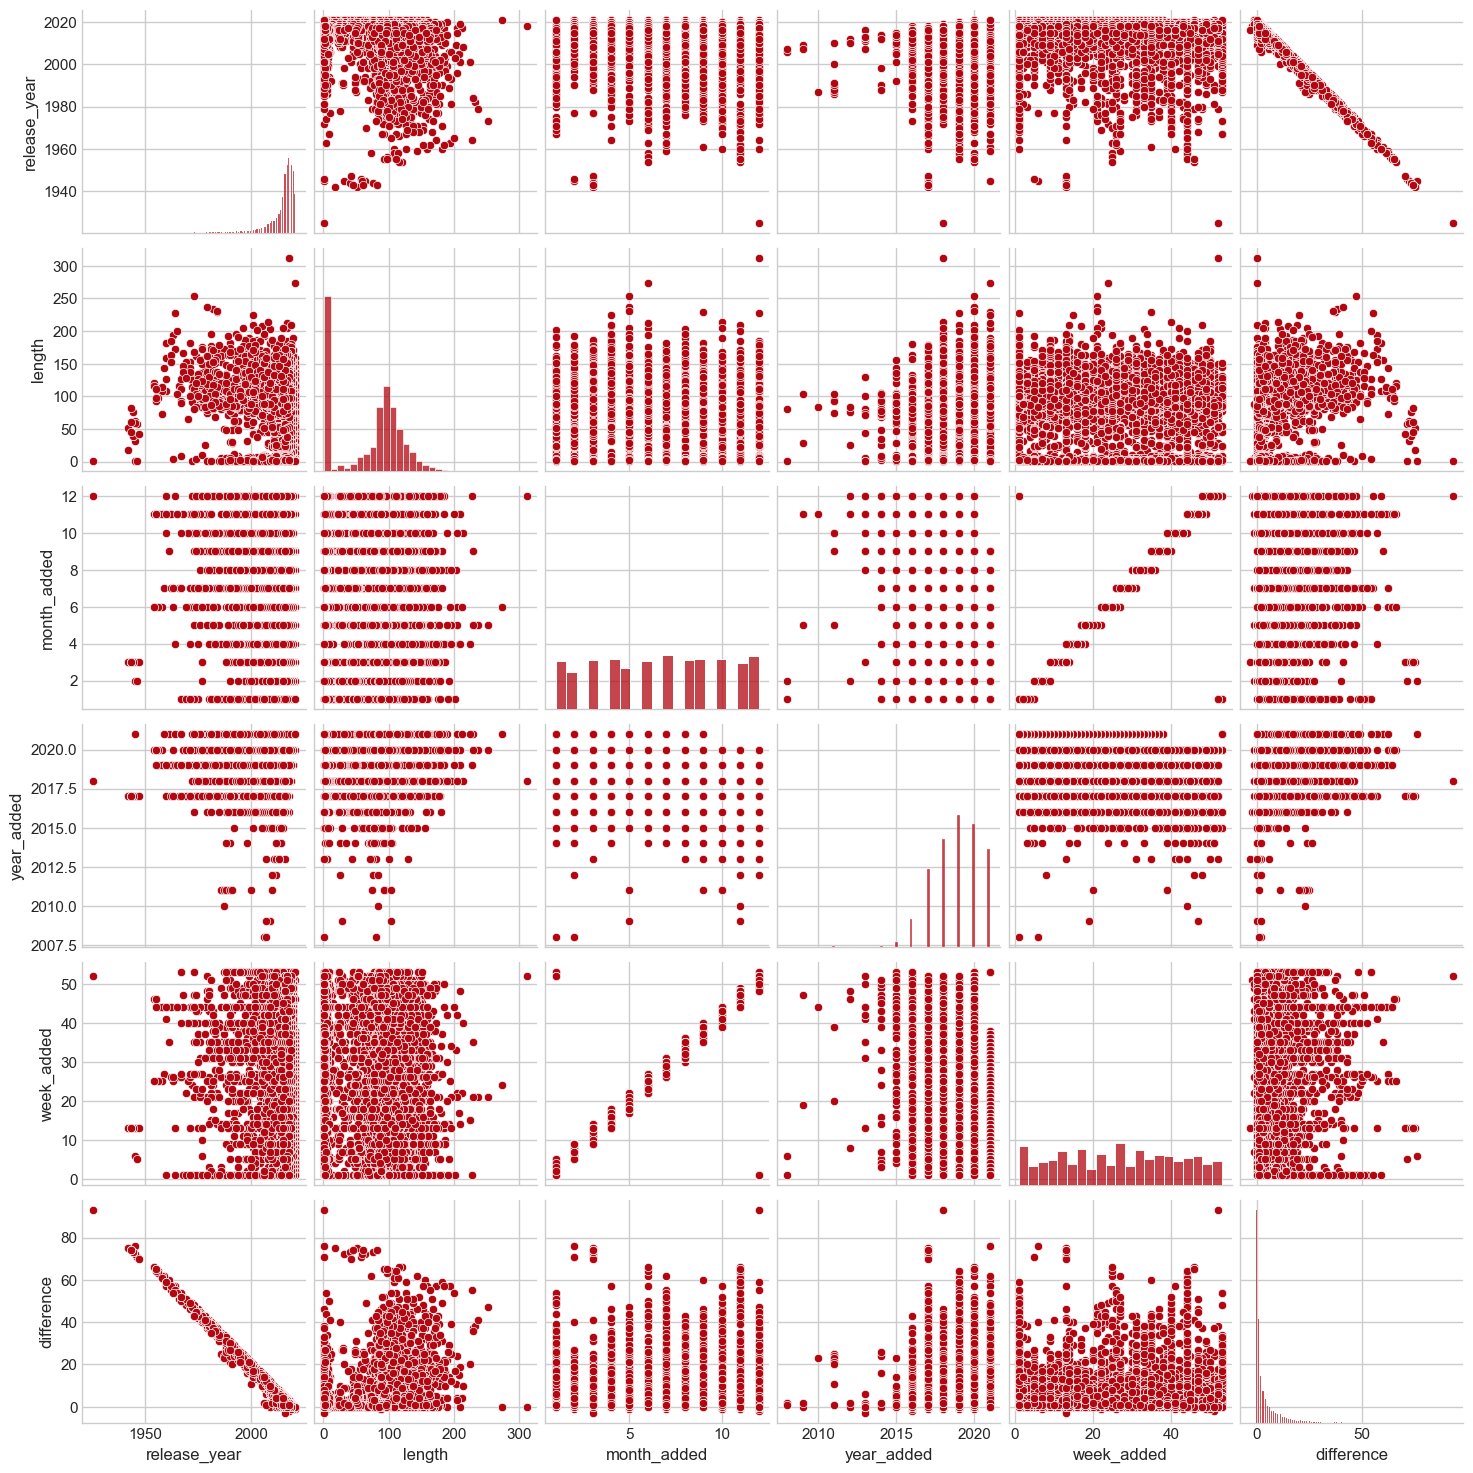

In [59]:
sns.pairplot(df)

In [60]:
# For viz: Ratio of Movies & TV shows

x=df.groupby(['type'])['type'].count()
y=len(df)
r=((x/y)).round(2)
print(r)
mf_ratio = pd.DataFrame(r).T
mf_ratio*100

type
Movie      0.7
TV Show    0.3
Name: type, dtype: float64


type  Movie  TV Show
type   70.0     30.0

In [61]:
data_sub = df.groupby('type')['year_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T.reset_index()
data_sub

type  year_added  TV Show   Movie
0           2008      1.0     2.0
1           2009      0.0     2.0
2           2010      0.0     1.0
3           2011      0.0    13.0
4           2012      0.0     3.0
5           2013      5.0    11.0
6           2014      5.0    24.0
7           2015     26.0    82.0
8           2016    176.0   427.0
9           2017    349.0  1187.0
10          2018    412.0  1649.0
11          2019    592.0  2016.0
12          2020    595.0  1879.0
13          2021    505.0  1498.0

<Figure size 1000x600 with 0 Axes>

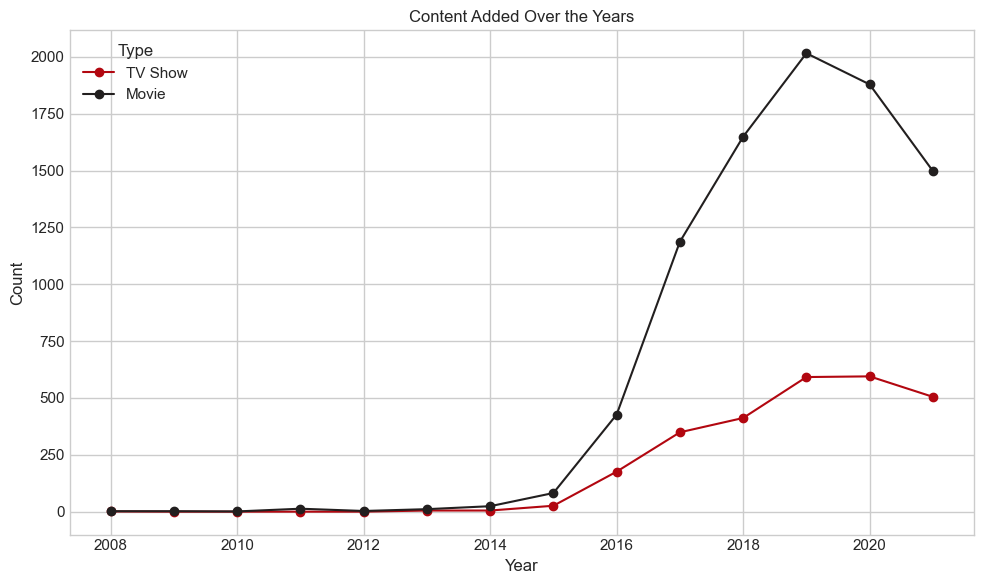

In [62]:
data_sub.set_index('year_added', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
data_sub.plot(kind='line', marker='o')

plt.title('Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Type')

plt.tight_layout()
plt.show()

<h2> 5. Which genre movies are more popular or produced more
Hint : We want you to apply the word cloud on the genre columns to know which kind
of genre is produced

In [63]:
from PIL import Image
from wordcloud import WordCloud
import random

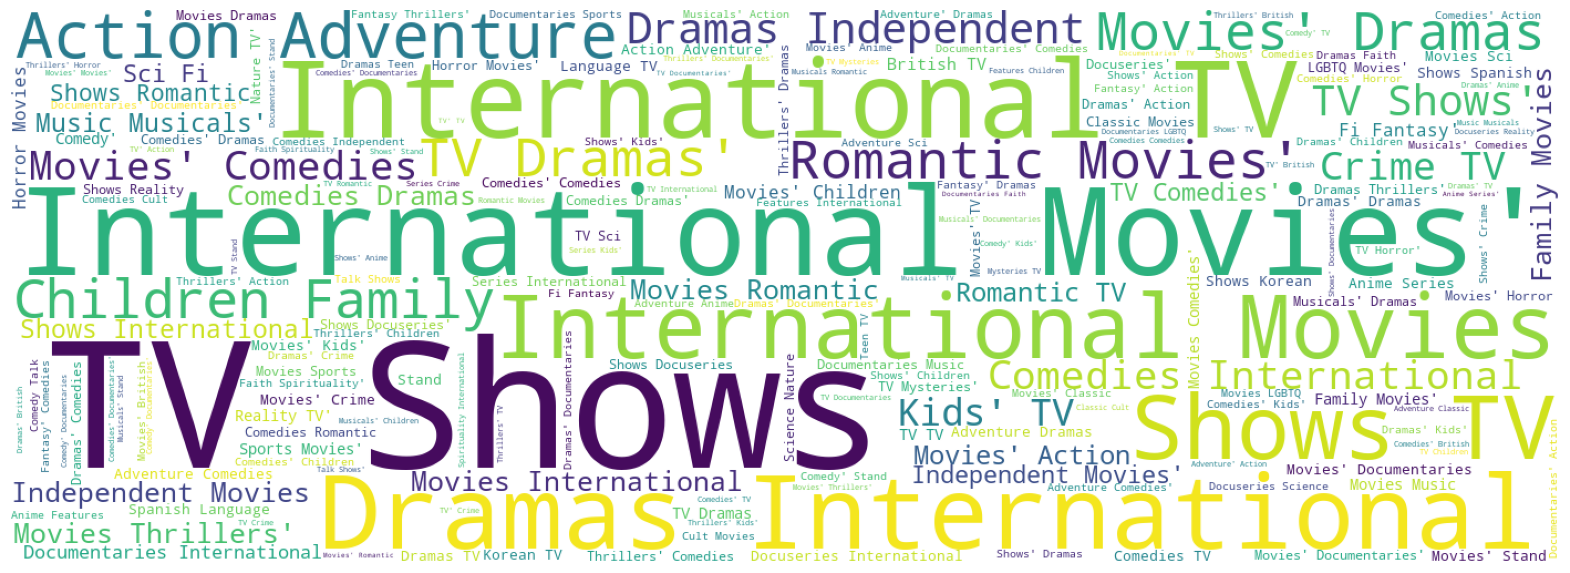

In [64]:
text = str(list(df['listed_in']))


mask = np.array(Image.open('netflix_logo.jpg'))

plt.rcParams['figure.figsize'] = (20, 20)
wordcloud = WordCloud(background_color = 'white', width = 1400,  height = 500).generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

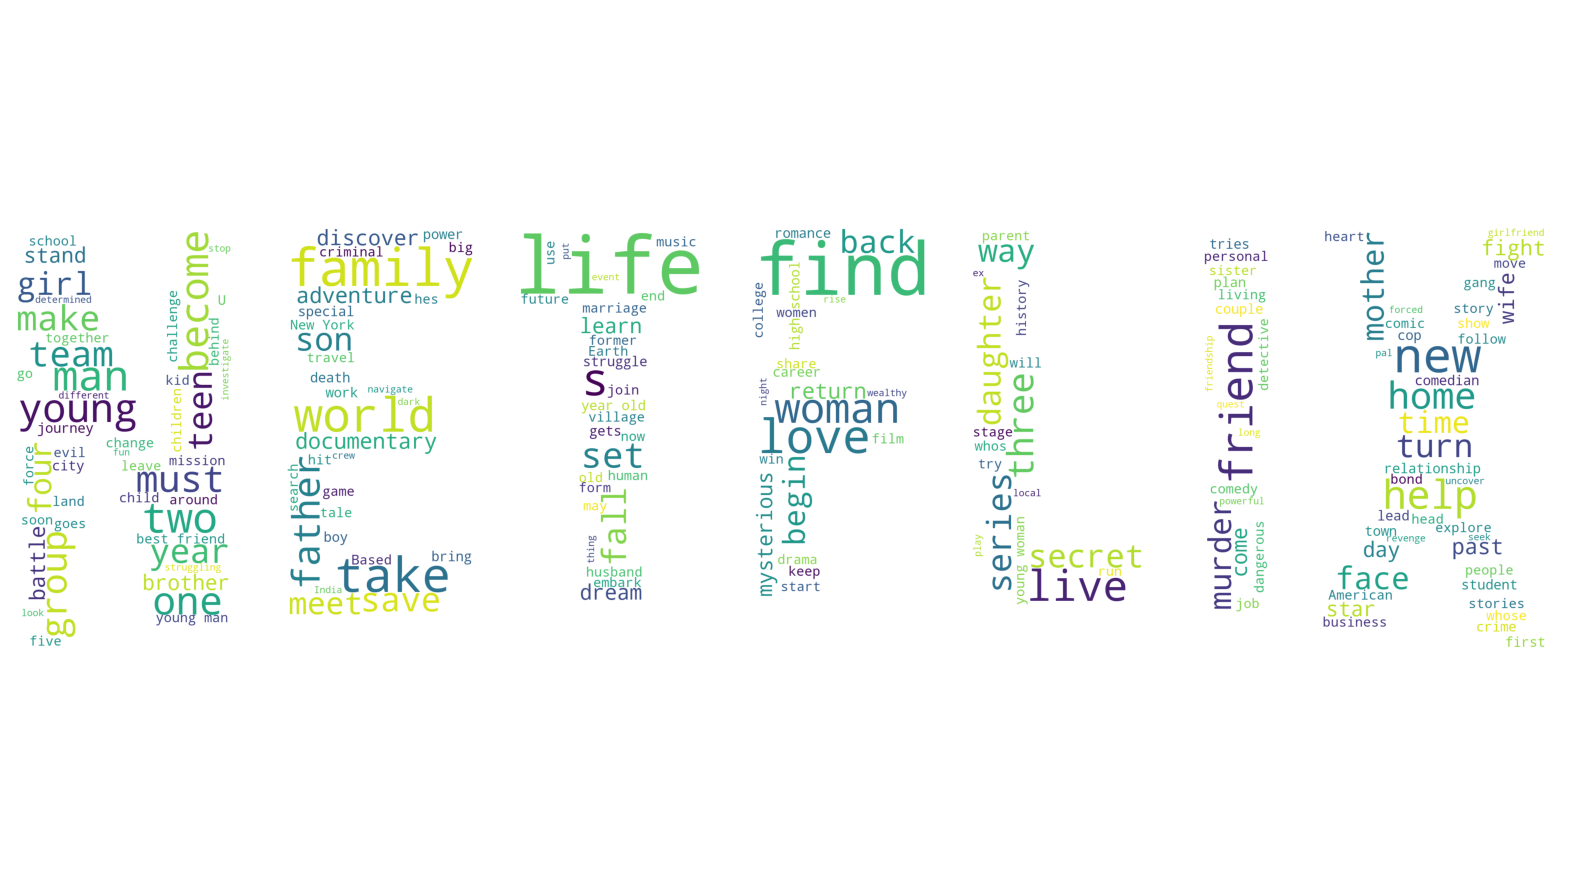

In [65]:
text = str(list(df['description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')


mask = np.array(Image.open('netflix_logo.jpg'))

plt.rcParams['figure.figsize'] = (20, 20)
wordcloud = WordCloud(background_color = 'white', width = 1400,  height = 500, mask = mask).generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<h2>Unpivoting the data and splitting into TV Shows and Movies and Analysing each Separately

In [66]:
import plotly.express as px

In [67]:
fig = px.pie(df['type'].value_counts().reset_index(), values = 'type', names = 'index', width = 600, height = 600)
fig.show()

In [68]:
content_by_month = df.query('month_added != "No" & month_added != ""')\
.groupby('month_added').agg({'type': 'count'}).reset_index()\
.rename(columns = {'type': 'content'}).sort_values('content', ascending = False)
content_by_month

month_added  content
6             7      827
11           12      813
8             9      769
3             4      763
9            10      760
7             8      754
2             3      742
0             1      738
5             6      728
10           11      705
4             5      632
1             2      563

     duration  title
0    1 Season   1793
1   2 Seasons    421
2   3 Seasons    198
3   4 Seasons     94
4   5 Seasons     64
5   6 Seasons     33
6   7 Seasons     23
7   8 Seasons     17
8   9 Seasons      9
9  10 Seasons      6


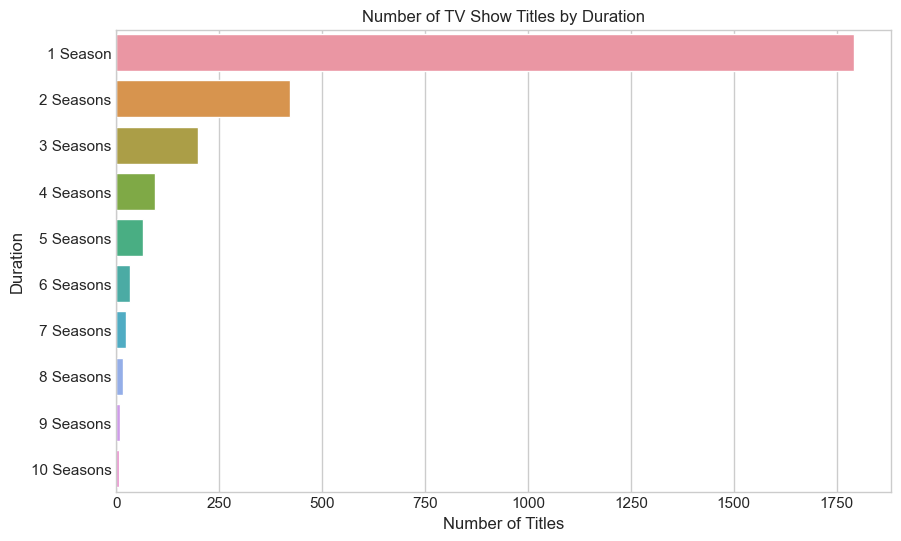

In [69]:
seasons = df.query("type == 'TV Show'").groupby('duration').agg({'title': 'count'}).sort_values(by='title',ascending=False).reset_index()
seasons = seasons[:10]
print(seasons)
plt.figure(figsize=(10, 6)) 
sns.barplot(data=seasons, y='duration', x='title')
plt.xlabel('Number of Titles')
plt.ylabel('Duration')
plt.title('Number of TV Show Titles by Duration')
plt.show()

In [70]:
graph = df.groupby(['release_year','type'])['title'].count().reset_index()
pd.DataFrame(graph)

release_year     type  title
0            1925  TV Show      1
1            1942    Movie      2
2            1943    Movie      3
3            1944    Movie      3
4            1945    Movie      3
..            ...      ...    ...
114          2019  TV Show    397
115          2020    Movie    517
116          2020  TV Show    436
117          2021    Movie    277
118          2021  TV Show    315

[119 rows x 3 columns]

In [71]:
df

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water          Unknown   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans          Unknown   
4         s5  TV Show           Kota Factory          Unknown   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb          Unknown   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                               Unknown  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                               Unknown        Unknown   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                            Unknown        Unknown   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

     date_added  release_year rating   duration  \
0    2021-09-25          2020  PG-13     90 min   
1    2021-09-24          2021  TV-MA  2 Seasons   
2    2021-09-24          2021  TV-MA   1 Season   
3    2021-09-24          2021  TV-MA   1 Season   
4    2021-09-24          2021  TV-MA  2 Seasons   
...         ...           ...    ...        ...   
8802 2019-11-20          2007      R    158 min   
8803 2019-07-01          2018  TV-Y7  2 Seasons   
8804 2019-11-01          2009      R     88 min   
8805 2020-01-11          2006     PG     88 min   
8806 2019-03-02          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  length min_or_season  \
0     As her father nears the end of his life, filmm...      90           min   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
2     To protect his family from a powerful drug lor...       1        Season   
3     Feuds, flirtations and toilet talk go down amo...       1        Season   
4     In a city of coaching centers known to train I...       2       Seasons   
...                                                 ...     ...           ...   
8802  A political cartoonist, a crime reporter and a...     158           min   
8803  While living alone in a spooky town, a young g...       2       Seasons   
8804  Looking to survive in a world taken over by zo...      88           min   
8805  Dragged from civilian life, a former superhero...      88           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   

      month_added month_name_added  year

In [72]:
unpivoted_df = df.assign(cast=df['cast'].str.split(', ')).explode('cast')

unpivoted_df

show_id     type                 title         director  \
0         s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show         Blood & Water          Unknown   
1         s2  TV Show         Blood & Water          Unknown   
1         s2  TV Show         Blood & Water          Unknown   
1         s2  TV Show         Blood & Water          Unknown   
...      ...      ...                   ...              ...   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   

                       cast        country date_added  release_year rating  \
0                   Unknown  United States 2021-09-25          2020  PG-13   
1                Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
1               Khosi Ngema   South Africa 2021-09-24          2021  TV-MA   
1             Gail Mabalane   South Africa 2021-09-24          2021  TV-MA   
1            Thabang Molaba   South Africa 2021-09-24          2021  TV-MA   
...                     ...            ...        ...           ...    ...   
8806       Manish Chaudhary          India 2019-03-02          2015  TV-14   
8806           Meghna Malik          India 2019-03-02          2015  TV-14   
8806          Malkeet Rauni          India 2019-03-02          2015  TV-14   
8806         Anita Shabdish          India 2019-03-02          2015  TV-14   
8806  Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   

       duration                                        listed_in  \
0        90 min                                    Documentaries   
1     2 Seasons  International TV Shows, TV Dramas, TV Mysteries   
1     2 Seasons  International TV Shows, TV Dramas, TV Mysteries   
1     2 Seasons  International TV Shows, TV Dramas, TV Mysteries   
1     2 Seasons  International TV Shows, TV Dramas, TV Mysteries   
...         ...                                              ...   
8806    111 min   Dramas, International Movies, Music & Musicals   
8806    111 min   Dramas, International Movies, Music & Musicals   
8806    111 min   Dramas, International Movies, Music & Musicals   
8806    111 min   Dramas, International Movies, Music & Musicals   
8806    111 min   Dramas, International Movies, Music & Musicals   

                                            description  length min_or_season  \
0     As her father nears the end of his life, filmm...      90           min   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
...                                                 ...     ...           ...   
8806  A scrappy but poor boy worms his way into a ty...     111           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   

      month_added month_name_added  year_added  week_added  difference  
0               9        September        2021          38           1  
1               9        September        2021          38           0  
1               9        September        2021          38           0  
1               9        September        2021          38           0  
1               9        September        2021          38           0  
...           ...              ...         ...         ...         ... 

In [73]:
unpivoted_df.shape

(64879, 19)

In [74]:
unpivoted_df = unpivoted_df.assign(director=df['director'].str.split(', ')).explode('director')

In [75]:
unpivoted_df.shape

(70740, 19)

In [76]:
unpivoted_df = unpivoted_df.assign(country=df['country'].str.split(', ')).explode('country')

In [77]:
unpivoted_df.shape

(89310, 19)

In [78]:
unpivoted_df

show_id     type                 title         director  \
0         s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show         Blood & Water          Unknown   
1         s2  TV Show         Blood & Water          Unknown   
1         s2  TV Show         Blood & Water          Unknown   
1         s2  TV Show         Blood & Water          Unknown   
...      ...      ...                   ...              ...   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   
8806   s8807    Movie                Zubaan      Mozez Singh   

                       cast        country date_added  release_year rating  \
0                   Unknown  United States 2021-09-25          2020  PG-13   
1                Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
1               Khosi Ngema   South Africa 2021-09-24          2021  TV-MA   
1             Gail Mabalane   South Africa 2021-09-24          2021  TV-MA   
1            Thabang Molaba   South Africa 2021-09-24          2021  TV-MA   
...                     ...            ...        ...           ...    ...   
8806       Manish Chaudhary          India 2019-03-02          2015  TV-14   
8806           Meghna Malik          India 2019-03-02          2015  TV-14   
8806          Malkeet Rauni          India 2019-03-02          2015  TV-14   
8806         Anita Shabdish          India 2019-03-02          2015  TV-14   
8806  Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   

       duration                                        listed_in  \
0        90 min                                    Documentaries   
1     2 Seasons  International TV Shows, TV Dramas, TV Mysteries   
1     2 Seasons  International TV Shows, TV Dramas, TV Mysteries   
1     2 Seasons  International TV Shows, TV Dramas, TV Mysteries   
1     2 Seasons  International TV Shows, TV Dramas, TV Mysteries   
...         ...                                              ...   
8806    111 min   Dramas, International Movies, Music & Musicals   
8806    111 min   Dramas, International Movies, Music & Musicals   
8806    111 min   Dramas, International Movies, Music & Musicals   
8806    111 min   Dramas, International Movies, Music & Musicals   
8806    111 min   Dramas, International Movies, Music & Musicals   

                                            description  length min_or_season  \
0     As her father nears the end of his life, filmm...      90           min   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
...                                                 ...     ...           ...   
8806  A scrappy but poor boy worms his way into a ty...     111           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   

      month_added month_name_added  year_added  week_added  difference  
0               9        September        2021          38           1  
1               9        September        2021          38           0  
1               9        September        2021          38           0  
1               9        September        2021          38           0  
1               9        September        2021          38           0  
...           ...              ...         ...         ...         ... 

In [79]:
df

show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water          Unknown   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans          Unknown   
4         s5  TV Show           Kota Factory          Unknown   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb          Unknown   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                               Unknown  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                               Unknown        Unknown   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                            Unknown        Unknown   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

     date_added  release_year rating   duration  \
0    2021-09-25          2020  PG-13     90 min   
1    2021-09-24          2021  TV-MA  2 Seasons   
2    2021-09-24          2021  TV-MA   1 Season   
3    2021-09-24          2021  TV-MA   1 Season   
4    2021-09-24          2021  TV-MA  2 Seasons   
...         ...           ...    ...        ...   
8802 2019-11-20          2007      R    158 min   
8803 2019-07-01          2018  TV-Y7  2 Seasons   
8804 2019-11-01          2009      R     88 min   
8805 2020-01-11          2006     PG     88 min   
8806 2019-03-02          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  length min_or_season  \
0     As her father nears the end of his life, filmm...      90           min   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
2     To protect his family from a powerful drug lor...       1        Season   
3     Feuds, flirtations and toilet talk go down amo...       1        Season   
4     In a city of coaching centers known to train I...       2       Seasons   
...                                                 ...     ...           ...   
8802  A political cartoonist, a crime reporter and a...     158           min   
8803  While living alone in a spooky town, a young g...       2       Seasons   
8804  Looking to survive in a world taken over by zo...      88           min   
8805  Dragged from civilian life, a former superhero...      88           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   

      month_added month_name_added  year

In [80]:
unpivoted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89310 entries, 0 to 8806
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           89310 non-null  object        
 1   type              89310 non-null  object        
 2   title             89310 non-null  object        
 3   director          89310 non-null  object        
 4   cast              89310 non-null  object        
 5   country           89310 non-null  object        
 6   date_added        89310 non-null  datetime64[ns]
 7   release_year      89310 non-null  int64         
 8   rating            89310 non-null  object        
 9   duration          89310 non-null  object        
 10  listed_in         89310 non-null  object        
 11  description       89310 non-null  object        
 12  length            89310 non-null  int64         
 13  min_or_season     89310 non-null  object        
 14  month_added       89310

In [81]:
unpivoted_df['listed_in'] = unpivoted_df['listed_in'].str.strip()  # Clean the column in the new DataFrame

In [82]:
unpivoted_df['country'] = unpivoted_df['country'].str.strip()  # Clean the column in the new DataFrame

In [83]:
unpivoted_df['cast'] = unpivoted_df['cast'].str.strip()  # Clean the column in the new DataFrame

In [84]:
unpivoted_df['director'] = unpivoted_df['cast'].str.strip()  # Clean the column in the new DataFrame

In [85]:
director = pd.DataFrame(unpivoted_df.groupby('director')['title'].nunique()).reset_index()
director = director.sort_values(by='title',ascending=False)[1:]
director

director  title
2829        Anupam Kher     43
30459    Shah Rukh Khan     35
16680     Julie Tejwani     33
32559  Takahiro Sakurai     32
24191  Naseeruddin Shah     32
...                 ...    ...
14208       Jamie Lever      1
14206         Jamie Lee      1
14204       Jamie Kenna      1
14203       Jamie Kaler      1
36403      Ṣọpẹ́ Dìrísù      1

[36403 rows x 2 columns]

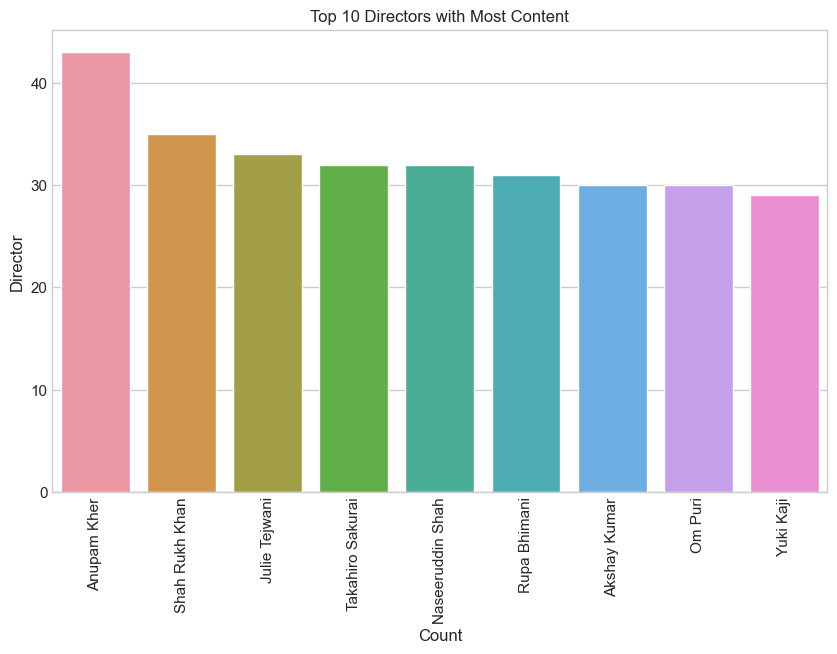

In [86]:
# Visualize the top 10 directors with the most content
plt.figure(figsize=(10, 6))
sns.barplot(data=director[:9],x='director', y='title')
plt.title('Top 10 Directors with Most Content')
plt.xticks(rotation=90)
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()

In [87]:
unpivoted_df = unpivoted_df.assign(country=df['country'].str.split(',')).explode('country')
unpivoted_df

show_id     type                 title               director  \
0         s1    Movie  Dick Johnson Is Dead                Unknown   
1         s2  TV Show         Blood & Water             Ama Qamata   
1         s2  TV Show         Blood & Water            Khosi Ngema   
1         s2  TV Show         Blood & Water          Gail Mabalane   
1         s2  TV Show         Blood & Water         Thabang Molaba   
...      ...      ...                   ...                    ...   
8806   s8807    Movie                Zubaan       Manish Chaudhary   
8806   s8807    Movie                Zubaan           Meghna Malik   
8806   s8807    Movie                Zubaan          Malkeet Rauni   
8806   s8807    Movie                Zubaan         Anita Shabdish   
8806   s8807    Movie                Zubaan  Chittaranjan Tripathy   

                       cast        country date_added  release_year rating  \
0                   Unknown  United States 2021-09-25          2020  PG-13   
1                Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
1               Khosi Ngema   South Africa 2021-09-24          2021  TV-MA   
1             Gail Mabalane   South Africa 2021-09-24          2021  TV-MA   
1            Thabang Molaba   South Africa 2021-09-24          2021  TV-MA   
...                     ...            ...        ...           ...    ...   
8806       Manish Chaudhary          India 2019-03-02          2015  TV-14   
8806           Meghna Malik          India 2019-03-02          2015  TV-14   
8806          Malkeet Rauni          India 2019-03-02          2015  TV-14   
8806         Anita Shabdish          India 2019-03-02          2015  TV-14   
8806  Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   

       duration                                        listed_in  \
0        90 min                                    Documentaries   
1     2 Seasons  International TV Shows, TV Dramas, TV Mysteries   
1     2 Seasons  International TV Shows, TV Dramas, TV Mysteries   
1     2 Seasons  International TV Shows, TV Dramas, TV Mysteries   
1     2 Seasons  International TV Shows, TV Dramas, TV Mysteries   
...         ...                                              ...   
8806    111 min   Dramas, International Movies, Music & Musicals   
8806    111 min   Dramas, International Movies, Music & Musicals   
8806    111 min   Dramas, International Movies, Music & Musicals   
8806    111 min   Dramas, International Movies, Music & Musicals   
8806    111 min   Dramas, International Movies, Music & Musicals   

                                            description  length min_or_season  \
0     As her father nears the end of his life, filmm...      90           min   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
...                                                 ...     ...           ...   
8806  A scrappy but poor boy worms his way into a ty...     111           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   

      month_added month_name_added  year_added  week_added  difference  
0               9        September        2021          38           1  
1               9        September        2021          38           0  
1               9        September        2021          38           0  
1               9        September        2021          38           0  
1               9        September        2021          38           0  

In [88]:
unpivoted_df = unpivoted_df.assign(listed_in=df['listed_in'].str.split(',')).explode('listed_in')
unpivoted_df

show_id     type                 title               director  \
0         s1    Movie  Dick Johnson Is Dead                Unknown   
1         s2  TV Show         Blood & Water             Ama Qamata   
1         s2  TV Show         Blood & Water             Ama Qamata   
1         s2  TV Show         Blood & Water             Ama Qamata   
1         s2  TV Show         Blood & Water            Khosi Ngema   
...      ...      ...                   ...                    ...   
8806   s8807    Movie                Zubaan         Anita Shabdish   
8806   s8807    Movie                Zubaan         Anita Shabdish   
8806   s8807    Movie                Zubaan  Chittaranjan Tripathy   
8806   s8807    Movie                Zubaan  Chittaranjan Tripathy   
8806   s8807    Movie                Zubaan  Chittaranjan Tripathy   

                       cast        country date_added  release_year rating  \
0                   Unknown  United States 2021-09-25          2020  PG-13   
1                Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
1                Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
1                Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
1               Khosi Ngema   South Africa 2021-09-24          2021  TV-MA   
...                     ...            ...        ...           ...    ...   
8806         Anita Shabdish          India 2019-03-02          2015  TV-14   
8806         Anita Shabdish          India 2019-03-02          2015  TV-14   
8806  Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   
8806  Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   
8806  Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   

       duration               listed_in  \
0        90 min           Documentaries   
1     2 Seasons  International TV Shows   
1     2 Seasons               TV Dramas   
1     2 Seasons            TV Mysteries   
1     2 Seasons  International TV Shows   
...         ...                     ...   
8806    111 min    International Movies   
8806    111 min        Music & Musicals   
8806    111 min                  Dramas   
8806    111 min    International Movies   
8806    111 min        Music & Musicals   

                                            description  length min_or_season  \
0     As her father nears the end of his life, filmm...      90           min   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
...                                                 ...     ...           ...   
8806  A scrappy but poor boy worms his way into a ty...     111           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   

      month_added month_name_added  year_added  week_added  difference  
0               9        September        2021          38           1  
1               9        September        2021          38           0  
1               9        September        2021          38           0  
1               9        September        2021          38           0  
1               9        September        2021          38           0  
...           ...              ...         ...         ...         ...  
8806            3            March        2019           9           4  
8806            3            March        2019           9           4  
8806            3            March        2019           9           4  
8806   

In [89]:
country = pd.DataFrame(unpivoted_df.groupby('country')['title'].nunique()).reset_index()
country = country.sort_values(by='title',ascending=False)
country

country  title
191   United States   3202
141           India   1008
192         Unknown    830
190  United Kingdom    627
106   United States    479
..              ...    ...
157      Mozambique      1
158         Namibia      1
54           Latvia      1
53           Kuwait      1
197        Zimbabwe      1

[198 rows x 2 columns]

In [90]:
country = country[country['country'] != 'Unknown']
country  = country.reset_index()
country

index         country  title
0      191   United States   3202
1      141           India   1008
2      190  United Kingdom    627
3      106   United States    479
4      122          Canada    271
..     ...             ...    ...
192    157      Mozambique      1
193    158         Namibia      1
194     54          Latvia      1
195     53          Kuwait      1
196    197        Zimbabwe      1

[197 rows x 3 columns]

<Figure size 500x600 with 0 Axes>

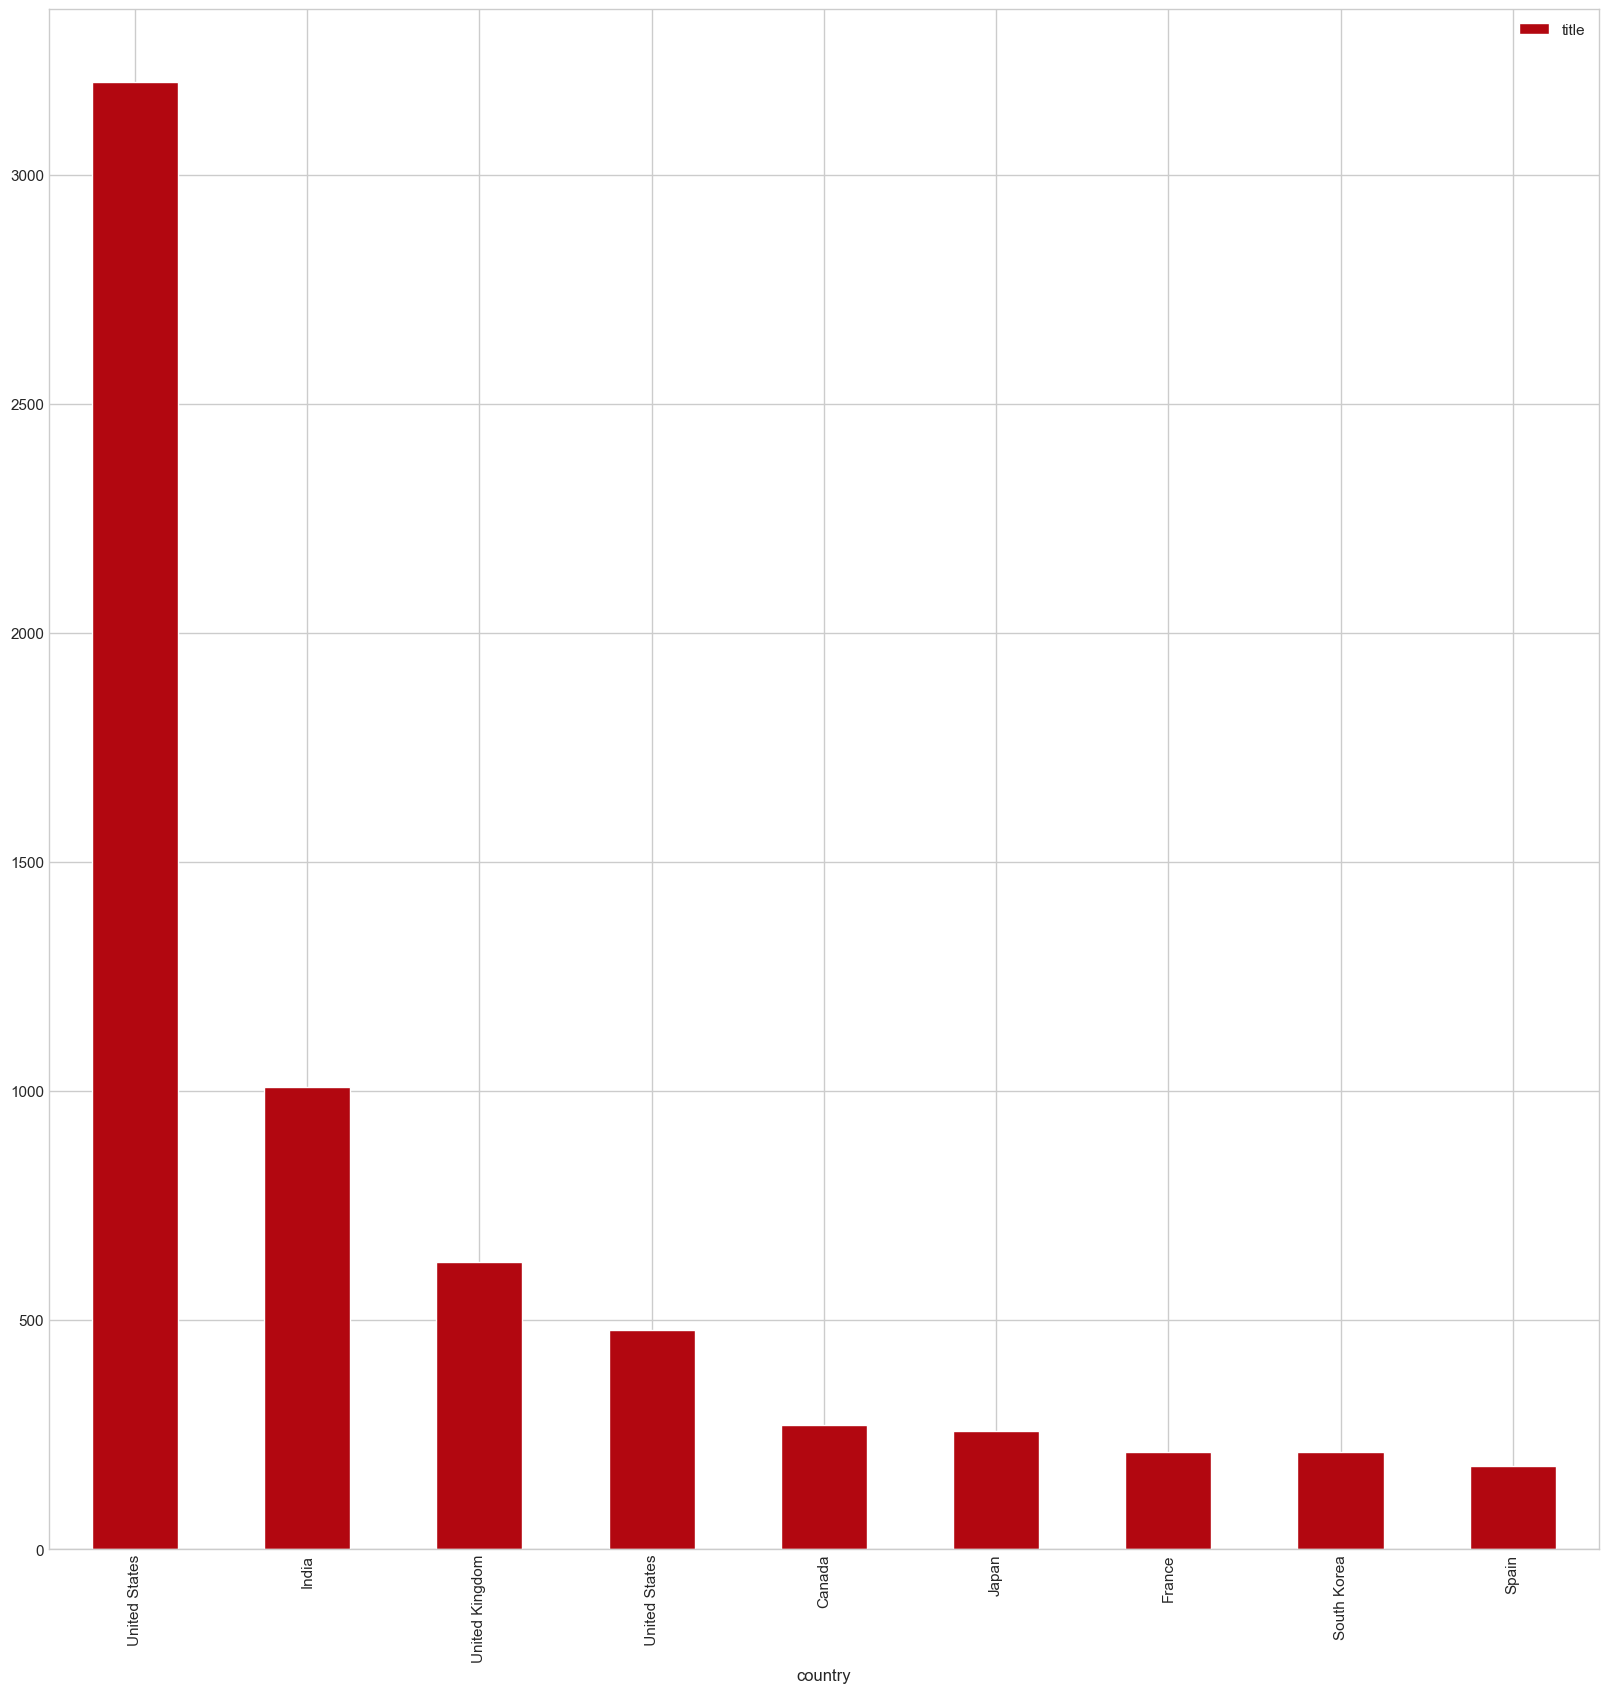

In [91]:
plt.figure(figsize=(5, 6))
country[:9].plot(kind='bar',x='country',y='title')
plt.show()

In [92]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   

                                                cast        country  \
0                                            Unknown  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                            Unknown        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0 2021-09-25          2020  PG-13     90 min   
1 2021-09-24          2021  TV-MA  2 Seasons   
2 2021-09-24          2021  TV-MA   1 Season   
3 2021-09-24          2021  TV-MA   1 Season   
4 2021-09-24          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  length min_or_season  \
0  As her father nears the end of his life, filmm...      90           min   
1  After crossing paths at a party, a Cape Town t...       2       Seasons   
2  To protect his family from a powerful drug lor...       1        Season   
3  Feuds, flirtations and toilet talk go down amo...       1        Season   
4  In a city of coaching centers known to train I...       2       Seasons   

   month_added month_name_added  year_added  week_added  difference  
0            9        September        2021          38           1  
1            9        September        2021          38           0  
2            9        September        2021          38           0  
3            9        September        2021          38           0  
4            9        September        2021          38           0

In [93]:
actor = unpivoted_df.groupby('cast')['show_id'].count()
# actor = cast.sort_values(by='title',ascending=False)
actor

cast
"Riley" Lakdhar Dridi    3
'Najite Dede             5
2 Chainz                 1
2Mex                     2
4Minute                  2
                        ..
Şevket Çoruh             2
Şinasi Yurtsever         9
Şükran Ovalı             2
Şükrü Özyıldız           5
Ṣọpẹ́ Dìrísù             2
Name: show_id, Length: 36404, dtype: int64

In [94]:
unpivoted_df

show_id     type                 title               director  \
0         s1    Movie  Dick Johnson Is Dead                Unknown   
1         s2  TV Show         Blood & Water             Ama Qamata   
1         s2  TV Show         Blood & Water             Ama Qamata   
1         s2  TV Show         Blood & Water             Ama Qamata   
1         s2  TV Show         Blood & Water            Khosi Ngema   
...      ...      ...                   ...                    ...   
8806   s8807    Movie                Zubaan         Anita Shabdish   
8806   s8807    Movie                Zubaan         Anita Shabdish   
8806   s8807    Movie                Zubaan  Chittaranjan Tripathy   
8806   s8807    Movie                Zubaan  Chittaranjan Tripathy   
8806   s8807    Movie                Zubaan  Chittaranjan Tripathy   

                       cast        country date_added  release_year rating  \
0                   Unknown  United States 2021-09-25          2020  PG-13   
1                Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
1                Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
1                Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
1               Khosi Ngema   South Africa 2021-09-24          2021  TV-MA   
...                     ...            ...        ...           ...    ...   
8806         Anita Shabdish          India 2019-03-02          2015  TV-14   
8806         Anita Shabdish          India 2019-03-02          2015  TV-14   
8806  Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   
8806  Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   
8806  Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   

       duration               listed_in  \
0        90 min           Documentaries   
1     2 Seasons  International TV Shows   
1     2 Seasons               TV Dramas   
1     2 Seasons            TV Mysteries   
1     2 Seasons  International TV Shows   
...         ...                     ...   
8806    111 min    International Movies   
8806    111 min        Music & Musicals   
8806    111 min                  Dramas   
8806    111 min    International Movies   
8806    111 min        Music & Musicals   

                                            description  length min_or_season  \
0     As her father nears the end of his life, filmm...      90           min   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
...                                                 ...     ...           ...   
8806  A scrappy but poor boy worms his way into a ty...     111           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   

      month_added month_name_added  year_added  week_added  difference  
0               9        September        2021          38           1  
1               9        September        2021          38           0  
1               9        September        2021          38           0  
1               9        September        2021          38           0  
1               9        September        2021          38           0  
...           ...              ...         ...         ...         ...  
8806            3            March        2019           9           4  
8806            3            March        2019           9           4  
8806            3            March        2019           9           4  
8806   

In [95]:
cast = unpivoted_df.groupby('cast')['show_id'].nunique().sort_values(ascending = False)
cast = pd.DataFrame(cast).reset_index()
cast

cast  show_id
0               Unknown      825
1           Anupam Kher       43
2        Shah Rukh Khan       35
3         Julie Tejwani       33
4      Takahiro Sakurai       32
...                 ...      ...
36399       Jamie Lever        1
36400         Jamie Lee        1
36401       Jamie Kenna        1
36402       Jamie Kaler        1
36403      Ṣọpẹ́ Dìrísù        1

[36404 rows x 2 columns]

<Axes: xlabel='show_id', ylabel='cast'>

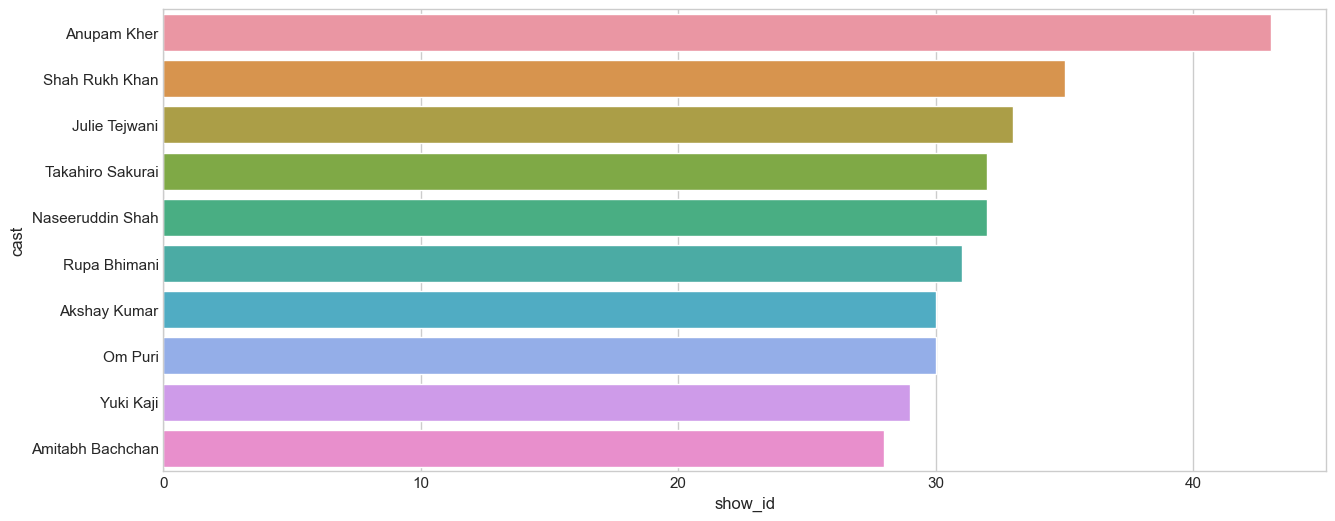

In [96]:
plt.figure(figsize=(15, 6))

sns.barplot(data = cast[1:11] ,x='show_id',y='cast')

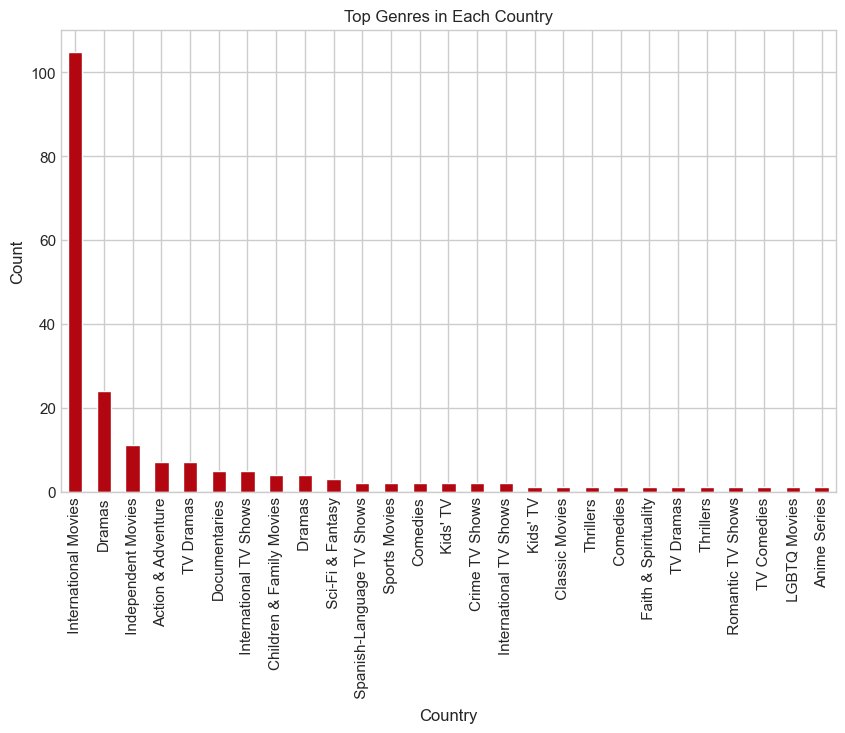

In [97]:
# Group the DataFrame by 'country' and count the occurrences of each genre
genre_counts = unpivoted_df.groupby('country')['listed_in'].value_counts().unstack().fillna(0)

# Get the top genre for each country
top_genres = genre_counts.idxmax(axis=1)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_genres.value_counts().plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top Genres in Each Country')
plt.xticks(rotation=90)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


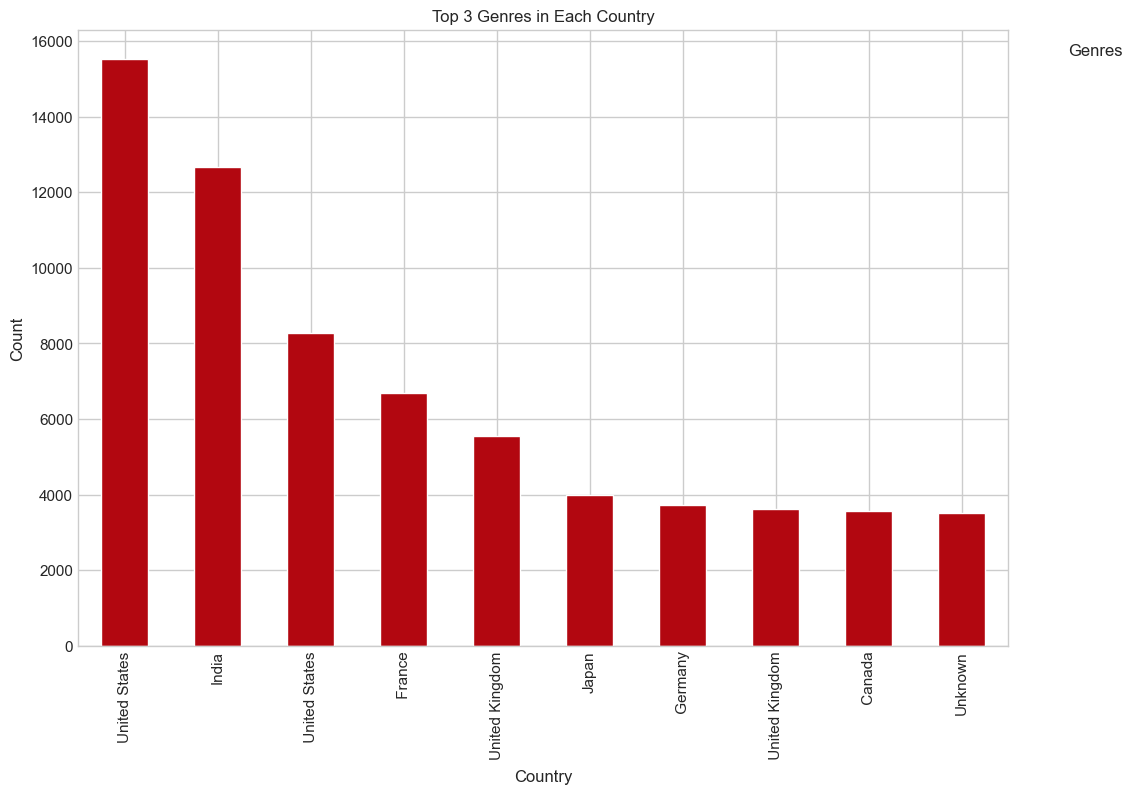

In [98]:
# Group the DataFrame by 'country' and 'listed_in' and count the occurrences
genre_counts = unpivoted_df.groupby(['country', 'listed_in']).size().reset_index(name='count')

# Sort by count in descending order
genre_counts = genre_counts.sort_values(by=['country', 'count'], ascending=[True, False])

# Get the top 3 genres for each country
top3_genres = genre_counts.groupby('country').head(3)

# Create a pivot table to prepare data for plotting
pivot_table = top3_genres.pivot(index='country', columns='listed_in', values='count')
pivot_table = pivot_table
pivot_table.fillna(0)

pivot_table = pivot_table.sum(axis=1)
pivot_table = pivot_table.sort_values(ascending=False)

# Select the top 10 rows (countries)
top_10_countries = pivot_table.head(10)

# Plot the bar chart
pivot_table[:10].plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 3 Genres in Each Country')
plt.xticks(rotation=90)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

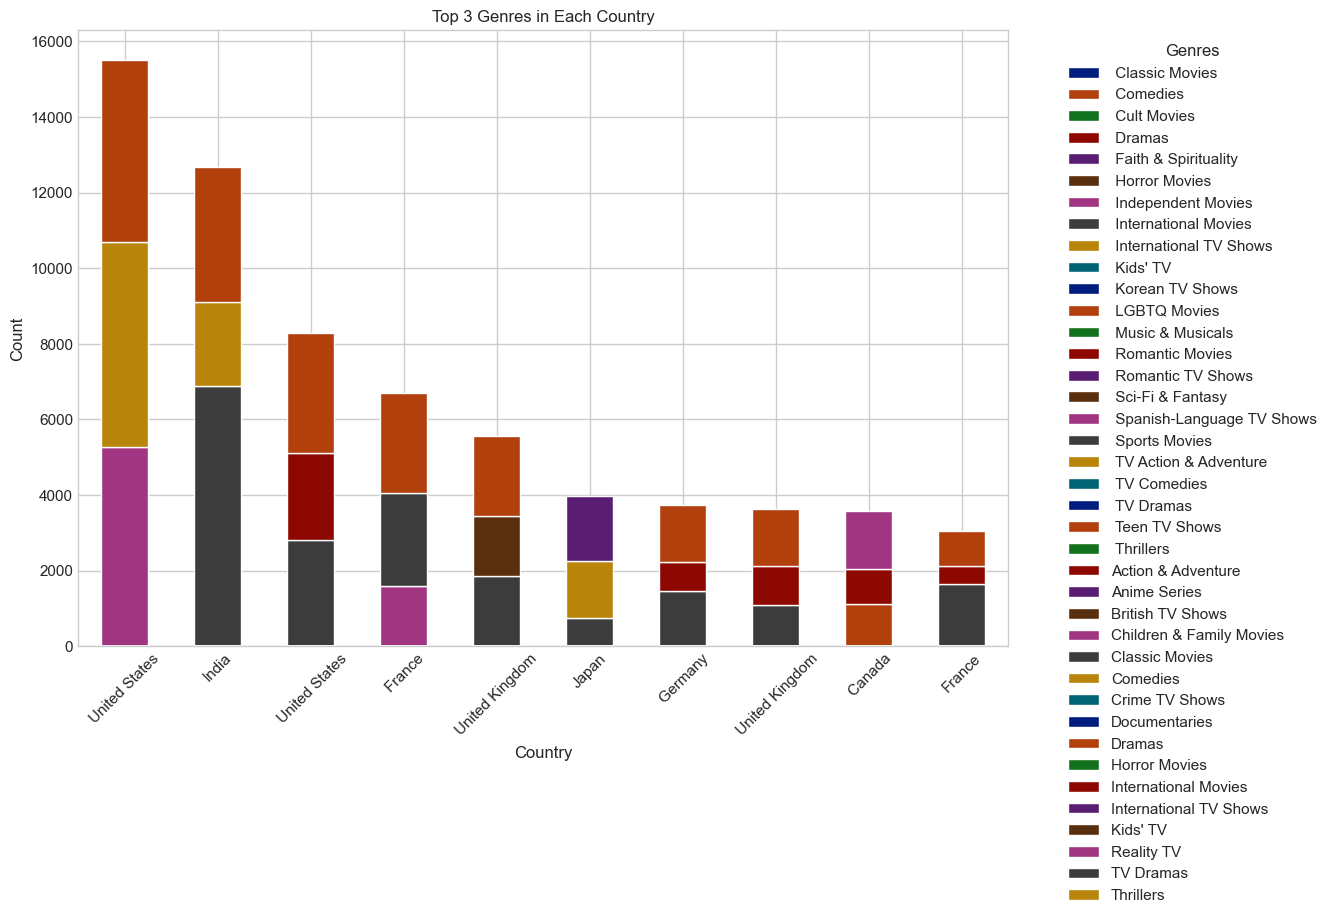

In [99]:
# Group the DataFrame by 'country' and 'listed_in' and count the occurrences
genre_counts = unpivoted_df.groupby(['country', 'listed_in']).size().reset_index(name='count')

# Sort by count in descending order
genre_counts = genre_counts.sort_values(by=['country', 'count'], ascending=[True, False])
genre_counts
# Get the top 3 genres for each country
top3_genres = genre_counts.groupby('country').head(3)
top3_genres
# Create a pivot table to prepare data for plotting
pivot_table = top3_genres.pivot(index='country', columns='listed_in', values='count')
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table = pivot_table.sort_values(by='Total',ascending =False)[:11]
pivot_table = pivot_table.drop(index='Unknown')
pivot_table = pivot_table.drop(columns=['Total'])

# Plot the bar chart
with sns.color_palette('dark'): 
    pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 3 Genres in Each Country')
plt.xticks(rotation=45)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

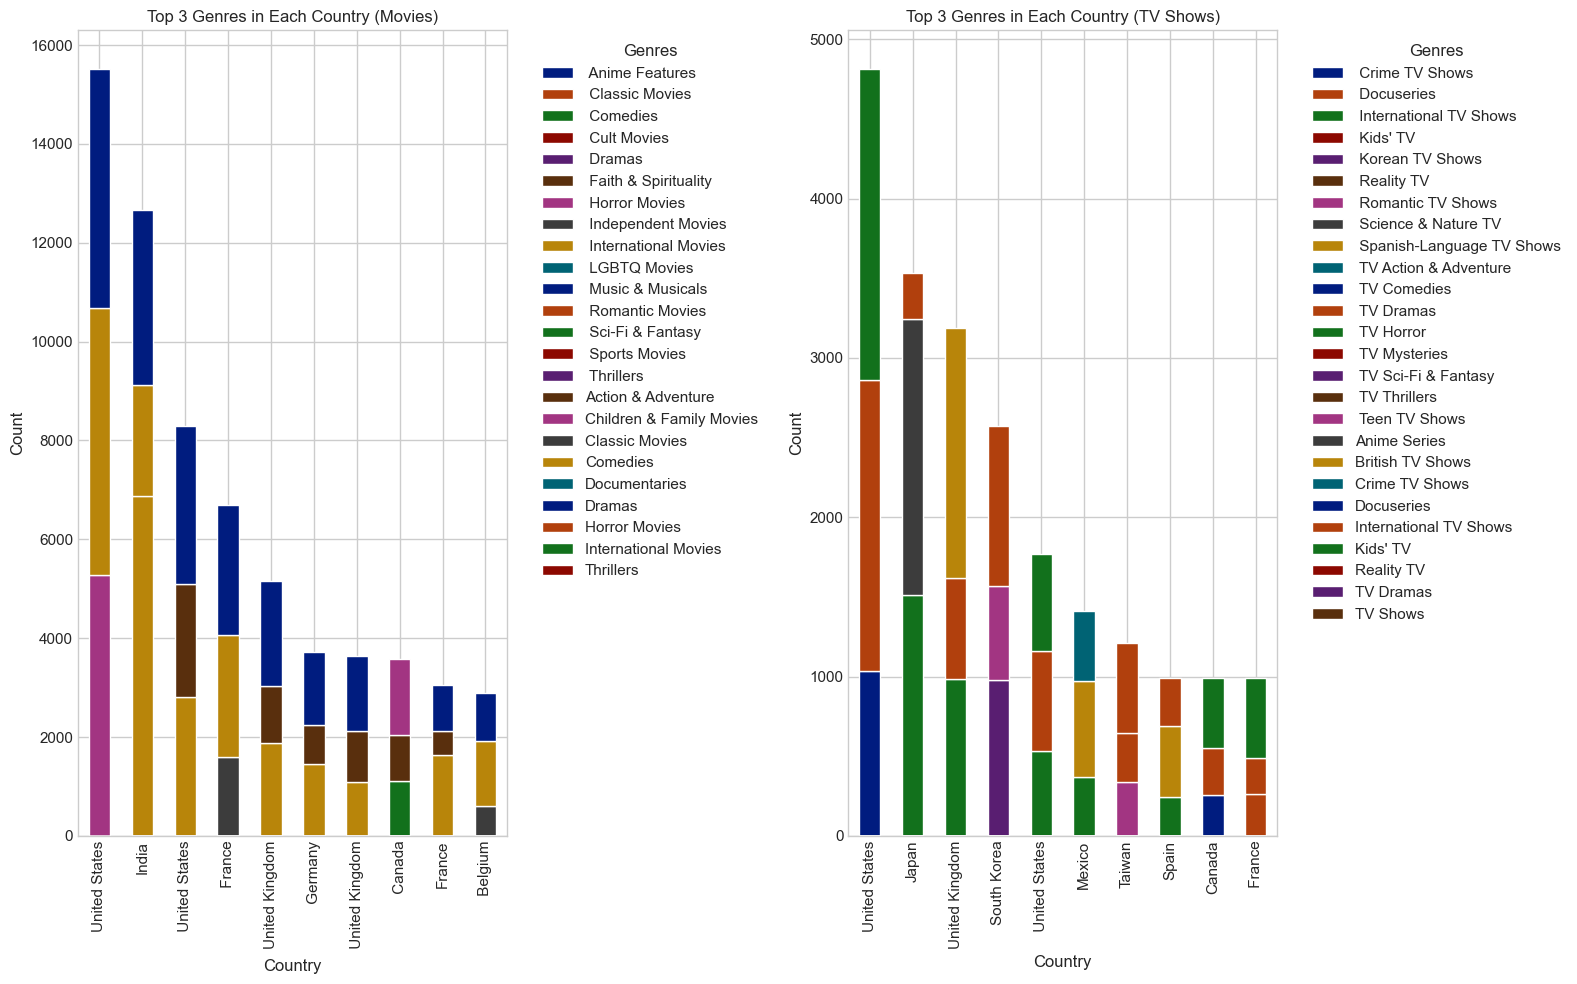

In [100]:
genre_counts = unpivoted_df.groupby(['country', 'listed_in', 'type']).size().reset_index(name='count')
genre_counts = genre_counts.sort_values(by=['country', 'count'], ascending=[True, False])

top3_genres_movies = genre_counts[genre_counts['type'] == 'Movie'].groupby('country').head(3)
top3_genres_tv_shows = genre_counts[genre_counts['type'] == 'TV Show'].groupby('country').head(3)

pivot_table_movies = top3_genres_movies.pivot(index='country', columns='listed_in', values='count').fillna(0)
pivot_table_tv_shows = top3_genres_tv_shows.pivot(index='country', columns='listed_in', values='count').fillna(0)

pivot_table_movies['Total'] = pivot_table_movies.sum(axis=1)
pivot_table_tv_shows['Total'] = pivot_table_tv_shows.sum(axis=1)

pivot_table_movies = pivot_table_movies.sort_values(by='Total', ascending=False)[:11]
pivot_table_tv_shows = pivot_table_tv_shows.sort_values(by='Total', ascending=False)[:11]

pivot_table_movies = pivot_table_movies.drop(index='Unknown')
pivot_table_tv_shows = pivot_table_tv_shows.drop(index='Unknown')

pivot_table_movies = pivot_table_movies.drop(columns=['Total'])
pivot_table_tv_shows = pivot_table_tv_shows.drop(columns=['Total'])

# Reset the index to make 'country' a regular column
pivot_table_movies.reset_index(inplace=True)
pivot_table_tv_shows.reset_index(inplace=True)

# Create subplots for movies and TV shows
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

# Plot the stacked bar chart for movies
ax1 = pivot_table_movies.plot(x='country', kind='bar', stacked=True, ax=axes[0], legend=False,color=sns.color_palette('dark'))
ax1.set_xlabel('Country')
ax1.set_ylabel('Count')
ax1.set_title('Top 3 Genres in Each Country (Movies)')

# Plot the stacked bar chart for TV shows
ax2 = pivot_table_tv_shows.plot(x='country', kind='bar', stacked=True, ax=axes[1], legend=False, color=sns.color_palette('dark'))
ax2.set_xlabel('Country')
ax2.set_ylabel('Count')
ax2.set_title('Top 3 Genres in Each Country (TV Shows)')
# Show the legend for both plots
ax1.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [101]:
unpivoted_df.to_csv('netflix_unpivotted.csv')

In [102]:
unpivoted_df

show_id     type                 title               director  \
0         s1    Movie  Dick Johnson Is Dead                Unknown   
1         s2  TV Show         Blood & Water             Ama Qamata   
1         s2  TV Show         Blood & Water             Ama Qamata   
1         s2  TV Show         Blood & Water             Ama Qamata   
1         s2  TV Show         Blood & Water            Khosi Ngema   
...      ...      ...                   ...                    ...   
8806   s8807    Movie                Zubaan         Anita Shabdish   
8806   s8807    Movie                Zubaan         Anita Shabdish   
8806   s8807    Movie                Zubaan  Chittaranjan Tripathy   
8806   s8807    Movie                Zubaan  Chittaranjan Tripathy   
8806   s8807    Movie                Zubaan  Chittaranjan Tripathy   

                       cast        country date_added  release_year rating  \
0                   Unknown  United States 2021-09-25          2020  PG-13   
1                Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
1                Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
1                Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
1               Khosi Ngema   South Africa 2021-09-24          2021  TV-MA   
...                     ...            ...        ...           ...    ...   
8806         Anita Shabdish          India 2019-03-02          2015  TV-14   
8806         Anita Shabdish          India 2019-03-02          2015  TV-14   
8806  Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   
8806  Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   
8806  Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   

       duration               listed_in  \
0        90 min           Documentaries   
1     2 Seasons  International TV Shows   
1     2 Seasons               TV Dramas   
1     2 Seasons            TV Mysteries   
1     2 Seasons  International TV Shows   
...         ...                     ...   
8806    111 min    International Movies   
8806    111 min        Music & Musicals   
8806    111 min                  Dramas   
8806    111 min    International Movies   
8806    111 min        Music & Musicals   

                                            description  length min_or_season  \
0     As her father nears the end of his life, filmm...      90           min   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
...                                                 ...     ...           ...   
8806  A scrappy but poor boy worms his way into a ty...     111           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   

      month_added month_name_added  year_added  week_added  difference  
0               9        September        2021          38           1  
1               9        September        2021          38           0  
1               9        September        2021          38           0  
1               9        September        2021          38           0  
1               9        September        2021          38           0  
...           ...              ...         ...         ...         ...  
8806            3            March        2019           9           4  
8806            3            March        2019           9           4  
8806            3            March        2019           9           4  
8806   

In [103]:
netflix_movies=df[df['type']=='Movie']
netflix_movies

show_id   type                             title  \
0         s1  Movie              Dick Johnson Is Dead   
6         s7  Movie  My Little Pony: A New Generation   
7         s8  Movie                           Sankofa   
9        s10  Movie                      The Starling   
12       s13  Movie                      Je Suis Karl   
...      ...    ...                               ...   
8801   s8802  Movie                           Zinzana   
8802   s8803  Movie                            Zodiac   
8804   s8805  Movie                        Zombieland   
8805   s8806  Movie                              Zoom   
8806   s8807  Movie                            Zubaan   

                           director  \
0                   Kirsten Johnson   
6     Robert Cullen, José Luis Ucha   
7                      Haile Gerima   
9                    Theodore Melfi   
12              Christian Schwochow   
...                             ...   
8801                Majid Al Ansari   
8802                  David Fincher   
8804                Ruben Fleischer   
8805                   Peter Hewitt   
8806                    Mozez Singh   

                                                   cast  \
0                                               Unknown   
6     Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
9     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12    Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
...                                                 ...   
8801  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   

                                                country date_added  \
0                                         United States 2021-09-25   
6                                               Unknown 2021-09-24   
7     United States, Ghana, Burkina Faso, United Kin... 2021-09-24   
9                                         United States 2021-09-24   
12                              Germany, Czech Republic 2021-09-23   
...                                                 ...        ...   
8801                       United Arab Emirates, Jordan 2016-03-09   
8802                                      United States 2019-11-20   
8804                                      United States 2019-11-01   
8805                                      United States 2020-01-11   
8806                                              India 2019-03-02   

      release_year rating duration  \
0             2020  PG-13   90 min   
6             2021     PG   91 min   
7             1993  TV-MA  125 min   
9             2021  PG-13  104 min   
12            2021  TV-MA  127 min   
...            ...    ...      ...   
8801          2015  TV-MA   96 min   
8802          2007      R  158 min   
8804          2009      R   88 min   
8805          2006     PG   88 min   
8806          2015  TV-14  111 min   

                                             listed_in  \
0                                        Documentaries   
6                             Children & Family Movies   
7     Dramas, Independent Movies, International Movies   
9                                     Comedies, Dramas   
12                        Dramas, International Movies   
...                                                ...   
8801           Dramas, International Movies, Thrillers   
8802                    Cult Movies, Dramas, Thrillers   
8804                           Comedies, Horror Movies   
8805                Children & Family Movies, Comedies   
8806    Dramas, International Movies, Music & Musicals   

                                            description  length min_or_season  \
0     As her father nears the end of his life, filmm...      90   

In [104]:
netflix_shows=df[df['type']=='TV Show']
netflix_shows

show_id     type                  title         director  \
1         s2  TV Show          Blood & Water          Unknown   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans          Unknown   
4         s5  TV Show           Kota Factory          Unknown   
5         s6  TV Show          Midnight Mass    Mike Flanagan   
...      ...      ...                    ...              ...   
8795   s8796  TV Show        Yu-Gi-Oh! Arc-V          Unknown   
8796   s8797  TV Show             Yunus Emre          Unknown   
8797   s8798  TV Show              Zak Storm          Unknown   
8800   s8801  TV Show     Zindagi Gulzar Hai          Unknown   
8803   s8804  TV Show            Zombie Dumb          Unknown   

                                                   cast  \
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
3                                               Unknown   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...   
5     Kate Siegel, Zach Gilford, Hamish Linklater, H...   
...                                                 ...   
8795  Mike Liscio, Emily Bauer, Billy Bob Thompson, ...   
8796  Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...   
8797  Michael Johnston, Jessica Gee-George, Christin...   
8800  Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...   
8803                                            Unknown   

                                            country date_added  release_year  \
1                                      South Africa 2021-09-24          2021   
2                                           Unknown 2021-09-24          2021   
3                                           Unknown 2021-09-24          2021   
4                                             India 2021-09-24          2021   
5                                           Unknown 2021-09-24          2021   
...                                             ...        ...           ...   
8795                                  Japan, Canada 2018-05-01          2015   
8796                                         Turkey 2017-01-17          2016   
8797  United States, France, South Korea, Indonesia 2018-09-13          2016   
8800                                       Pakistan 2016-12-15          2012   
8803                                        Unknown 2019-07-01          2018   

     rating   duration                                          listed_in  \
1     TV-MA  2 Seasons    International TV Shows, TV Dramas, TV Mysteries   
2     TV-MA   1 Season  Crime TV Shows, International TV Shows, TV Act...   
3     TV-MA   1 Season                             Docuseries, Reality TV   
4     TV-MA  2 Seasons  International TV Shows, Romantic TV Shows, TV ...   
5     TV-MA   1 Season                 TV Dramas, TV Horror, TV Mysteries   
...     ...        ...                                                ...   
8795  TV-Y7  2 Seasons                             Anime Series, Kids' TV   
8796  TV-PG  2 Seasons                  International TV Shows, TV Dramas   
8797  TV-Y7  3 Seasons                                           Kids' TV   
8800  TV-PG   1 Season  International TV Shows, Romantic TV Shows, TV ...   
8803  TV-Y7  2 Seasons             Kids' TV, Korean TV Shows, TV Comedies   

                                            description  length min_or_season  \
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
2     To protect his family from a powerful drug lor...       1        Season   
3     Feuds, flirtations and toilet talk go down amo...       1        Season   
4     In a city of coaching centers known to train I...       2       Seasons   
5     The arrival of a charismatic young priest brin...       1        Season   
...                                                 ...     ...           ...   
8795  Now that he's discovered the Pendulum Summonin...       

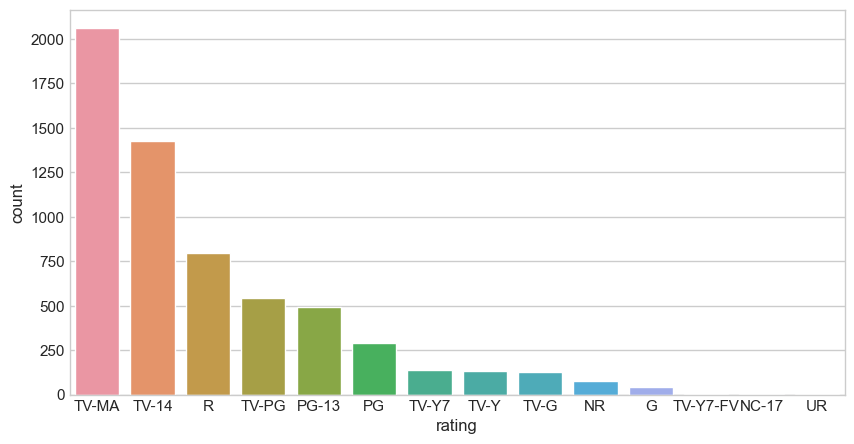

In [105]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="rating", data=netflix_movies, order=netflix_movies['rating'].value_counts().index[0:15])

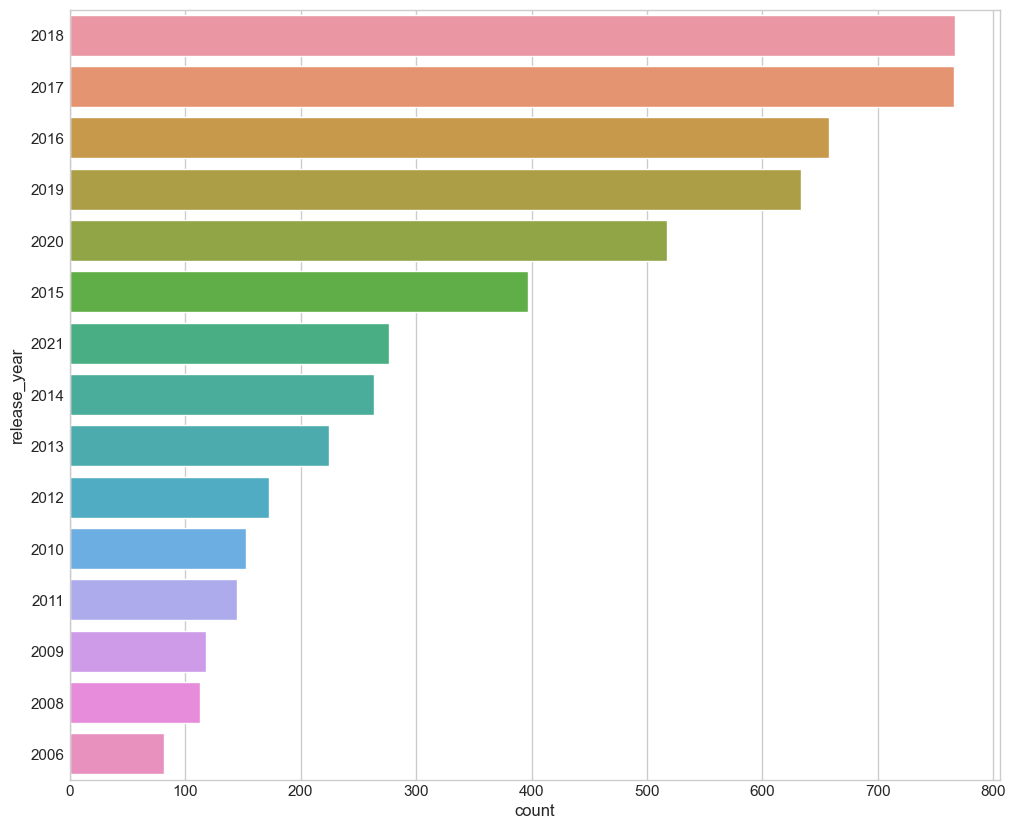

In [106]:
plt.figure(figsize=(12,10))
ax = sns.countplot(y="release_year", data=netflix_movies, order=netflix_movies['release_year'].value_counts().index[0:15])

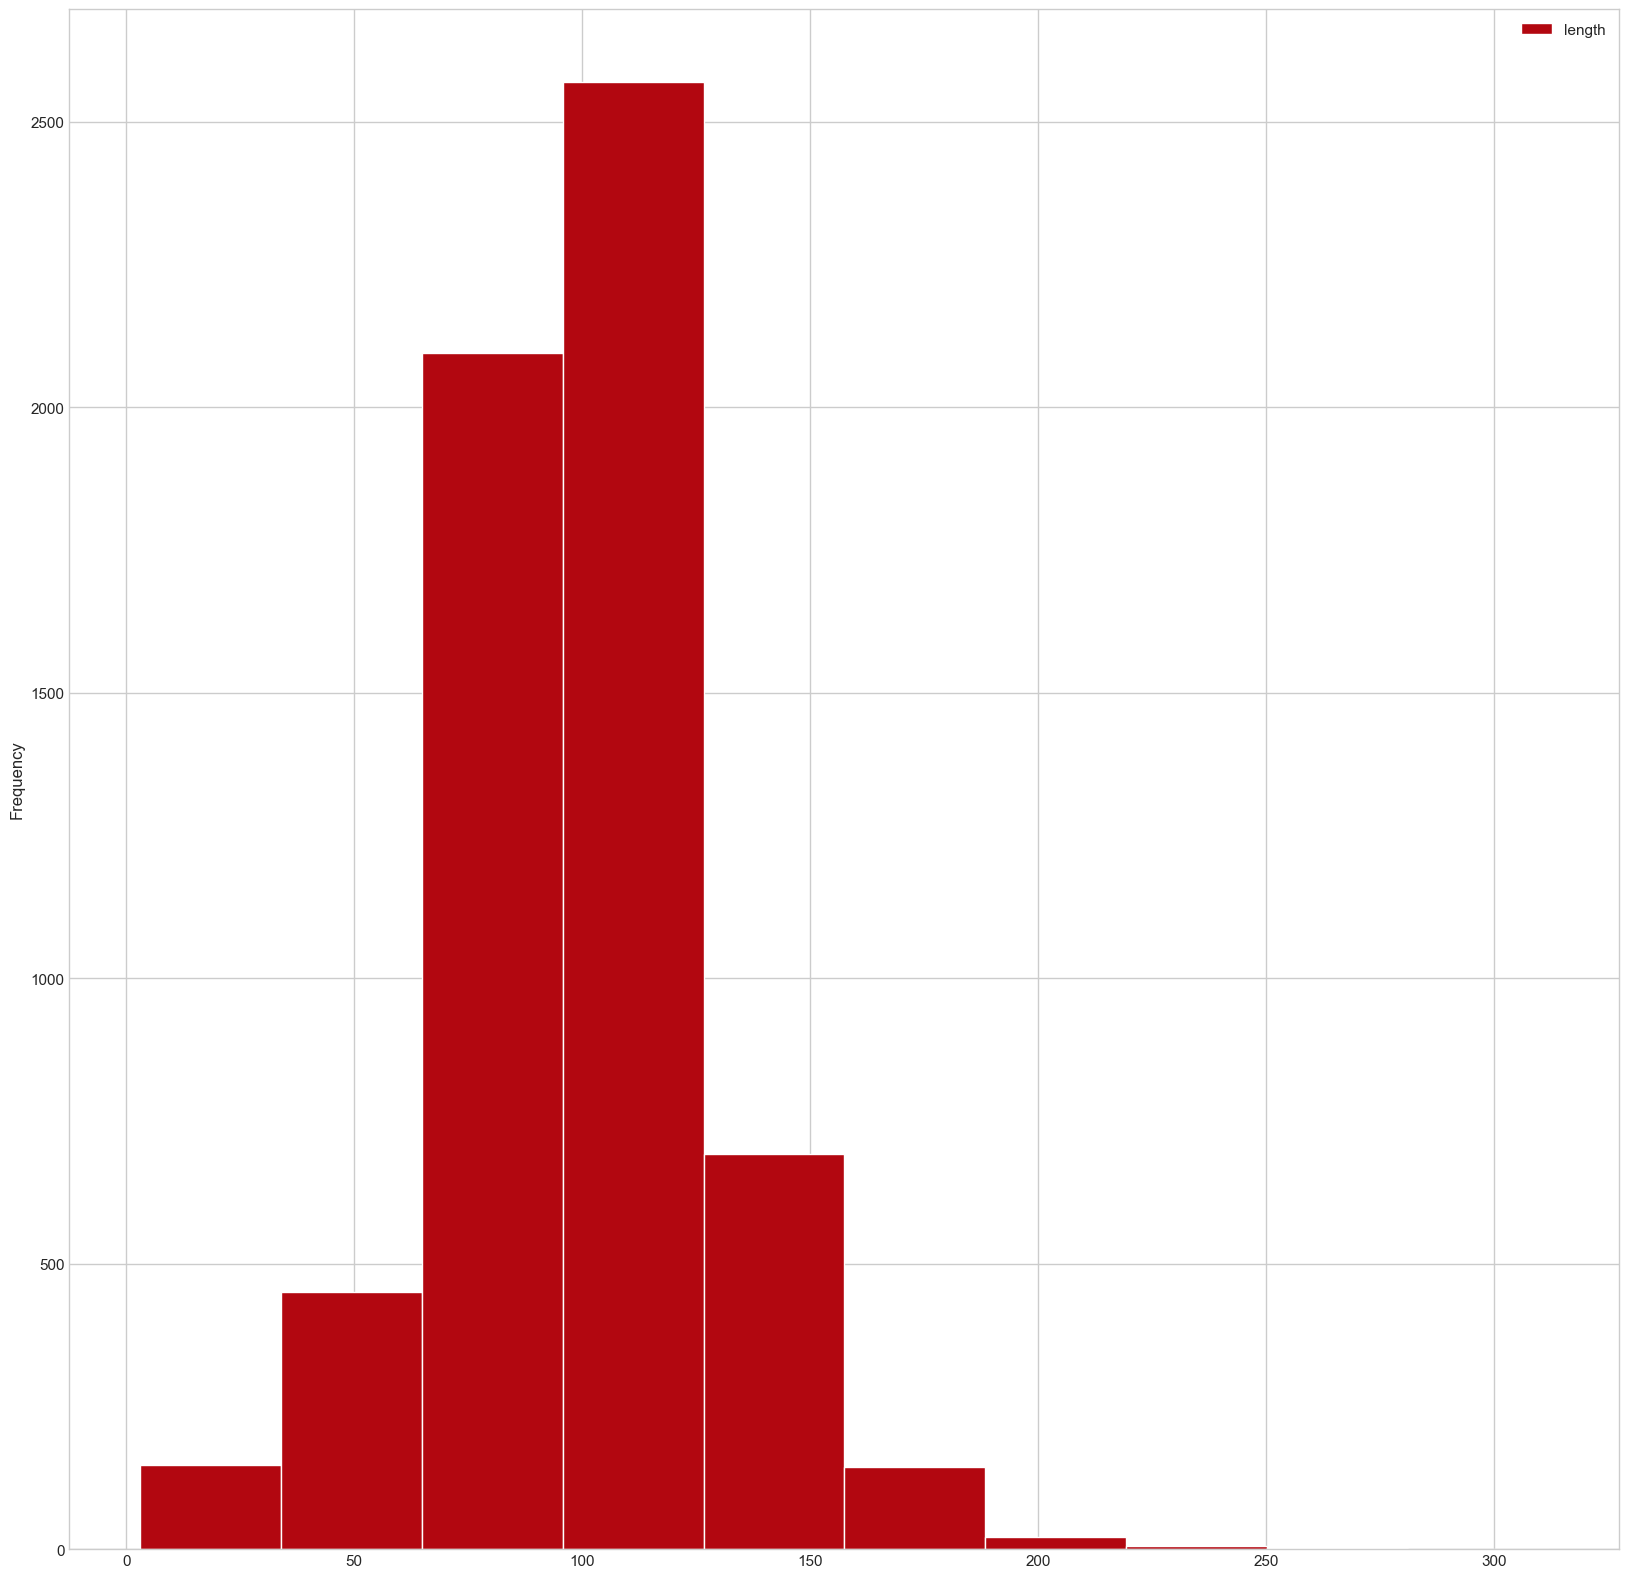

In [107]:
netflix_movies.sort_values(by='length')
netflix_movies.plot(kind='hist', y='length')
plt.show()

<Figure size 500x600 with 0 Axes>

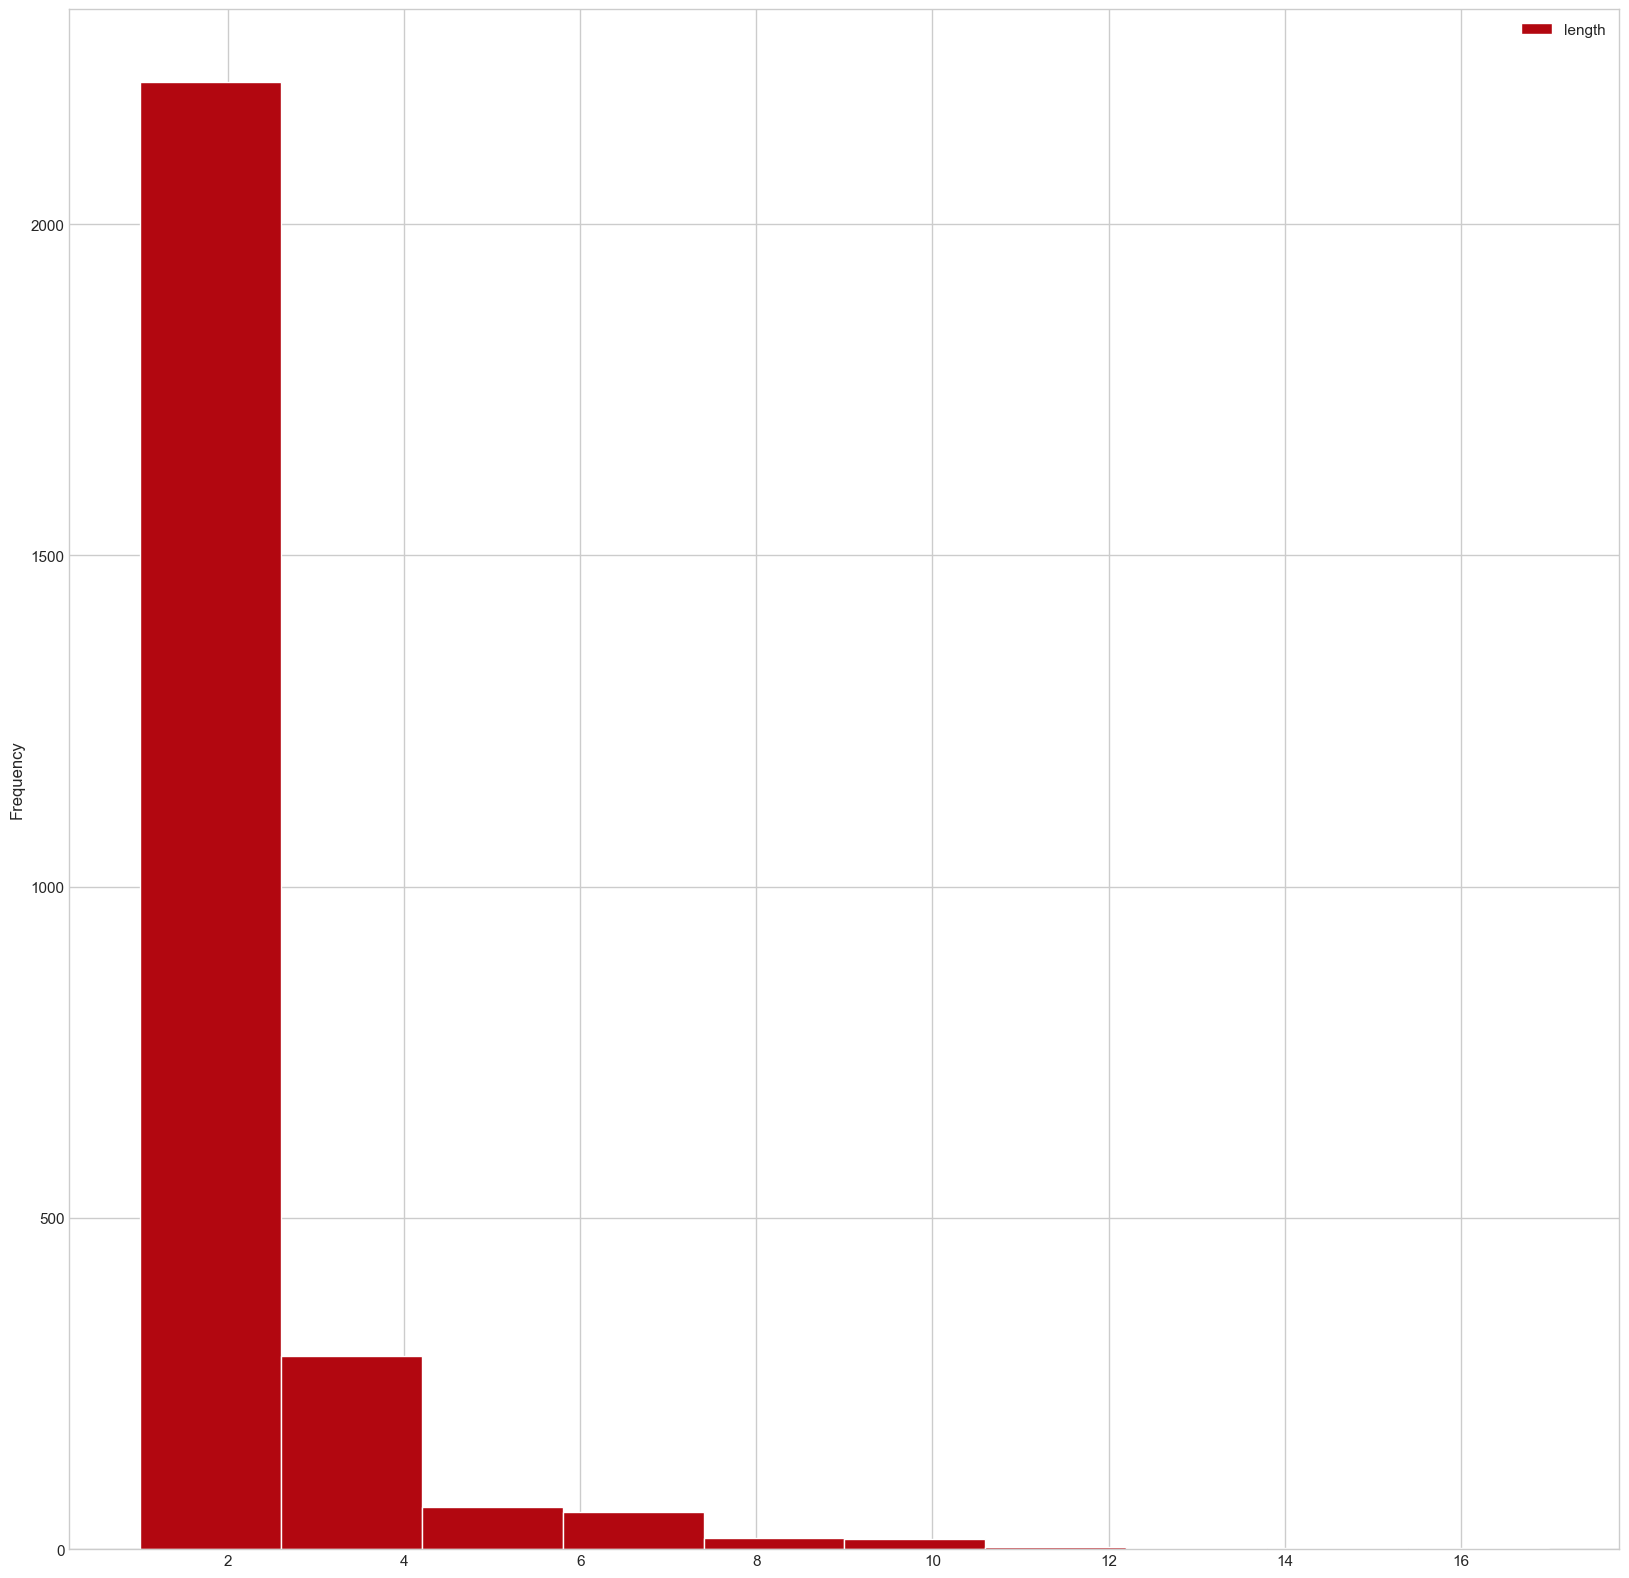

In [108]:
netflix_shows.sort_values(by='length')
plt.figure(figsize=(5, 6))
netflix_shows.plot(kind='hist', y='length')
plt.show()

In [109]:
netflix_shows.head()

show_id     type                  title         director  \
1      s2  TV Show          Blood & Water          Unknown   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          Unknown   
4      s5  TV Show           Kota Factory          Unknown   
5      s6  TV Show          Midnight Mass    Mike Flanagan   

                                                cast       country date_added  \
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...  South Africa 2021-09-24   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...       Unknown 2021-09-24   
3                                            Unknown       Unknown 2021-09-24   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...         India 2021-09-24   
5  Kate Siegel, Zach Gilford, Hamish Linklater, H...       Unknown 2021-09-24   

   release_year rating   duration  \
1          2021  TV-MA  2 Seasons   
2          2021  TV-MA   1 Season   
3          2021  TV-MA   1 Season   
4          2021  TV-MA  2 Seasons   
5          2021  TV-MA   1 Season   

                                           listed_in  \
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   
5                 TV Dramas, TV Horror, TV Mysteries   

                                         description  length min_or_season  \
1  After crossing paths at a party, a Cape Town t...       2       Seasons   
2  To protect his family from a powerful drug lor...       1        Season   
3  Feuds, flirtations and toilet talk go down amo...       1        Season   
4  In a city of coaching centers known to train I...       2       Seasons   
5  The arrival of a charismatic young priest brin...       1        Season   

   month_added month_name_added  year_added  week_added  difference  
1            9        September        2021          38           0  
2            9        September        2021          38           0  
3            9        September        2021          38           0  
4            9        September        2021          38           0  
5            9        September        2021          38           0

In [110]:
netflix_movies.head()

show_id   type                             title  \
0       s1  Movie              Dick Johnson Is Dead   
6       s7  Movie  My Little Pony: A New Generation   
7       s8  Movie                           Sankofa   
9      s10  Movie                      The Starling   
12     s13  Movie                      Je Suis Karl   

                         director  \
0                 Kirsten Johnson   
6   Robert Cullen, José Luis Ucha   
7                    Haile Gerima   
9                  Theodore Melfi   
12            Christian Schwochow   

                                                 cast  \
0                                             Unknown   
6   Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
9   Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12  Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   

                                              country date_added  \
0                                       United States 2021-09-25   
6                                             Unknown 2021-09-24   
7   United States, Ghana, Burkina Faso, United Kin... 2021-09-24   
9                                       United States 2021-09-24   
12                            Germany, Czech Republic 2021-09-23   

    release_year rating duration  \
0           2020  PG-13   90 min   
6           2021     PG   91 min   
7           1993  TV-MA  125 min   
9           2021  PG-13  104 min   
12          2021  TV-MA  127 min   

                                           listed_in  \
0                                      Documentaries   
6                           Children & Family Movies   
7   Dramas, Independent Movies, International Movies   
9                                   Comedies, Dramas   
12                      Dramas, International Movies   

                                          description  length min_or_season  \
0   As her father nears the end of his life, filmm...      90           min   
6   Equestria's divided. But a bright-eyed hero be...      91           min   
7   On a photo shoot in Ghana, an American model s...     125           min   
9   A woman adjusting to life after a loss contend...     104           min   
12  After most of her family is murdered in a terr...     127           min   

    month_added month_name_added  year_added  week_added  difference  
0             9        September        2021          38           1  
6             9        September        2021          38           0  
7             9        September        2021          38          28  
9             9        September        2021          38           0  
12            9        September        2021          38           0

<Axes: xlabel='length', ylabel='Density'>

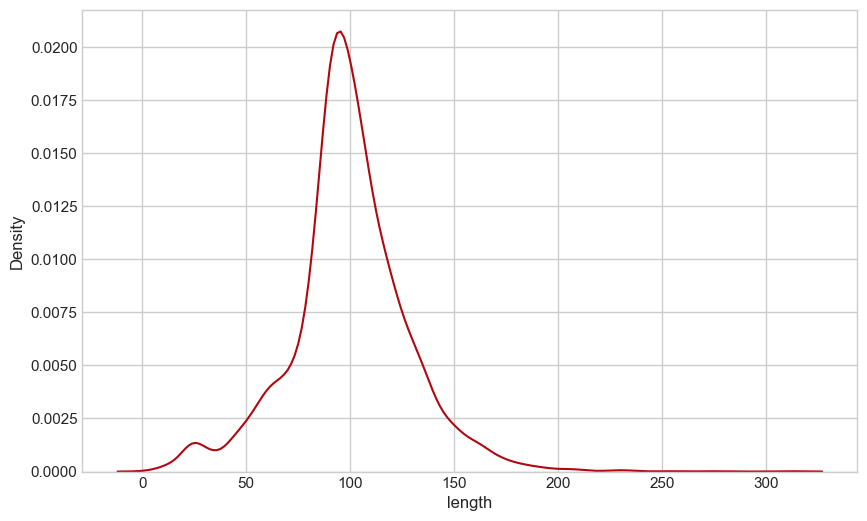

In [111]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=netflix_movies['length'])

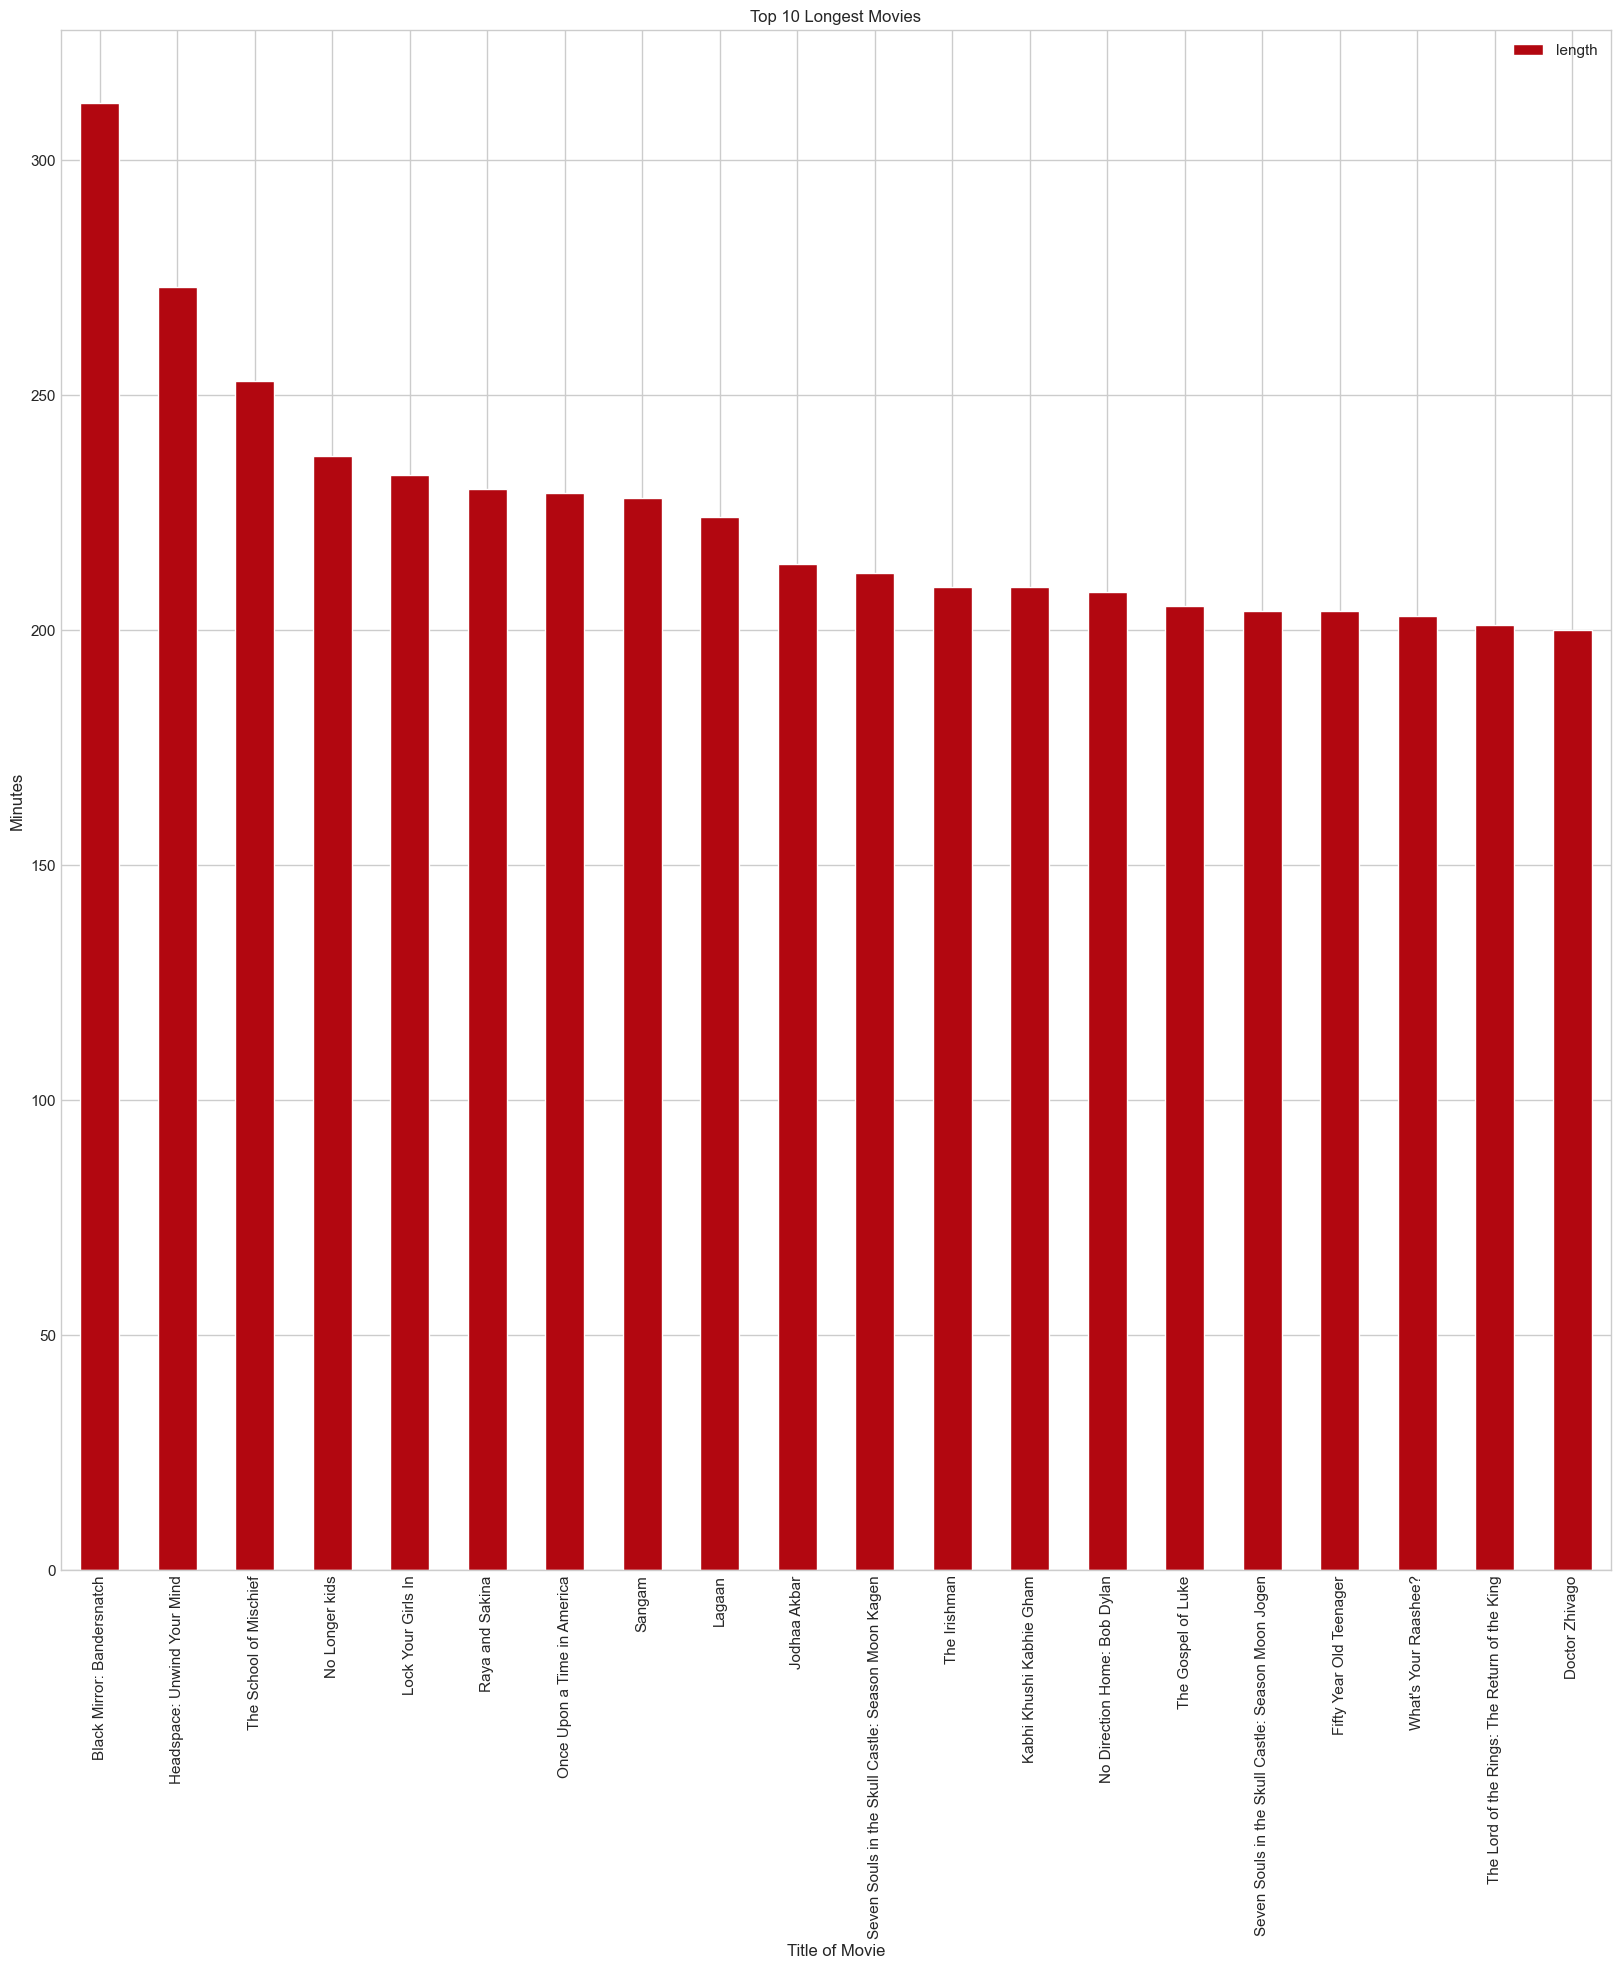

In [112]:
top20=netflix_movies[['title','length']].sort_values(by = 'length', ascending=False)[0:20].reset_index()
top20.plot(kind='bar',x='title',y='length')
plt.title('Top 10 Longest Movies')
plt.xlabel('Title of Movie')
plt.ylabel('Minutes')
plt.show()

<Figure size 100x100 with 0 Axes>

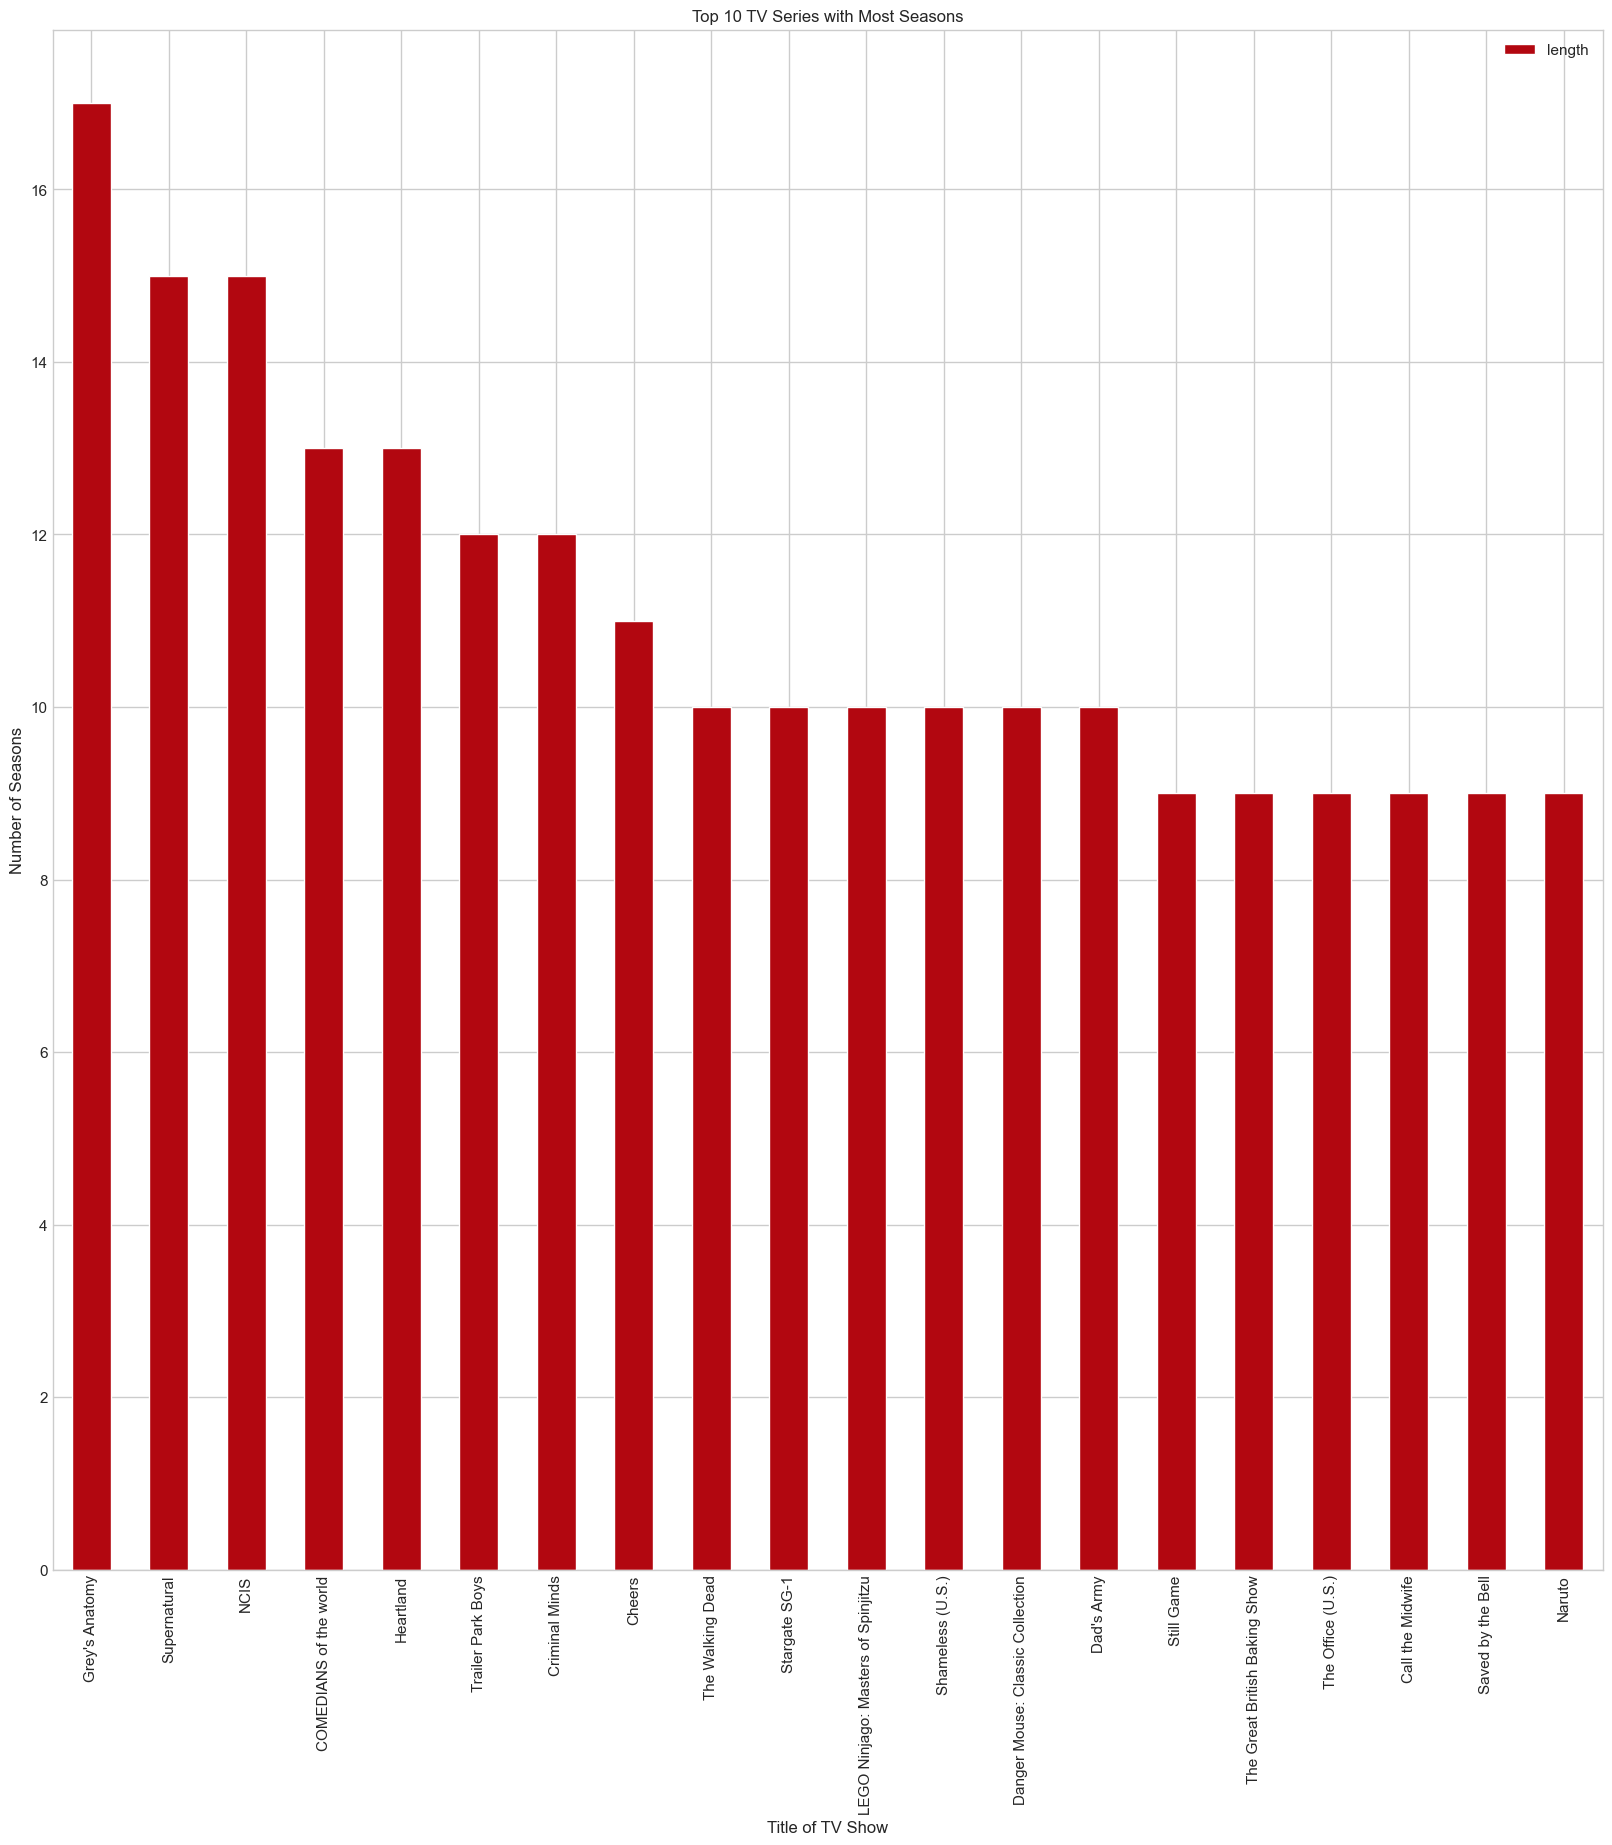

In [113]:
plt.figure(figsize=(1, 1)) 

top20=netflix_shows[['title','length']].sort_values(by = 'length', ascending=False)[0:20].reset_index()
top20.plot(kind='bar',x='title',y='length')
plt.title('Top 10 TV Series with Most Seasons')
plt.xlabel('Title of TV Show')
plt.ylabel('Number of Seasons')
plt.show()

/Users/gautham/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



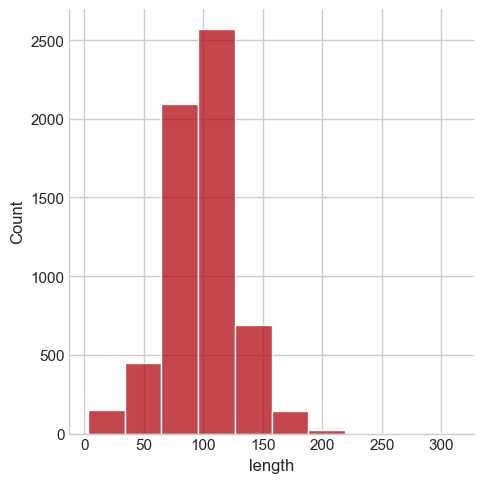

In [114]:
sns.displot(netflix_movies['length'],bins=10)

/Users/gautham/Anaconda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



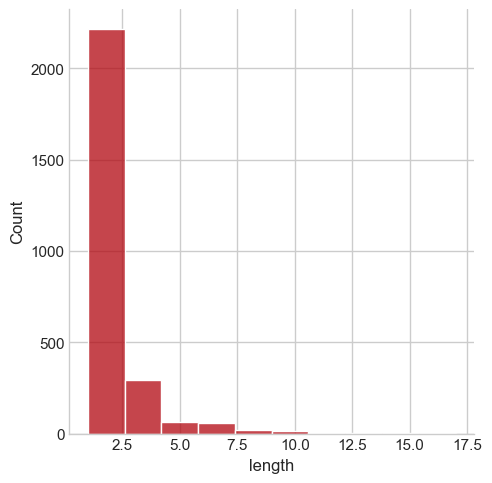

In [115]:
sns.displot(netflix_shows['length'],bins=10)

In [116]:
netflix_movies

show_id   type                             title  \
0         s1  Movie              Dick Johnson Is Dead   
6         s7  Movie  My Little Pony: A New Generation   
7         s8  Movie                           Sankofa   
9        s10  Movie                      The Starling   
12       s13  Movie                      Je Suis Karl   
...      ...    ...                               ...   
8801   s8802  Movie                           Zinzana   
8802   s8803  Movie                            Zodiac   
8804   s8805  Movie                        Zombieland   
8805   s8806  Movie                              Zoom   
8806   s8807  Movie                            Zubaan   

                           director  \
0                   Kirsten Johnson   
6     Robert Cullen, José Luis Ucha   
7                      Haile Gerima   
9                    Theodore Melfi   
12              Christian Schwochow   
...                             ...   
8801                Majid Al Ansari   
8802                  David Fincher   
8804                Ruben Fleischer   
8805                   Peter Hewitt   
8806                    Mozez Singh   

                                                   cast  \
0                                               Unknown   
6     Vanessa Hudgens, Kimiko Glenn, James Marsden, ...   
7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
9     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12    Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
...                                                 ...   
8801  Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   

                                                country date_added  \
0                                         United States 2021-09-25   
6                                               Unknown 2021-09-24   
7     United States, Ghana, Burkina Faso, United Kin... 2021-09-24   
9                                         United States 2021-09-24   
12                              Germany, Czech Republic 2021-09-23   
...                                                 ...        ...   
8801                       United Arab Emirates, Jordan 2016-03-09   
8802                                      United States 2019-11-20   
8804                                      United States 2019-11-01   
8805                                      United States 2020-01-11   
8806                                              India 2019-03-02   

      release_year rating duration  \
0             2020  PG-13   90 min   
6             2021     PG   91 min   
7             1993  TV-MA  125 min   
9             2021  PG-13  104 min   
12            2021  TV-MA  127 min   
...            ...    ...      ...   
8801          2015  TV-MA   96 min   
8802          2007      R  158 min   
8804          2009      R   88 min   
8805          2006     PG   88 min   
8806          2015  TV-14  111 min   

                                             listed_in  \
0                                        Documentaries   
6                             Children & Family Movies   
7     Dramas, Independent Movies, International Movies   
9                                     Comedies, Dramas   
12                        Dramas, International Movies   
...                                                ...   
8801           Dramas, International Movies, Thrillers   
8802                    Cult Movies, Dramas, Thrillers   
8804                           Comedies, Horror Movies   
8805                Children & Family Movies, Comedies   
8806    Dramas, International Movies, Music & Musicals   

                                            description  length min_or_season  \
0     As her father nears the end of his life, filmm...      90   

In [117]:
netflix_movies.groupby(['month_added'])['title'].nunique()

month_added
1     546
2     382
3     529
4     549
5     439
6     492
7     565
8     518
9     518
10    545
11    498
12    547
Name: title, dtype: int64

<h2> 3. What is the best time to launch a TV show?
a. Find which is the best week to release the Tv-show or the movie. Do the analysis
separately for Tv-shows and Movies
Hint : We expect you to create a new column and group by each week and count
the total number of movies/ tv shows.
b. Find which is the best month to release the Tv-show or the movie. Do the
analysis separately for Tv-shows and Movies

Hint : We expect you to create a new column and group by each month and
count the total number of movies/ tv shows.

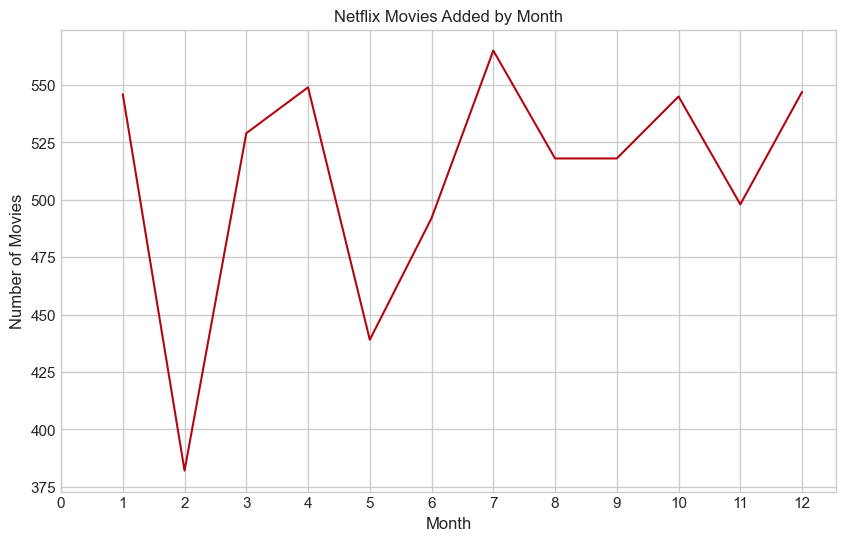

In [118]:
plt.figure(figsize=(10, 6)) 
netflix_movies.groupby(['month_added'])['title'].nunique().plot()
plt.xticks(range(13))
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.title('Netflix Movies Added by Month')
plt.show()

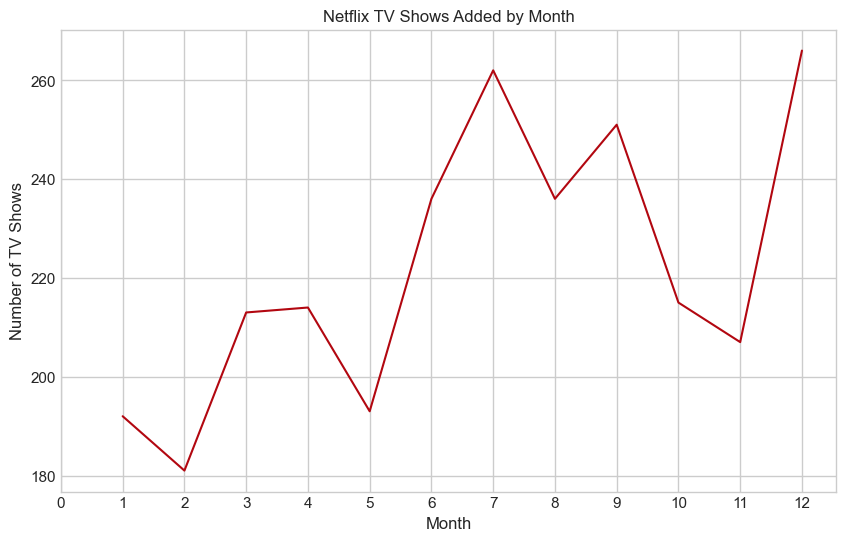

In [119]:
plt.figure(figsize=(10, 6)) 
netflix_shows.groupby(['month_added'])['title'].nunique().plot()
plt.xticks(range(13))
plt.xlabel('Month')
plt.ylabel('Number of TV Shows')
plt.title('Netflix TV Shows Added by Month')
plt.show()

In [120]:
unpivoted_df

show_id     type                 title               director  \
0         s1    Movie  Dick Johnson Is Dead                Unknown   
1         s2  TV Show         Blood & Water             Ama Qamata   
1         s2  TV Show         Blood & Water             Ama Qamata   
1         s2  TV Show         Blood & Water             Ama Qamata   
1         s2  TV Show         Blood & Water            Khosi Ngema   
...      ...      ...                   ...                    ...   
8806   s8807    Movie                Zubaan         Anita Shabdish   
8806   s8807    Movie                Zubaan         Anita Shabdish   
8806   s8807    Movie                Zubaan  Chittaranjan Tripathy   
8806   s8807    Movie                Zubaan  Chittaranjan Tripathy   
8806   s8807    Movie                Zubaan  Chittaranjan Tripathy   

                       cast        country date_added  release_year rating  \
0                   Unknown  United States 2021-09-25          2020  PG-13   
1                Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
1                Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
1                Ama Qamata   South Africa 2021-09-24          2021  TV-MA   
1               Khosi Ngema   South Africa 2021-09-24          2021  TV-MA   
...                     ...            ...        ...           ...    ...   
8806         Anita Shabdish          India 2019-03-02          2015  TV-14   
8806         Anita Shabdish          India 2019-03-02          2015  TV-14   
8806  Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   
8806  Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   
8806  Chittaranjan Tripathy          India 2019-03-02          2015  TV-14   

       duration               listed_in  \
0        90 min           Documentaries   
1     2 Seasons  International TV Shows   
1     2 Seasons               TV Dramas   
1     2 Seasons            TV Mysteries   
1     2 Seasons  International TV Shows   
...         ...                     ...   
8806    111 min    International Movies   
8806    111 min        Music & Musicals   
8806    111 min                  Dramas   
8806    111 min    International Movies   
8806    111 min        Music & Musicals   

                                            description  length min_or_season  \
0     As her father nears the end of his life, filmm...      90           min   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
1     After crossing paths at a party, a Cape Town t...       2       Seasons   
...                                                 ...     ...           ...   
8806  A scrappy but poor boy worms his way into a ty...     111           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   
8806  A scrappy but poor boy worms his way into a ty...     111           min   

      month_added month_name_added  year_added  week_added  difference  
0               9        September        2021          38           1  
1               9        September        2021          38           0  
1               9        September        2021          38           0  
1               9        September        2021          38           0  
1               9        September        2021          38           0  
...           ...              ...         ...         ...         ...  
8806            3            March        2019           9           4  
8806            3            March        2019           9           4  
8806            3            March        2019           9           4  
8806   

In [121]:
netflix_movies_unpivoted = unpivoted_df[unpivoted_df['type']=='Movie']

In [122]:
netflix_shows_unpivoted = unpivoted_df[unpivoted_df['type']=='TV Show']

In [123]:
netflix_movies_unpivoted.shape

(251388, 19)

In [124]:
netflix_shows_unpivoted.shape

(75604, 19)

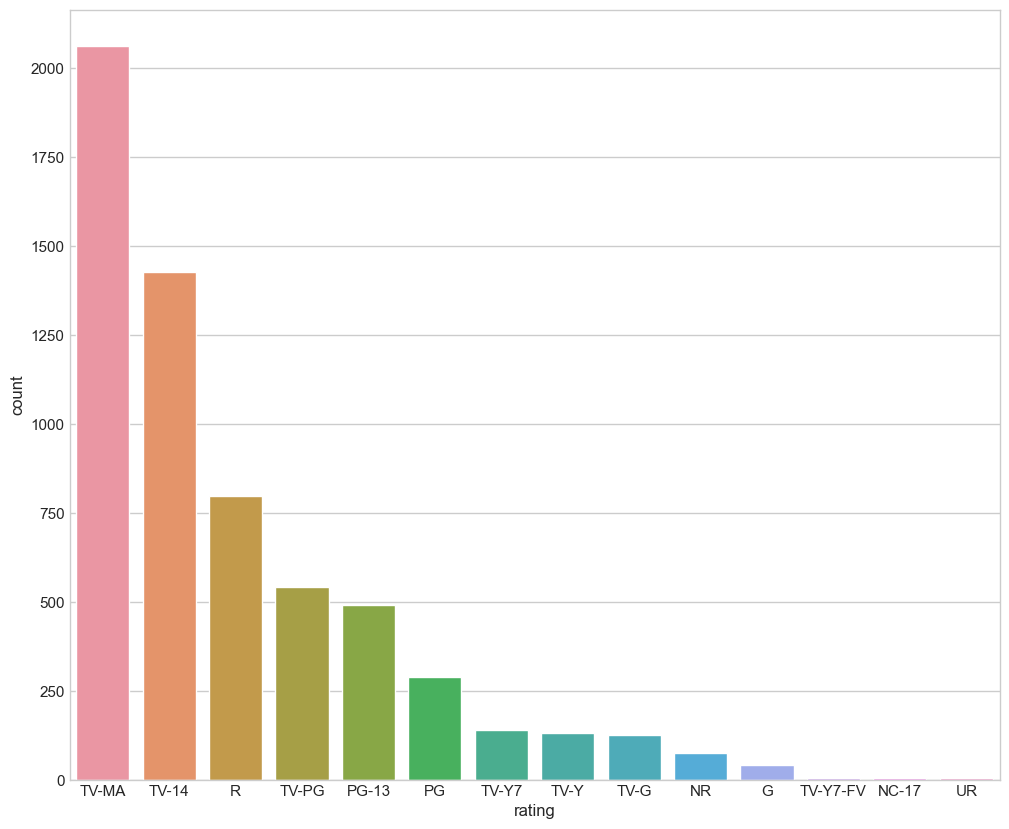

In [125]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x="rating", data=netflix_movies, order=netflix_movies['rating'].value_counts().index[0:15])

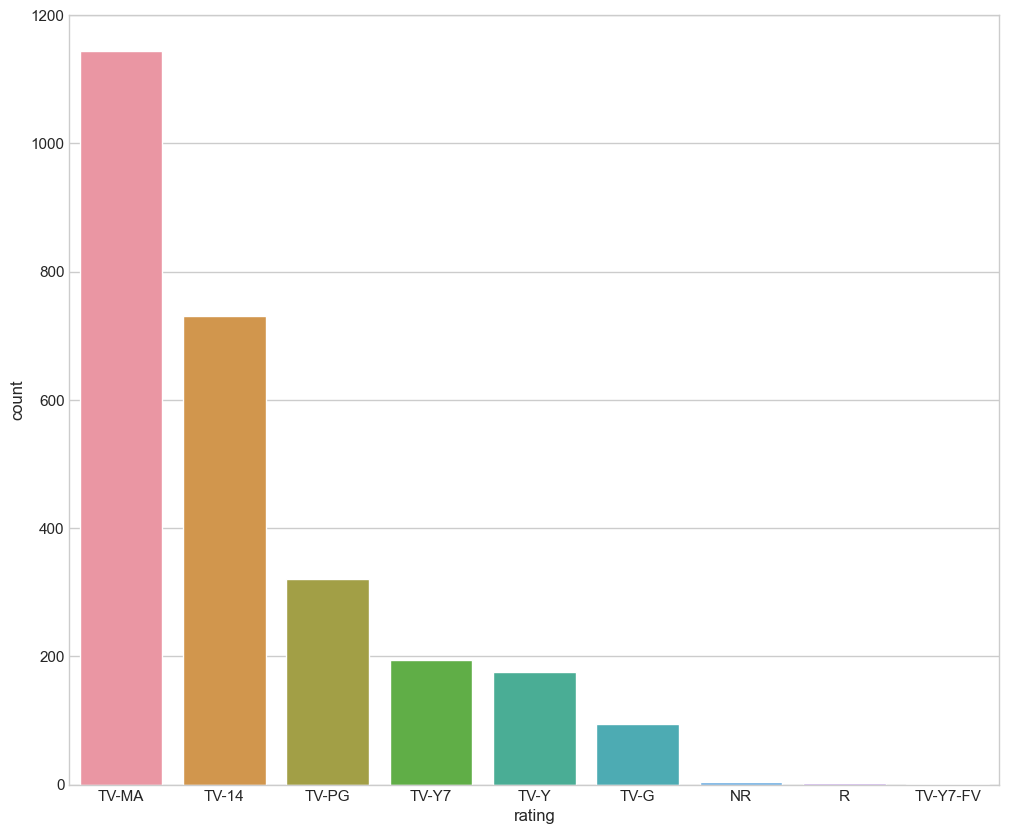

In [126]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x="rating", data=netflix_shows, order=netflix_shows['rating'].value_counts().index[0:15])

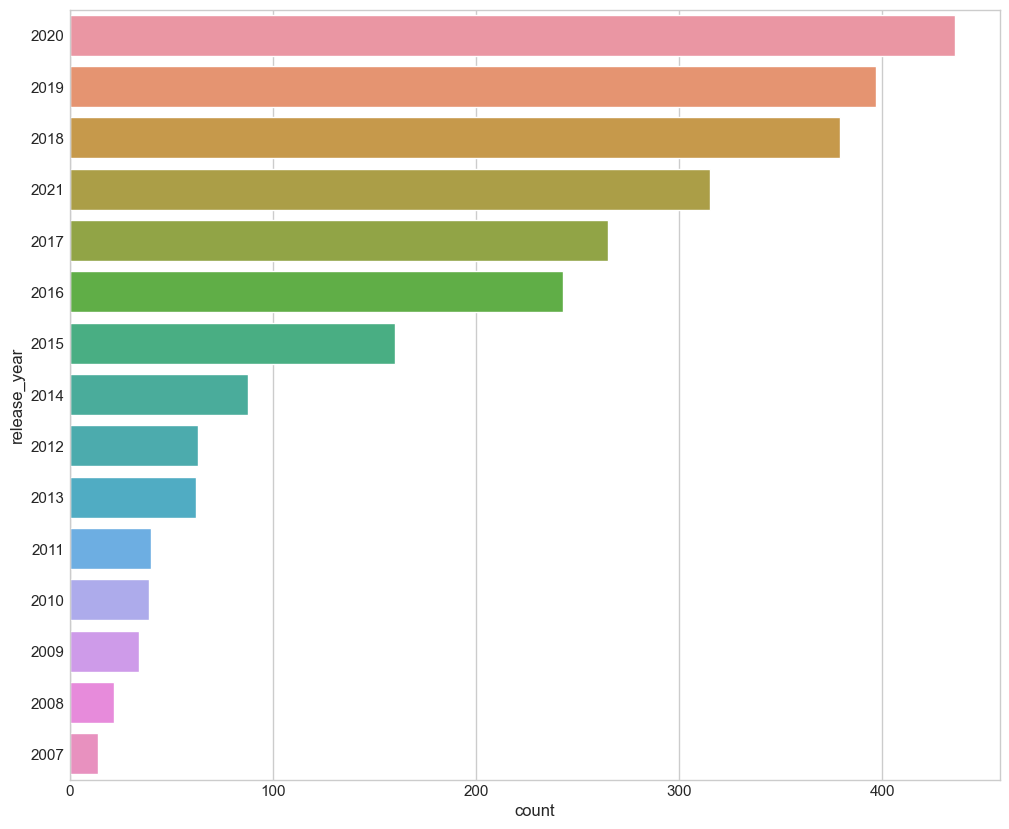

In [127]:
plt.figure(figsize=(12,10))
ax = sns.countplot(y="release_year", data=netflix_shows, order=netflix_shows['release_year'].value_counts().index[0:15])

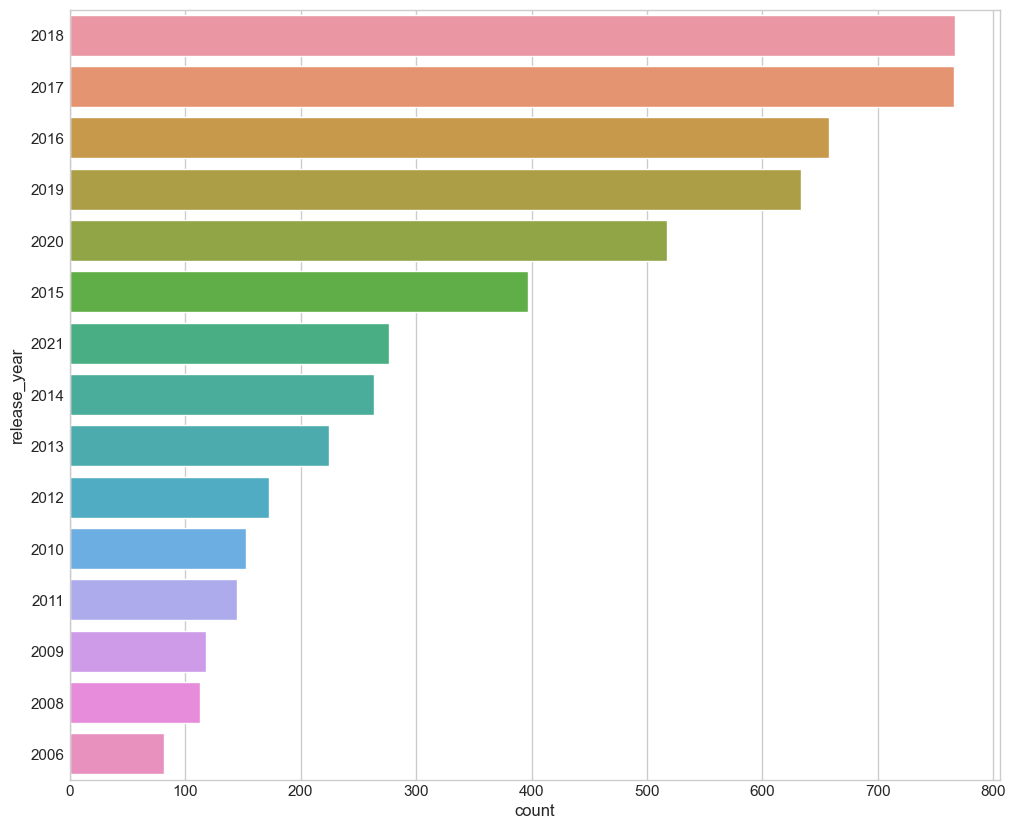

In [128]:
plt.figure(figsize=(12,10))
ax = sns.countplot(y="release_year", data= netflix_movies, order=netflix_movies['release_year'].value_counts().index[0:15])

<h2> 4. Analysis of actors/directors of different types of shows/movies.
a. Identify the top 10 directors who have appeared in most movies or TV shows.
Hint : We want you to group by each actor and find the count of unique titles of
Tv-shows/movies

b. Identify the top 10 directors who have appeared in most movies or TV shows.
Hint : We want you to group by each director and find the count of unique titles
of Tv-shows/movies

<Axes: xlabel='cast'>

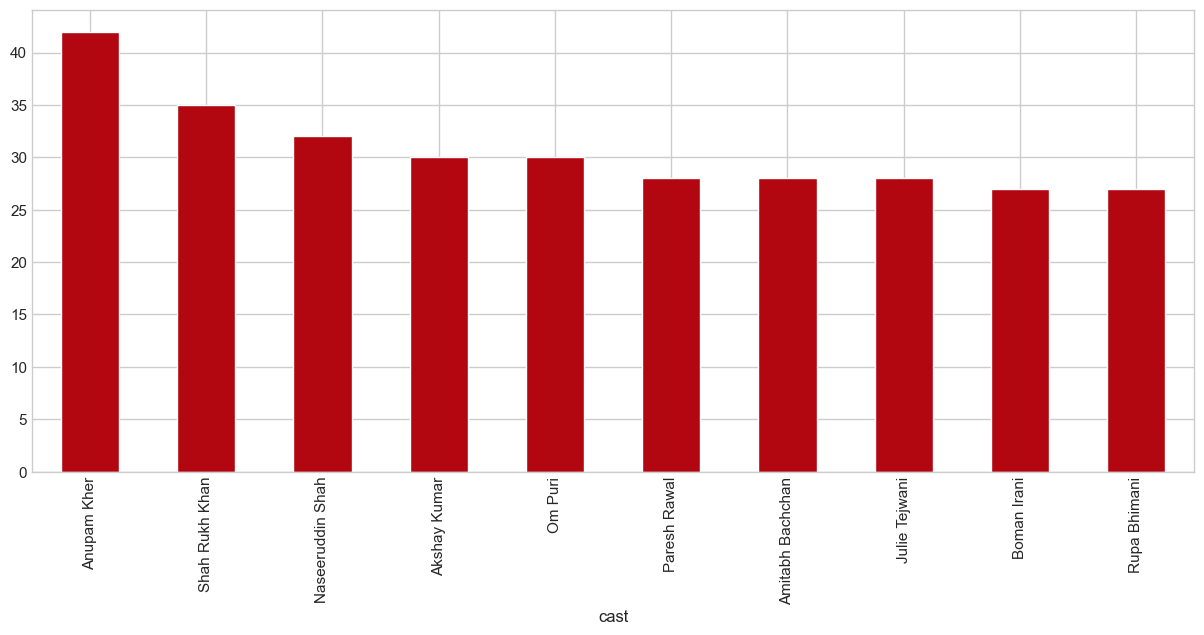

In [129]:
plt.figure(figsize=(15, 6))

netflix_movies_unpivoted[netflix_movies_unpivoted['cast']!='Unknown'].groupby(['cast'])\
['title'].nunique().sort_values(ascending=False)[:10].plot(kind='bar')

<Axes: xlabel='cast'>

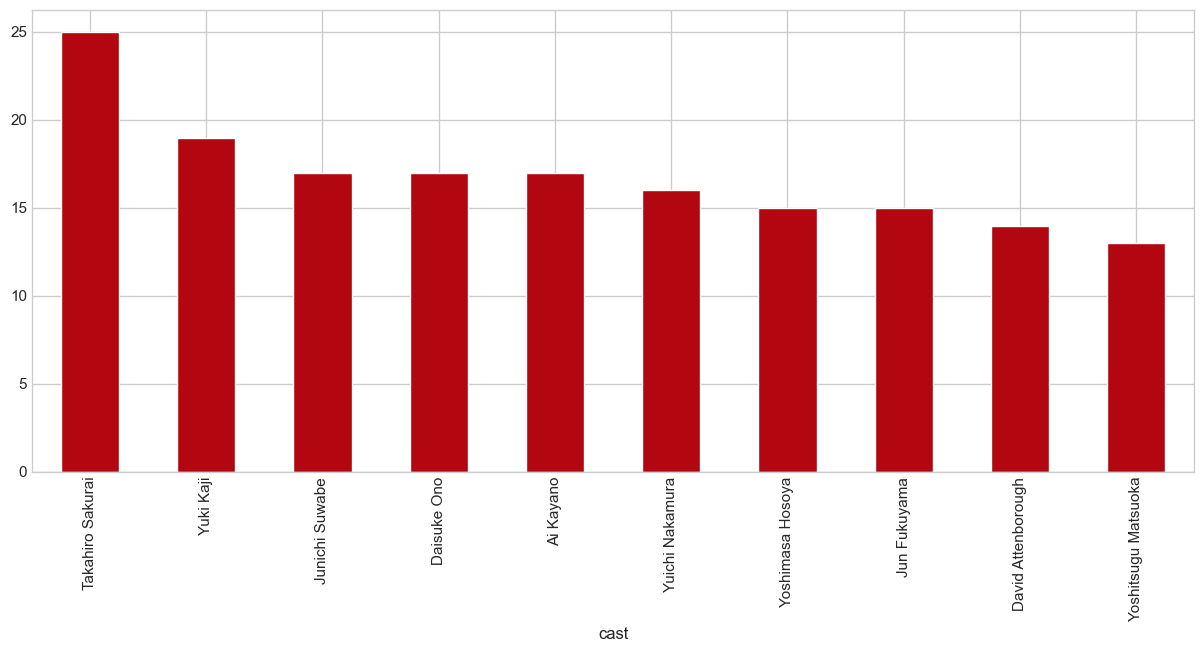

In [130]:
plt.figure(figsize=(15, 6))

netflix_shows_unpivoted[netflix_shows_unpivoted['cast']!='Unknown'].groupby(['cast'])\
['title'].nunique().sort_values(ascending=False)[:10].plot(kind='bar')

<Axes: xlabel='director'>

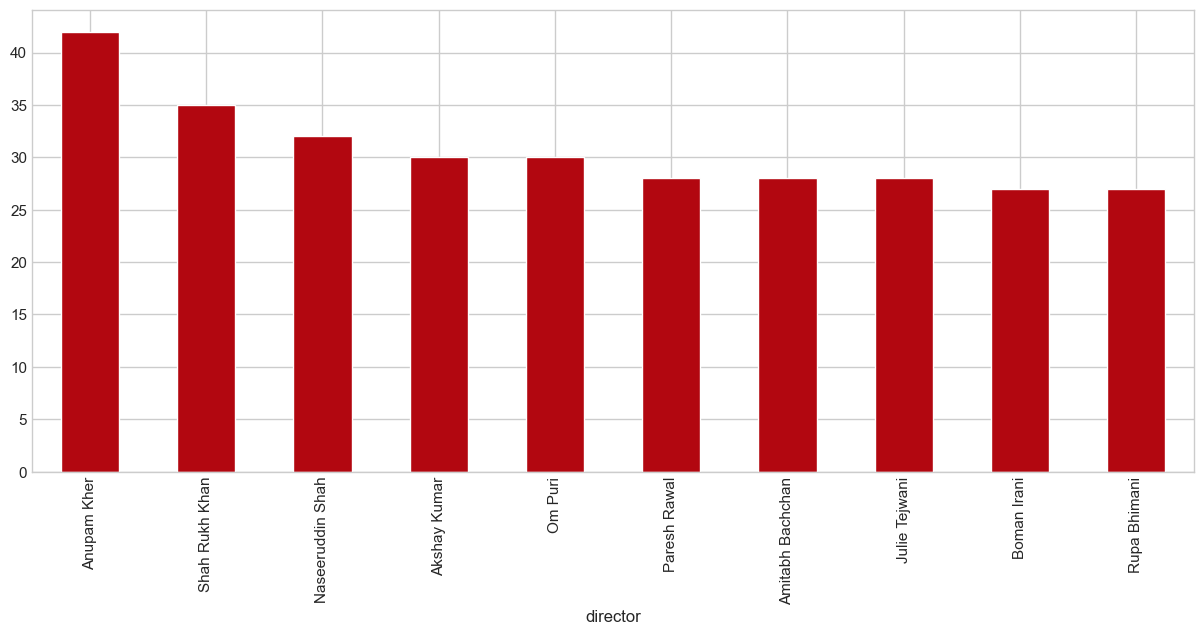

In [131]:
plt.figure(figsize=(15, 6))


netflix_movies_unpivoted[netflix_movies_unpivoted['director']!='Unknown'].groupby(['director'])\
['title'].nunique().sort_values(ascending=False)[:10].plot(kind='bar')


<Axes: xlabel='director'>

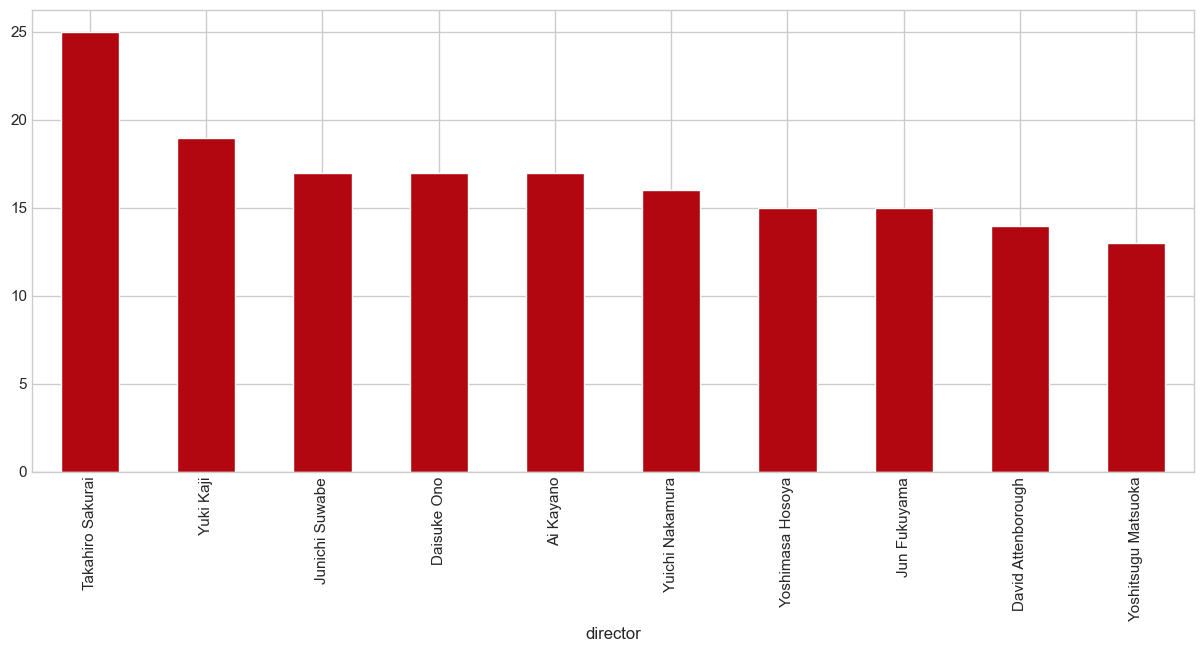

In [132]:
plt.figure(figsize=(15, 6))
netflix_shows_unpivoted[netflix_shows_unpivoted['director']!='Unknown'].groupby(['director'])\
['title'].nunique().sort_values(ascending=False)[:10].plot(kind='bar')


<Axes: xlabel='listed_in'>

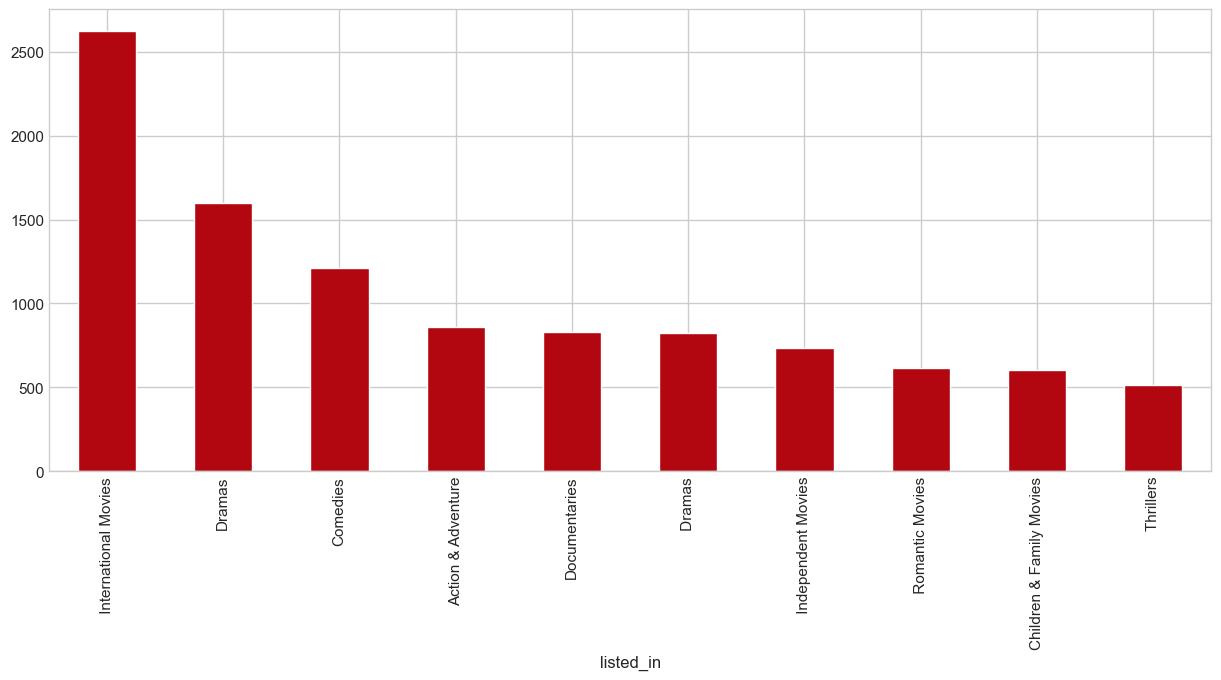

In [133]:
plt.figure(figsize=(15, 6))
netflix_movies_unpivoted[netflix_movies_unpivoted['listed_in']!='Unknown'].groupby(['listed_in'])\
['title'].nunique().sort_values(ascending=False)[:10].plot(kind='bar')

<Axes: xlabel='listed_in'>

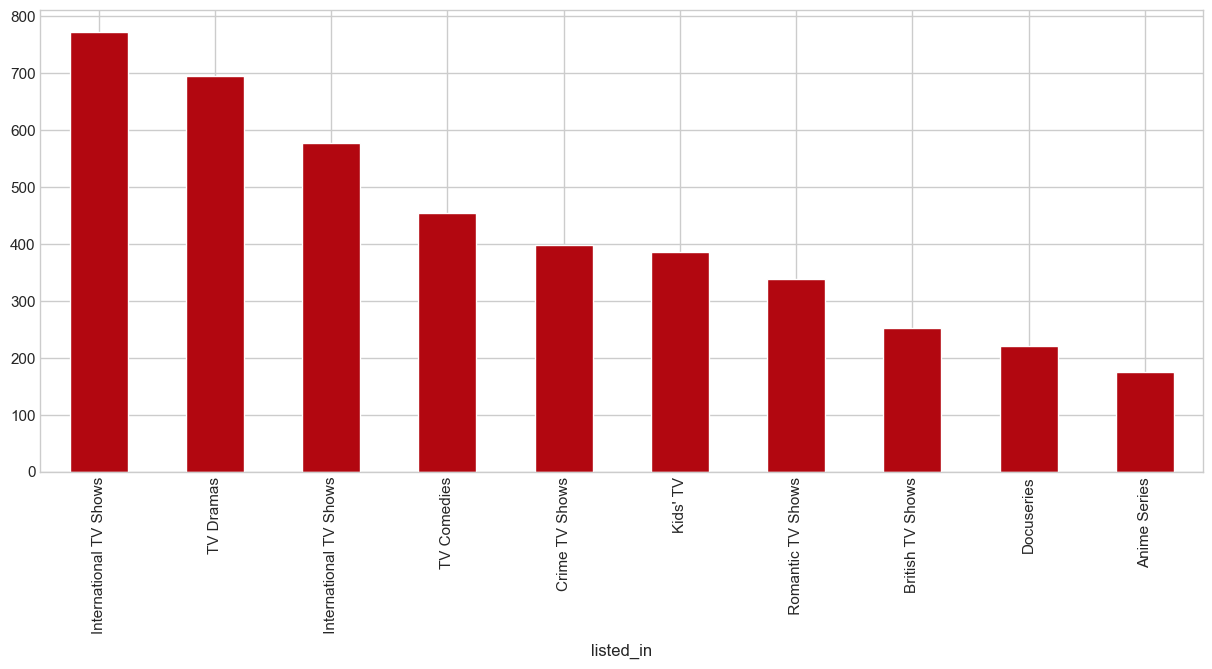

In [134]:
plt.figure(figsize=(15, 6))
netflix_shows_unpivoted[netflix_shows_unpivoted['listed_in']!='Unknown'].groupby(['listed_in'])\
['title'].nunique().sort_values(ascending=False)[:10].plot(kind='bar')

In [135]:
netflix_movies_unpivoted[netflix_movies_unpivoted['country']!='Unknown'].groupby(['country'])\
['title'].nunique().sort_values(ascending=False)[:10]

country
United States      2361
India               927
 United States      388
United Kingdom      382
Canada              187
 France             155
 United Kingdom     152
France              148
 Canada             132
Spain               129
Name: title, dtype: int64

In [136]:
netflix_movies_unpivoted[netflix_movies_unpivoted['country']!='Unknown']['country'].value_counts()[:10]

United States      47208
India              21669
 United States     20926
 France            11775
United Kingdom     11661
 United Kingdom     9494
 Canada             8460
 Germany            7091
France              5715
 Belgium            5155
Name: country, dtype: int64

<Axes: xlabel='country'>

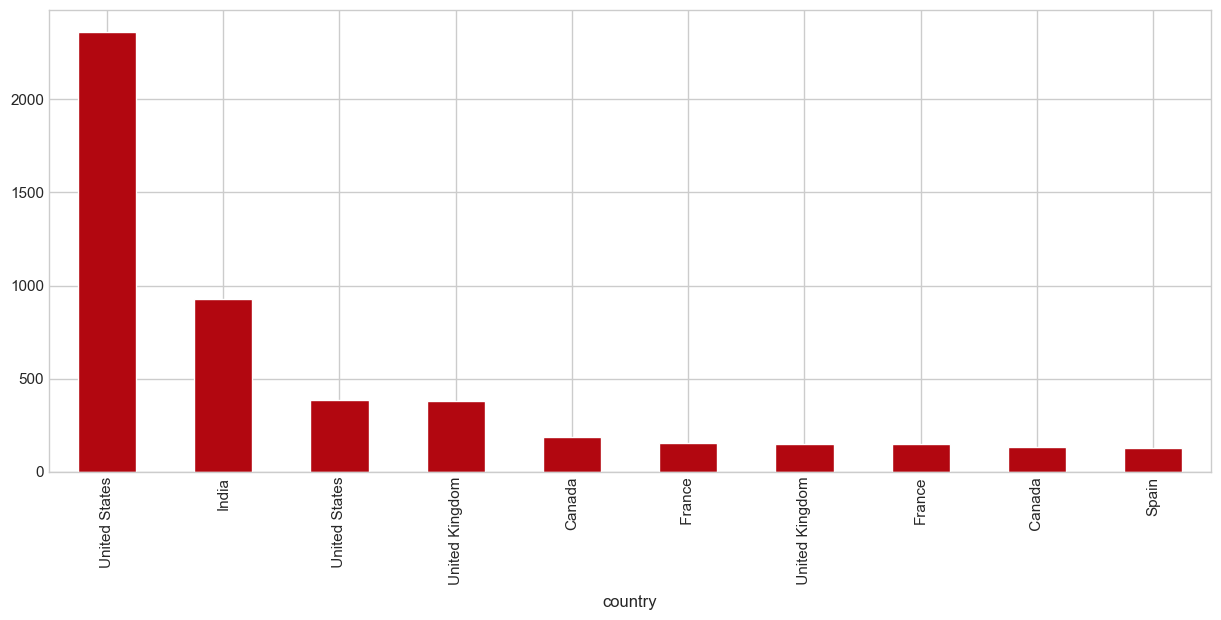

In [137]:
plt.figure(figsize=(15, 6))
netflix_movies_unpivoted[netflix_movies_unpivoted['country']!='Unknown'].groupby(['country'])\
['title'].nunique().sort_values(ascending=False)[:10].plot(kind='bar')

<Axes: xlabel='country'>

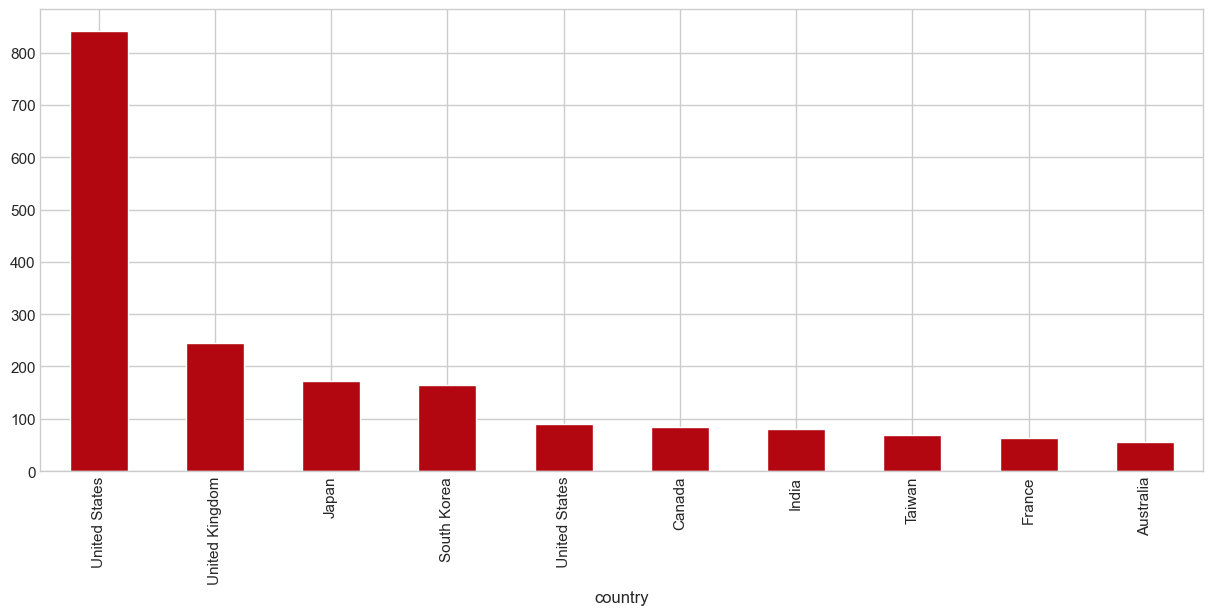

In [138]:
plt.figure(figsize=(15, 6))
netflix_shows_unpivoted[netflix_shows_unpivoted['country']!='Unknown'].groupby(['country'])\
['title'].nunique().sort_values(ascending=False)[:10].plot(kind='bar')

In [139]:
netflix_movies_unpivoted.describe()

release_year         length    month_added     year_added  \
count  251388.000000  251388.000000  251388.000000  251388.000000   
mean     2012.181568     106.803109       6.629457    2018.914017   
std         9.127246      23.326271       3.447256       1.563315   
min      1942.000000       3.000000       1.000000    2008.000000   
25%      2010.000000      93.000000       4.000000    2018.000000   
50%      2015.000000     104.000000       7.000000    2019.000000   
75%      2018.000000     119.000000      10.000000    2020.000000   
max      2021.000000     312.000000      12.000000    2021.000000   

          week_added     difference  
count  251388.000000  251388.000000  
mean       26.541295       6.732449  
std        15.064362       9.361156  
min         1.000000      -1.000000  
25%        14.000000       1.000000  
50%        27.000000       3.000000  
75%        39.000000       9.000000  
max        53.000000      75.000000

In [140]:
netflix_movies_unpivoted['length'].mean()

106.80310913806547

In [141]:
netflix_shows_unpivoted.describe()

release_year        length   month_added    year_added    week_added  \
count  75604.000000  75604.000000  75604.000000  75604.000000  75604.000000   
mean    2016.677914      1.986562      6.640389   2018.931207     27.925070   
std        5.459166      1.802007      3.484004      1.593163     15.239086   
min     1925.000000      1.000000      1.000000   2008.000000      1.000000   
25%     2016.000000      1.000000      4.000000   2018.000000     15.000000   
50%     2018.000000      1.000000      7.000000   2019.000000     27.000000   
75%     2020.000000      2.000000     10.000000   2020.000000     40.000000   
max     2021.000000     17.000000     12.000000   2021.000000     53.000000   

         difference  
count  75604.000000  
mean       2.253293  
std        4.979122  
min       -3.000000  
25%        0.000000  
50%        0.000000  
75%        2.000000  
max       93.000000

In [142]:
netflix_shows_unpivoted['length'].mean()

1.9865615575895454

In [143]:
netflix_movies_unpivoted['length'].max()

312

In [144]:
netflix_shows_unpivoted['length'].max()

17

In [145]:
netflix_movies_unpivoted['length'].min()

3

In [146]:
netflix_shows_unpivoted['length'].min()

1

In [147]:
netflix_movies_unpivoted['length'].median()

104.0

In [148]:
netflix_shows_unpivoted['length'].median()

1.0

In [149]:
netflix_shows_unpivoted.describe()

release_year        length   month_added    year_added    week_added  \
count  75604.000000  75604.000000  75604.000000  75604.000000  75604.000000   
mean    2016.677914      1.986562      6.640389   2018.931207     27.925070   
std        5.459166      1.802007      3.484004      1.593163     15.239086   
min     1925.000000      1.000000      1.000000   2008.000000      1.000000   
25%     2016.000000      1.000000      4.000000   2018.000000     15.000000   
50%     2018.000000      1.000000      7.000000   2019.000000     27.000000   
75%     2020.000000      2.000000     10.000000   2020.000000     40.000000   
max     2021.000000     17.000000     12.000000   2021.000000     53.000000   

         difference  
count  75604.000000  
mean       2.253293  
std        4.979122  
min       -3.000000  
25%        0.000000  
50%        0.000000  
75%        2.000000  
max       93.000000

In [150]:
netflix_shows_unpivoted.groupby(['director'])['length'].mean()

director
'Najite Dede                1.0
2 Chainz                    1.0
A Boogie Wit tha Hoodie     1.0
A.D. Miles                  1.0
A.J. Cook                  12.0
                           ... 
İştar Gökseven              3.0
Şafak Başkaya               1.0
Şehsuvar Aktaş              1.0
Şenay Gürler                1.0
Şükrü Özyıldız              1.0
Name: length, Length: 14815, dtype: float64

In [151]:
netflix_movies_unpivoted.groupby(['director'])['length'].mean()

director
"Riley" Lakdhar Dridi     93.000000
'Najite Dede             112.000000
2Mex                      98.000000
4Minute                  107.000000
50 Cent                  100.300000
                            ...    
Şevket Çoruh             127.000000
Şinasi Yurtsever         100.777778
Şükran Ovalı             109.000000
Şükrü Özyıldız           109.000000
Ṣọpẹ́ Dìrísù              93.000000
Name: length, Length: 25952, dtype: float64

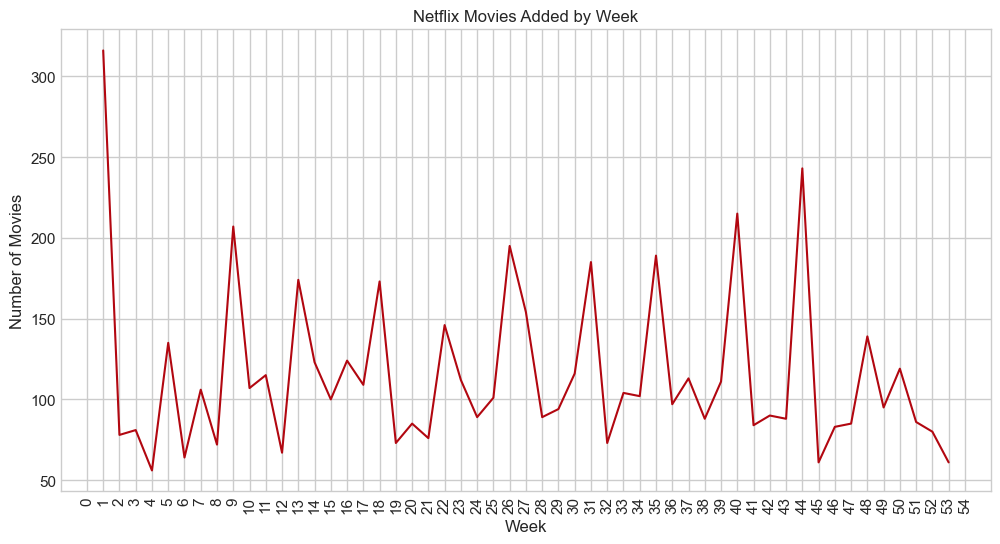

In [152]:
plt.figure(figsize=(12, 6))
netflix_movies.groupby(['week_added'])['title'].nunique().plot()
plt.xticks(range(55),rotation = 90)
plt.xlabel('Week')
plt.ylabel('Number of Movies')
plt.title('Netflix Movies Added by Week')
plt.show()

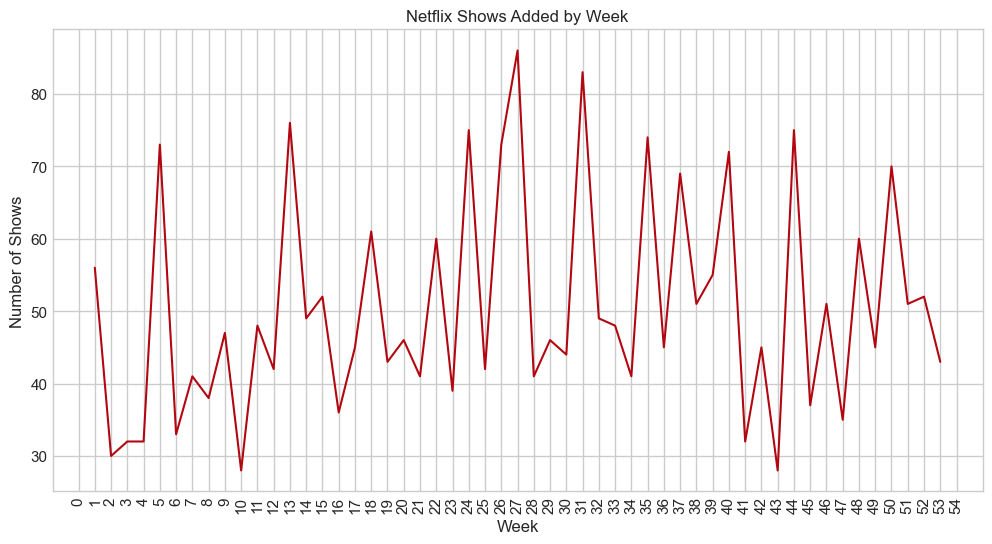

In [153]:
plt.figure(figsize=(12, 6))
netflix_shows.groupby(['week_added'])['title'].nunique().plot()
plt.xticks(range(55),rotation = 90)
plt.xlabel('Week')
plt.ylabel('Number of Shows')
plt.title('Netflix Shows Added by Week')
plt.show()

In [154]:
netflix_movies.describe()

release_year       length  month_added   year_added   week_added  \
count   6128.000000  6128.000000  6128.000000  6128.000000  6128.000000   
mean    2013.121084    99.577187     6.607866  2018.850522    26.216873   
std        9.680300    28.290593     3.453028     1.561276    15.118415   
min     1942.000000     3.000000     1.000000  2008.000000     1.000000   
25%     2012.000000    87.000000     4.000000  2018.000000    13.000000   
50%     2016.000000    98.000000     7.000000  2019.000000    26.000000   
75%     2018.000000   114.000000    10.000000  2020.000000    39.000000   
max     2021.000000   312.000000    12.000000  2021.000000    53.000000   

        difference  
count  6128.000000  
mean      5.729439  
std       9.744554  
min      -1.000000  
25%       0.000000  
50%       2.000000  
75%       7.000000  
max      75.000000

In [155]:
netflix_movies[netflix_movies['difference']<0]

show_id   type                       title               director  \
5394   s5395  Movie  Hans Teeuwen: Real Rancour  Doesjka van Hoogdalem   
7063   s7064  Movie                    Incoming          Eric Zaragosa   

                                                   cast  \
5394                                       Hans Teeuwen   
7063  Scott Adkins, Aaron McCusker, Vahldin Prelic, ...   

                    country date_added  release_year rating duration  \
5394            Netherlands 2017-07-01          2018  TV-MA   86 min   
7063  Serbia, United States 2018-10-26          2019  TV-MA   89 min   

                                 listed_in  \
5394                       Stand-Up Comedy   
7063  Action & Adventure, Sci-Fi & Fantasy   

                                            description  length min_or_season  \
5394  Comedian Hans Teeuwen rebels against political...      86           min   
7063  When an imprisoned terrorist cell hijacks a hi...      89           min   

      month_added month_name_added  year_added  week_added  difference  
5394            7             July        2017          26          -1  
7063           10          October        2018          43          -1

In [156]:
netflix_shows.describe()

release_year       length  month_added   year_added   week_added  \
count   2666.000000  2666.000000  2666.000000  2666.000000  2666.000000   
mean    2016.625656     1.751313     6.762941  2018.923856    27.826332   
std        5.733559     1.550176     3.397725     1.601306    14.796868   
min     1925.000000     1.000000     1.000000  2008.000000     1.000000   
25%     2016.000000     1.000000     4.000000  2018.000000    15.000000   
50%     2018.000000     1.000000     7.000000  2019.000000    28.000000   
75%     2020.000000     2.000000    10.000000  2020.000000    40.000000   
max     2021.000000    17.000000    12.000000  2021.000000    53.000000   

        difference  
count  2666.000000  
mean      2.298200  
std       5.320636  
min      -3.000000  
25%       0.000000  
50%       0.000000  
75%       2.000000  
max      93.000000

In [157]:
netflix_shows[netflix_shows['difference']<0]

show_id     type                      title     director  \
1551   s1552  TV Show                      Hilda      Unknown   
1696   s1697  TV Show               Polly Pocket      Unknown   
2920   s2921  TV Show              Love Is Blind      Unknown   
3168   s3169  TV Show               Fuller House      Unknown   
3287   s3288  TV Show         Maradona in Mexico      Unknown   
3369   s3370  TV Show            BoJack Horseman      Unknown   
3433   s3434  TV Show           The Hook Up Plan      Unknown   
4844   s4845  TV Show  Unbreakable Kimmy Schmidt      Unknown   
4845   s4846  TV Show       Arrested Development      Unknown   
5658   s5659  TV Show                     Sense8      Unknown   
5677   s5678  TV Show                Tokyo Trial      Unknown   
7112   s7113  TV Show                Jack Taylor  Stuart Orme   

                                                   cast  \
1551  Bella Ramsey, Ameerah Falzon-Ojo, Oliver Nelso...   
1696  Emily Tennant, Shannon Chan-Kent, Kazumi Evans...   
2920                        Nick Lachey, Vanessa Lachey   
3168  Candace Cameron Bure, Jodie Sweetin, Andrea Ba...   
3287                             Diego Armando Maradona   
3369  Will Arnett, Aaron Paul, Amy Sedaris, Alison B...   
3433  Marc Ruchmann, Zita Hanrot, Sabrina Ouazani, J...   
4844  Ellie Kemper, Jane Krakowski, Tituss Burgess, ...   
4845  Jason Bateman, Portia de Rossi, Will Arnett, M...   
5658  Tuppence Middleton, Brian J. Smith, Doona Bae,...   
5677  Marcel Hensema, Paul Freeman, Irrfan Khan, Sta...   
7112  Iain Glen, Killian Scott, Nora-Jane Noone, Tar...   

                                    country date_added  release_year rating  \
1551  United Kingdom, Canada, United States 2020-12-14          2021  TV-Y7   
1696         Canada, United States, Ireland 2020-11-15          2021   TV-Y   
2920                          United States 2020-02-13          2021  TV-MA   
3168                          United States 2019-12-06          2020  TV-PG   
3287       Argentina, United States, Mexico 2019-11-13          2020  TV-MA   
3369                          United States 2019-10-25          2020  TV-MA   
3433                                 France 2019-10-11          2020  TV-MA   
4844                          United States 2018-05-30          2019  TV-14   
4845                          United States 2018-05-29          2019  TV-MA   
5658                          United States 2016-12-23          2018  TV-MA   
5677             Canada, Japan, Netherlands 2016-12-13          2017  TV-MA   
7112                 United States, Ireland 2013-03-31          2016  TV-MA   

       duration                                          listed_in  \
1551  2 Seasons                                           Kids' TV   
1696  2 Seasons                                           Kids' TV   
2920   1 Season                      Reality TV, Romantic TV Shows   
3168  5 Seasons                                        TV Comedies   
3287   1 Season              Docuseries, Spanish-Language TV Shows   
3369  6 Seasons                                        TV Comedies   
3433  2 Seasons  International TV Shows, Romantic TV Shows, TV ...   
4844  4 Seasons                                        TV Comedies   
4845  5 Seasons                                        TV Comedies   
5658  2 Seasons            Crime TV Shows, TV Dramas, TV Mysteries   
5677   1 Season                  International TV Shows, TV Dramas   
7112   1 Season  Crime TV Shows, International TV Shows, TV Dramas   

                                            description  length min_or_season  \
1551  Fearless, free-spirited Hilda finds new friend...       2       Seasons   
1696  After uncovering a magical locket that allows ...       2       Seasons   
2920  Nick and Vanessa Lachey host this social exper...       1        Season   
3168  The Tanner family’s adventures continue as DJ ...       5       Seasons   
3287  In this docuseries, soccer great Diego Ma

<h2>6. Find After how many days the movie will be added to Netflix after the release of
the movie (you can consider the recent past data)

Hint : We want you to get the difference between the columns having date added
information and release year information and get the mode of difference. This
will give an insight into what will be the better time to add in Netflix

<Axes: >

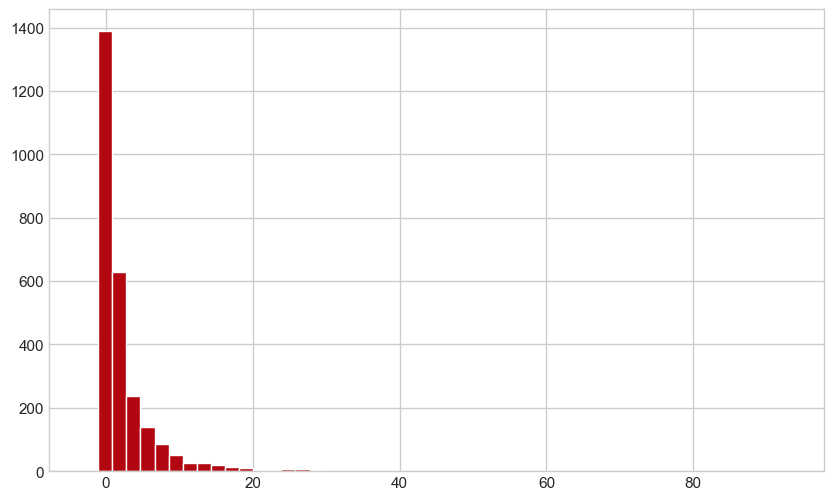

In [158]:
plt.figure(figsize=(10, 6))
netflix_shows['difference'].hist(bins=50)

<Axes: >

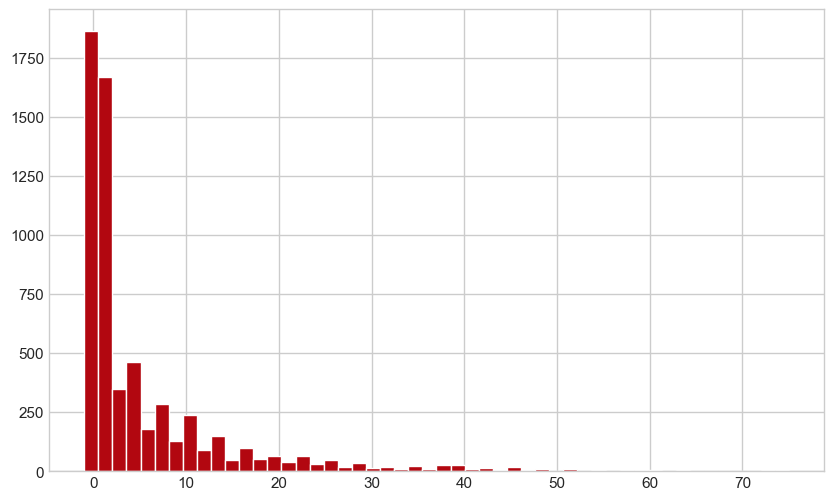

In [159]:
plt.figure(figsize=(10, 6))
netflix_movies['difference'].hist(bins=50)

In [160]:
netflix_movies['difference'].value_counts()[:10]

0    1861
1    1177
2     491
3     347
4     273
5     191
6     180
8     147
7     139
9     128
Name: difference, dtype: int64

In [161]:
netflix_shows['difference'].value_counts()[:10]

0    1379
1     407
2     223
3     144
4      94
5      70
6      70
7      48
8      38
9      33
Name: difference, dtype: int64